In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, get_window
import soundfile as sf

In [13]:
files = ['erozija_01', 'erozija_02', 'A1', 'A2', 'I1', 'I2', 'O1', 'O2', 'zvizg_1', 'zvizg_2']
window_size_ms_list = [10, 20, 50, 100]
overlap_percentage_list = [0, 50, 75]

In [11]:
def sdft(signal: np.array, fs: int, window_size_ms: int, overlap_percentage: float, use_hamming: bool = False):
    wi = int(np.round((window_size_ms / 1000) * fs))
    ov = int(np.round(wi * (overlap_percentage / 100)))
    padded_signal = np.pad(signal, (0, wi), mode='constant')
    jump_size = wi - ov

    N = len(padded_signal)
    freq = np.linspace(0, fs, wi)

    num_windows = (N - wi) // jump_size
    t = np.arange(num_windows) * jump_size / fs
    specgram = np.zeros((len(freq), num_windows), dtype=complex)
    window = get_window('hamming', wi) if use_hamming else np.ones(wi)

    for i in range(num_windows):
        start = i * jump_size
        segment = padded_signal[start:start+wi] * window
        specgram[:, i] = np.fft.fft(segment)[:len(freq)]
    return freq, t, specgram


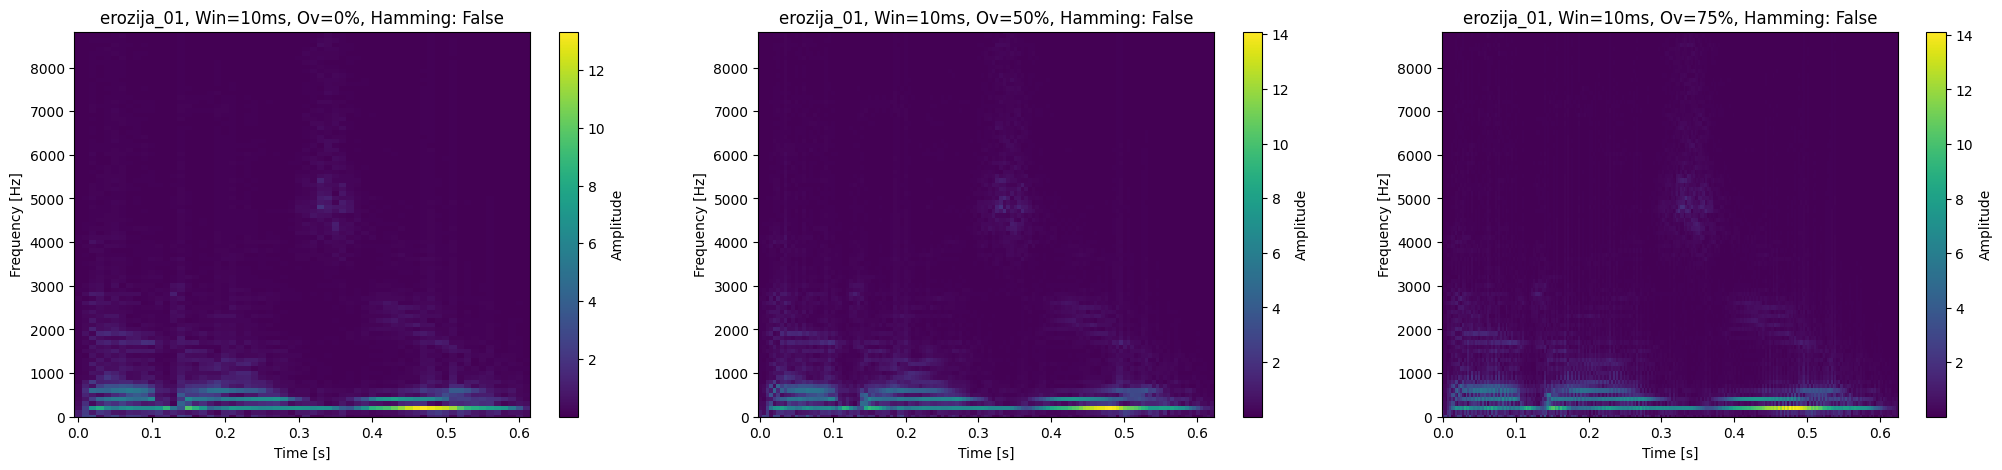

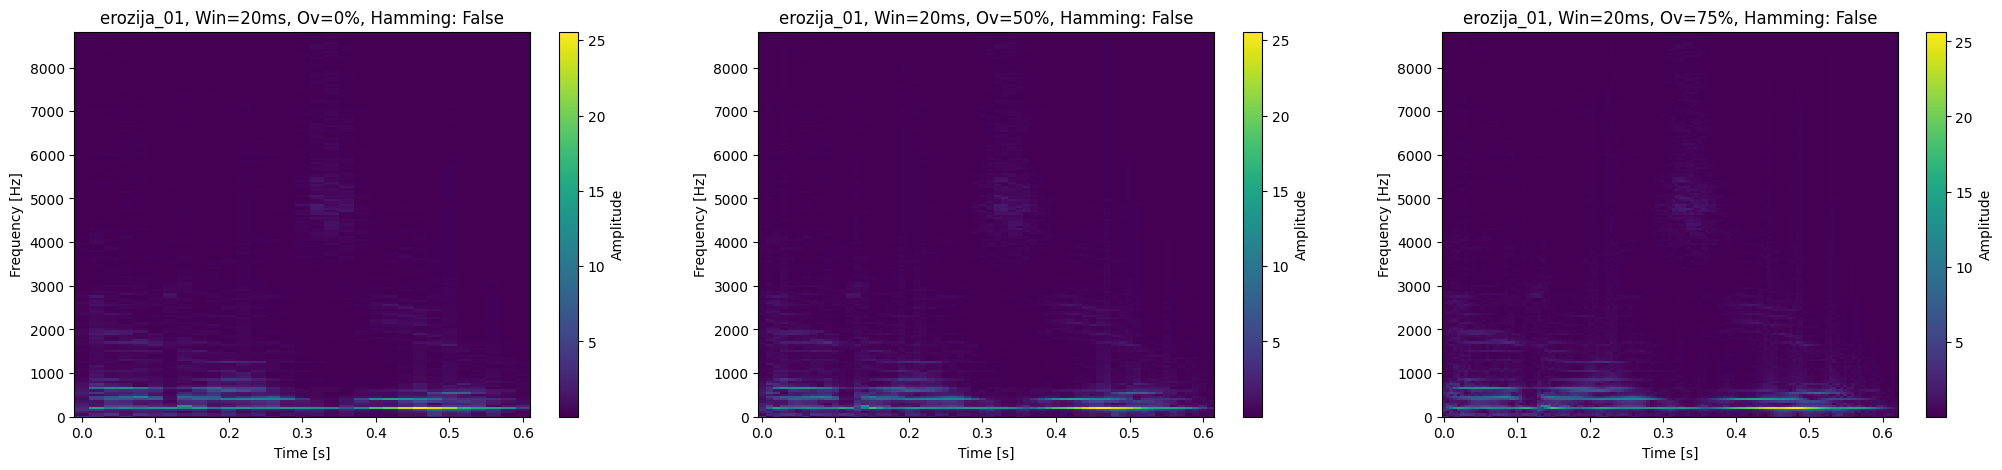

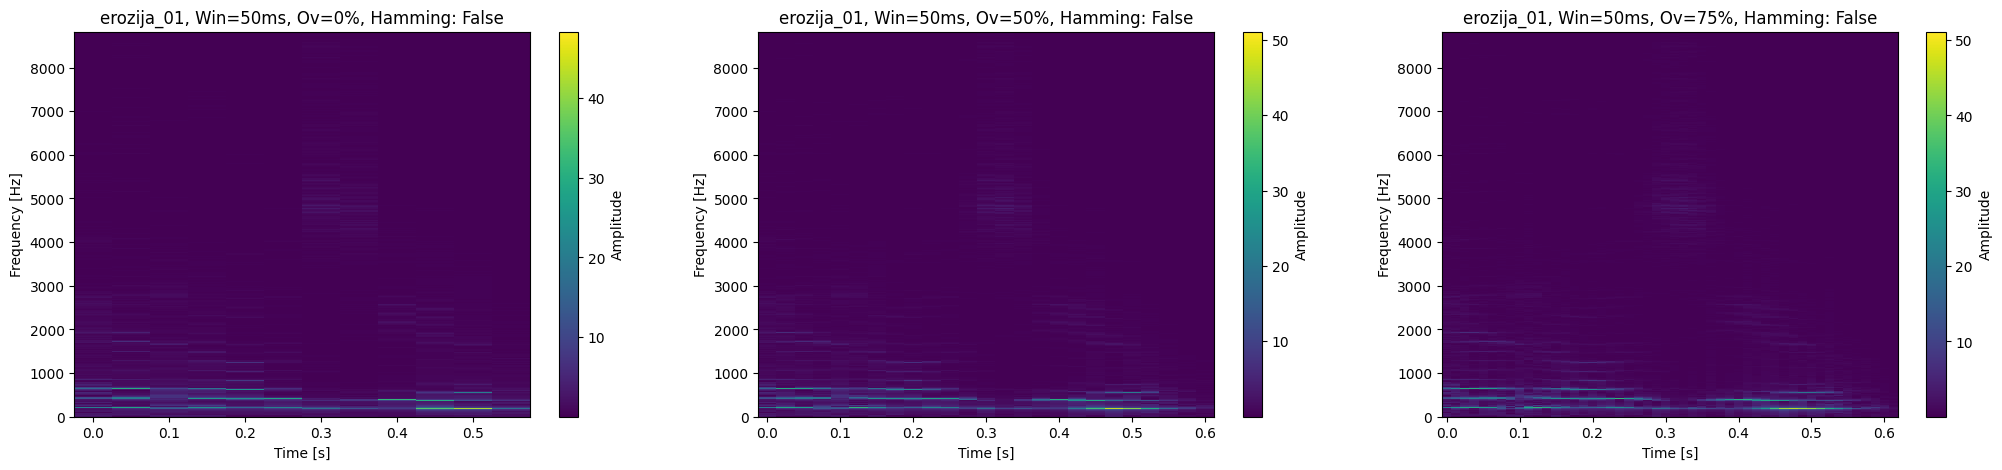

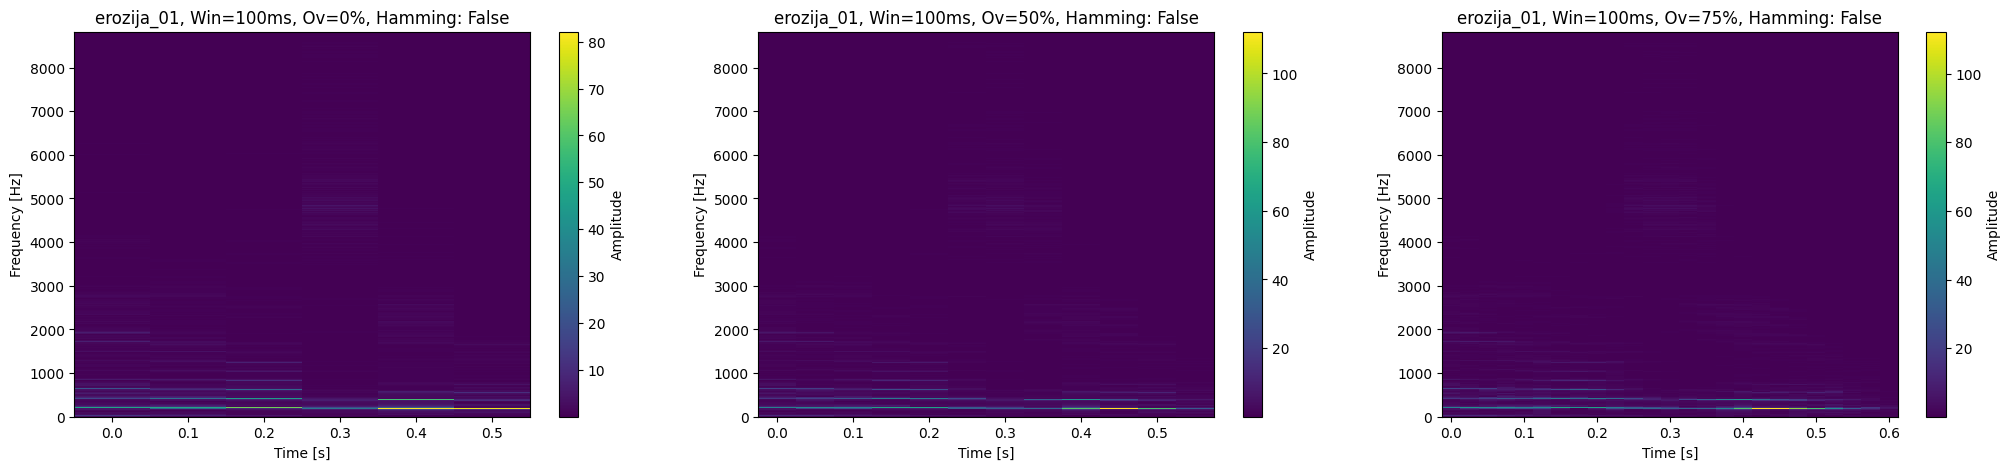

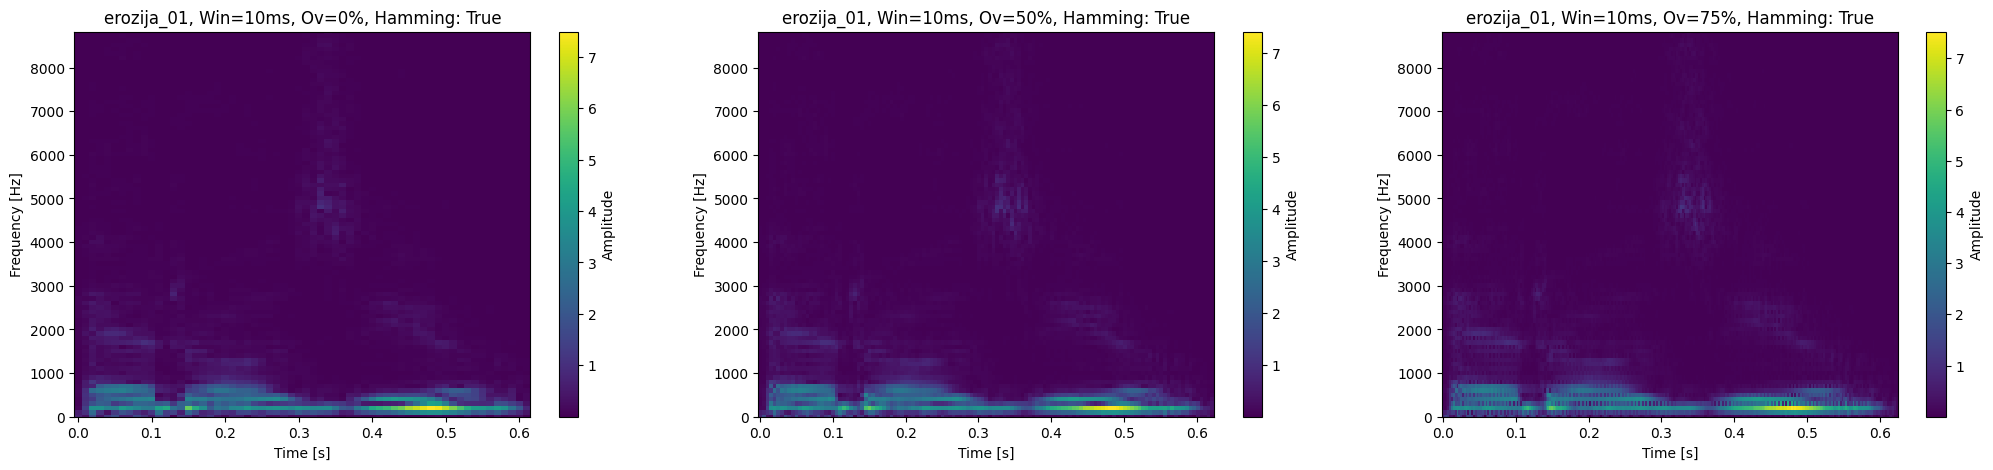

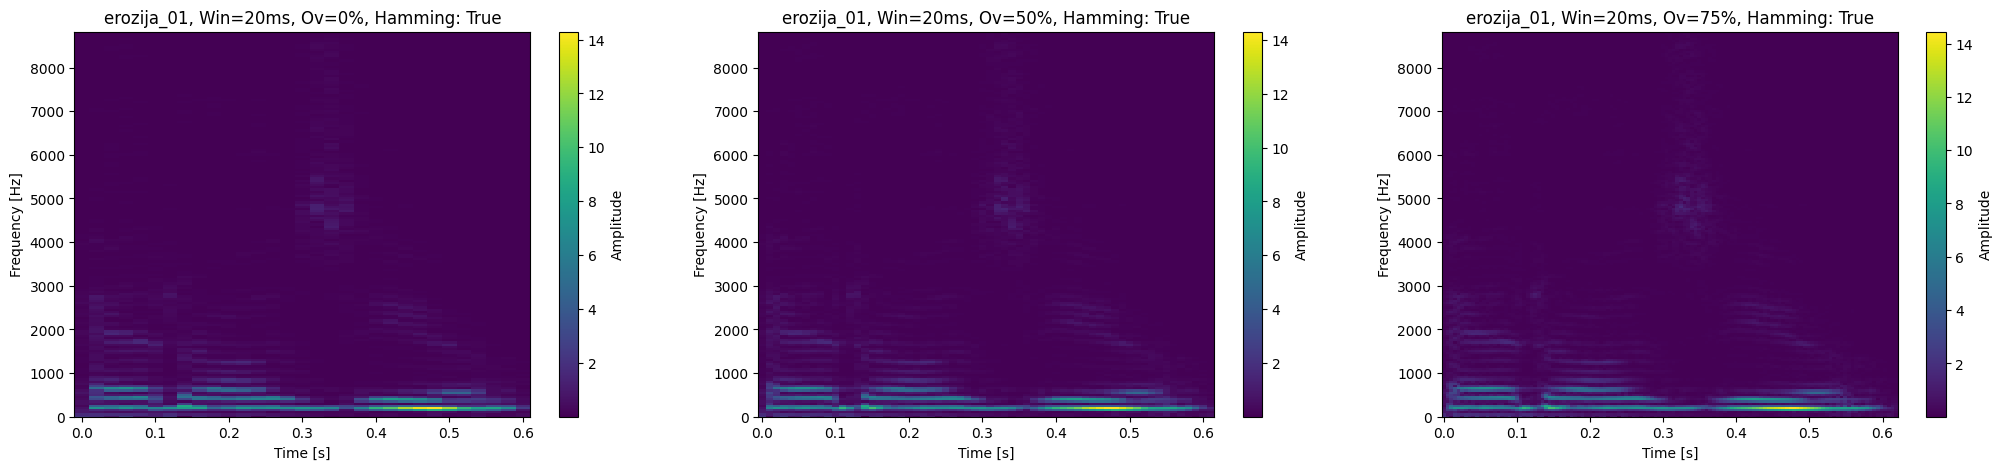

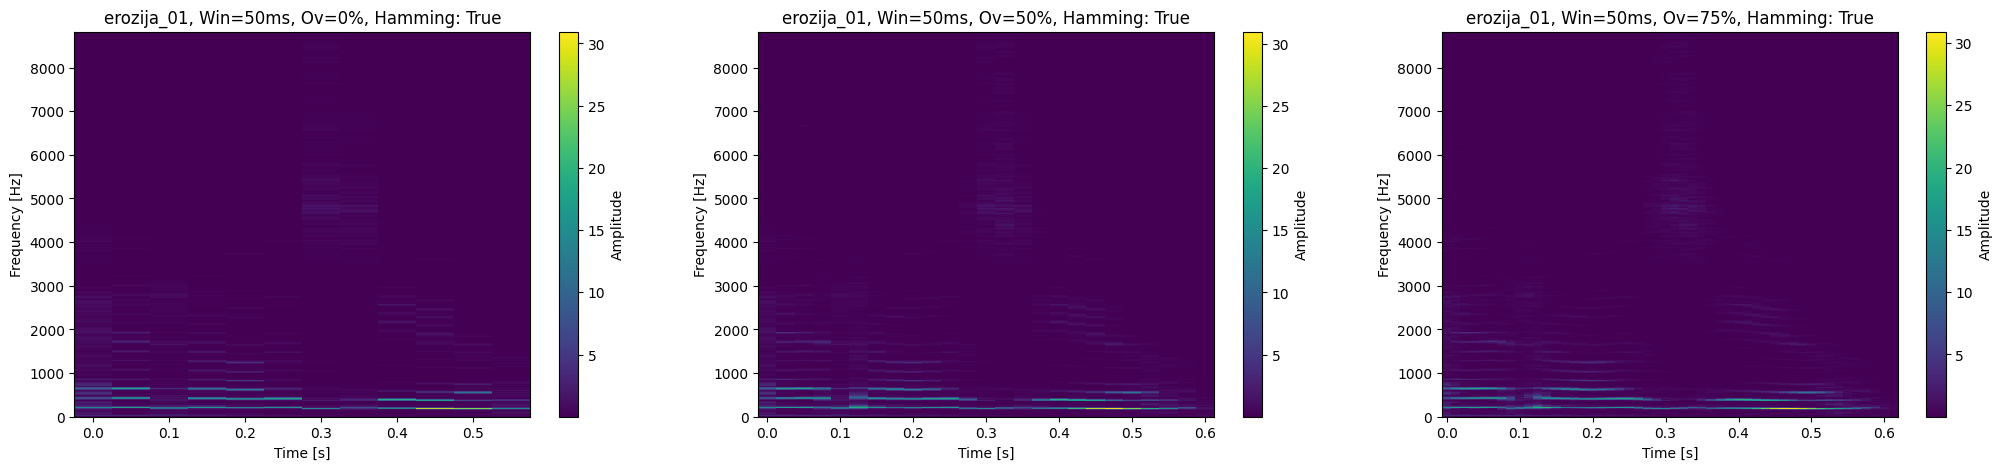

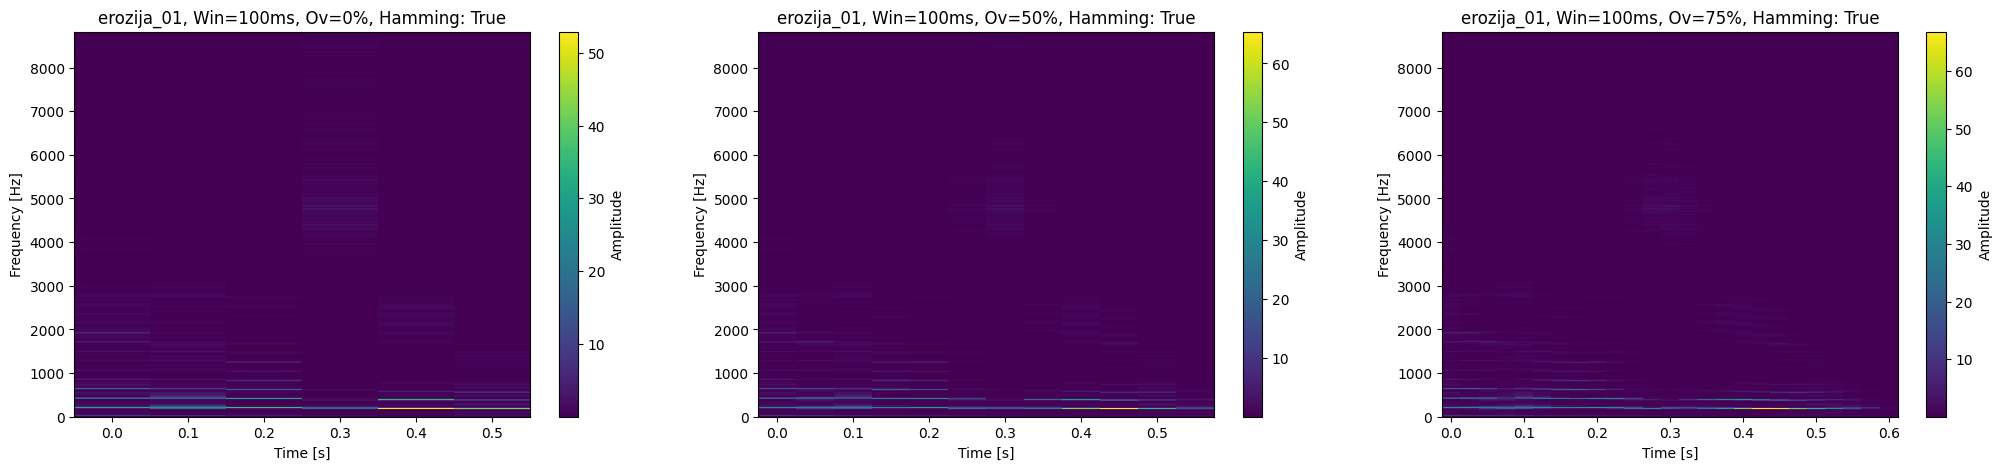

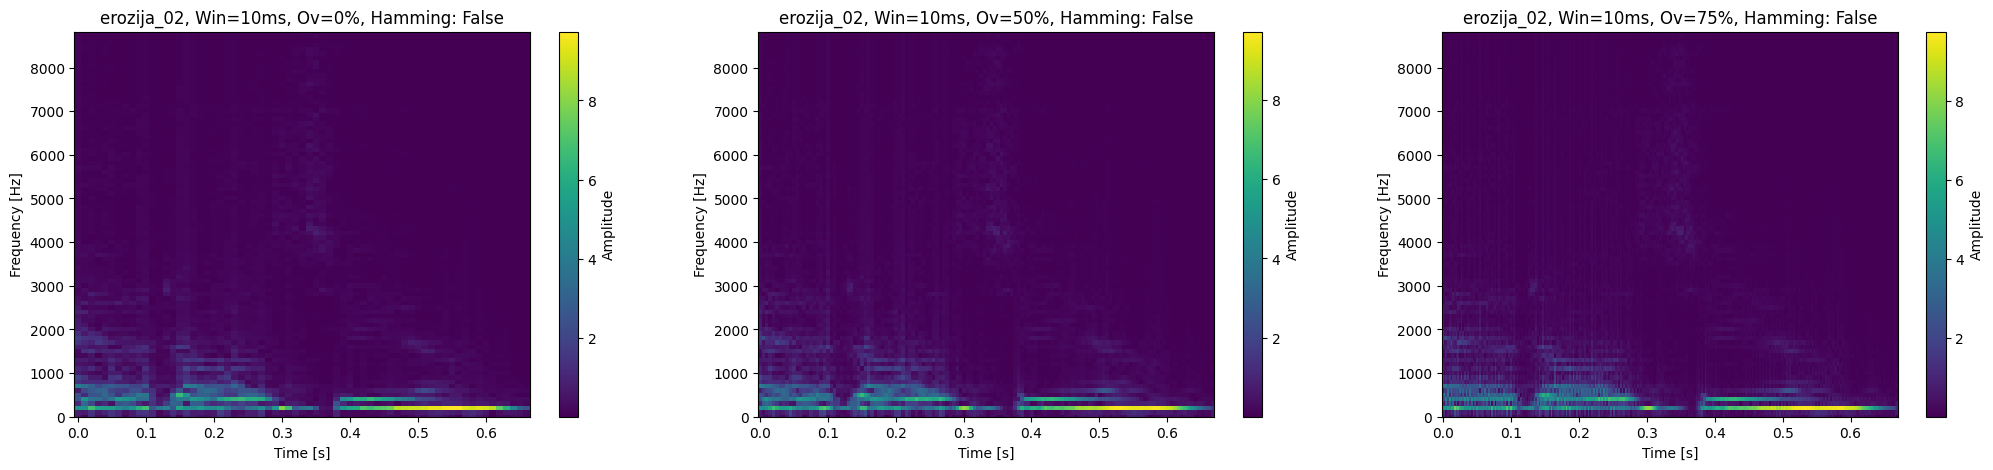

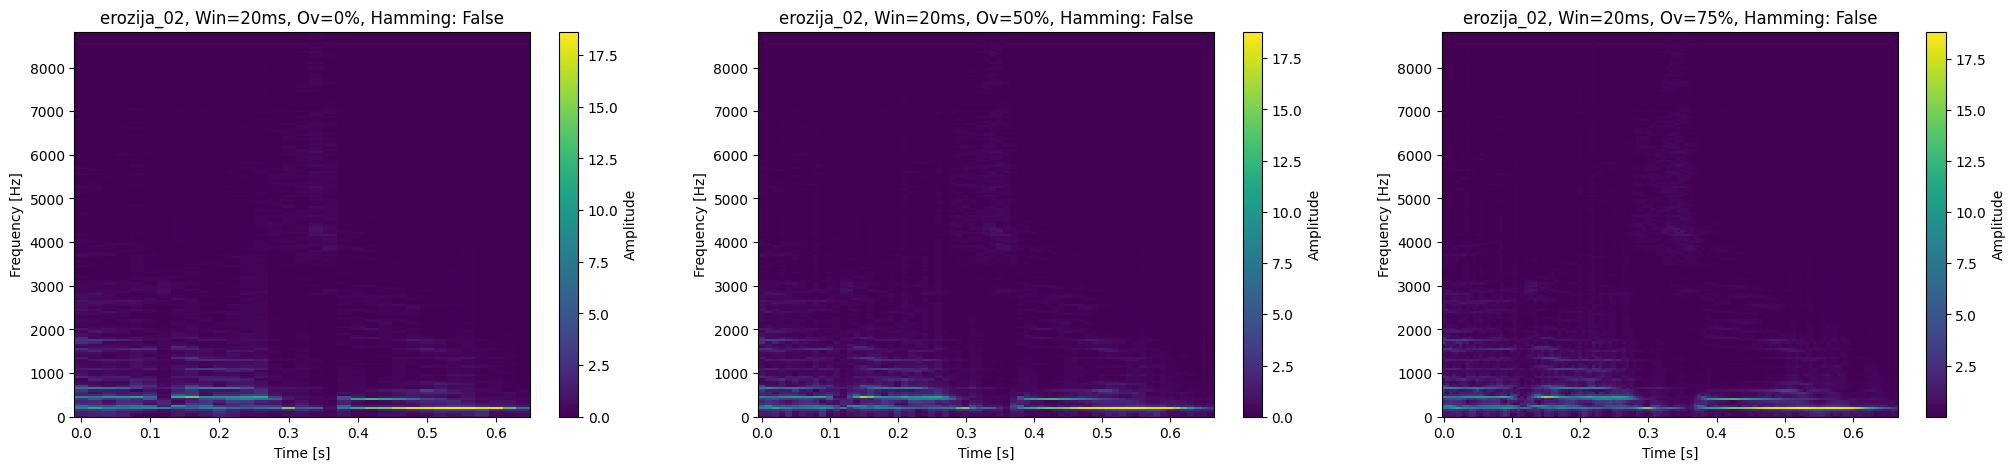

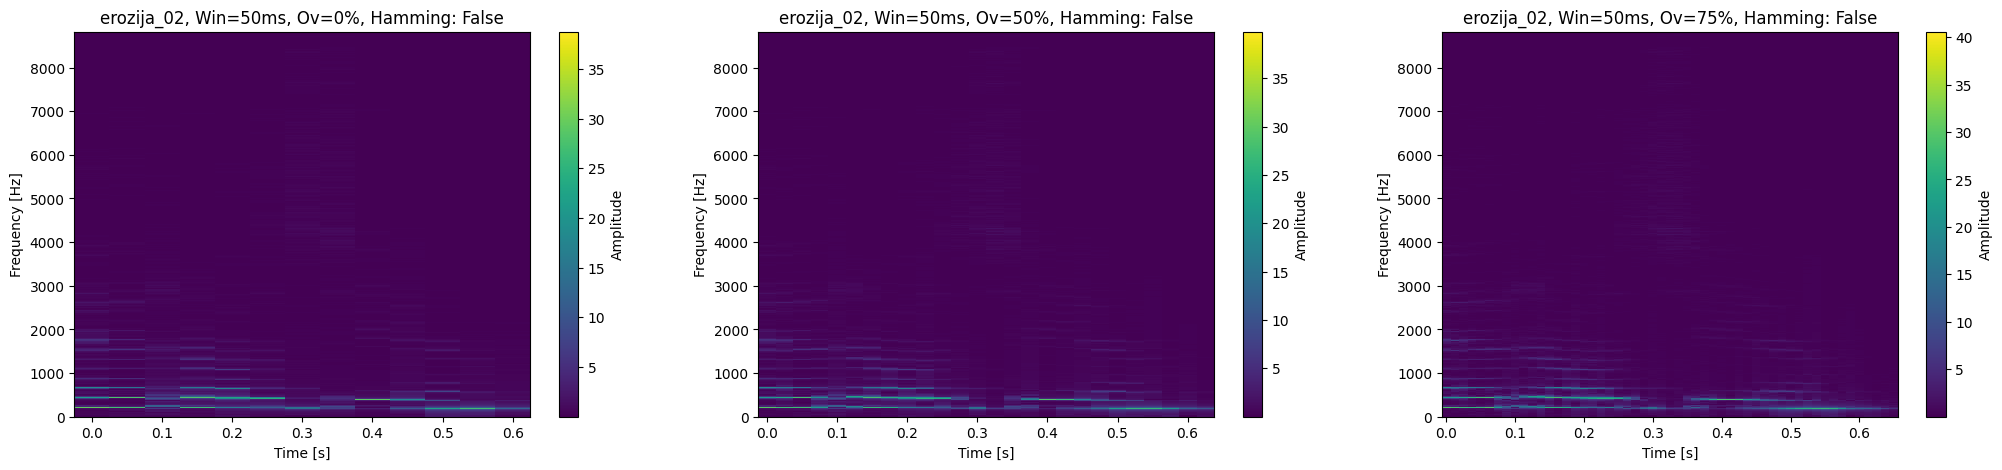

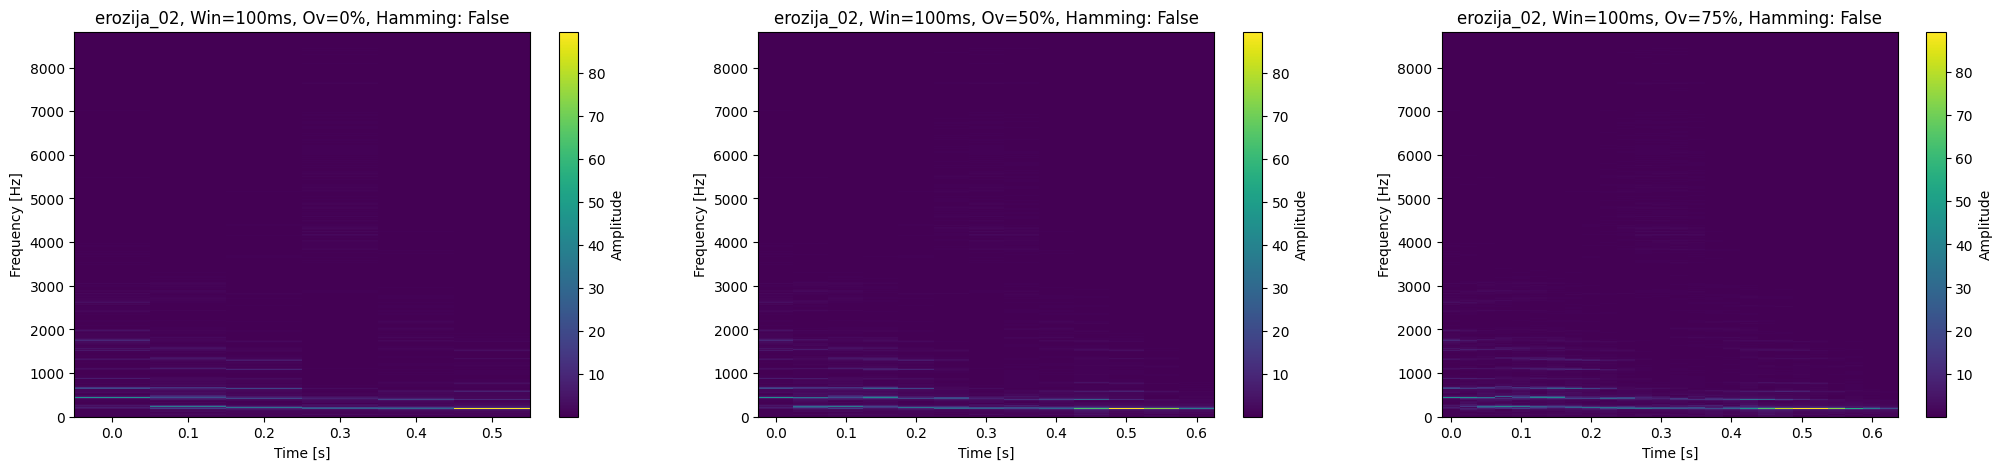

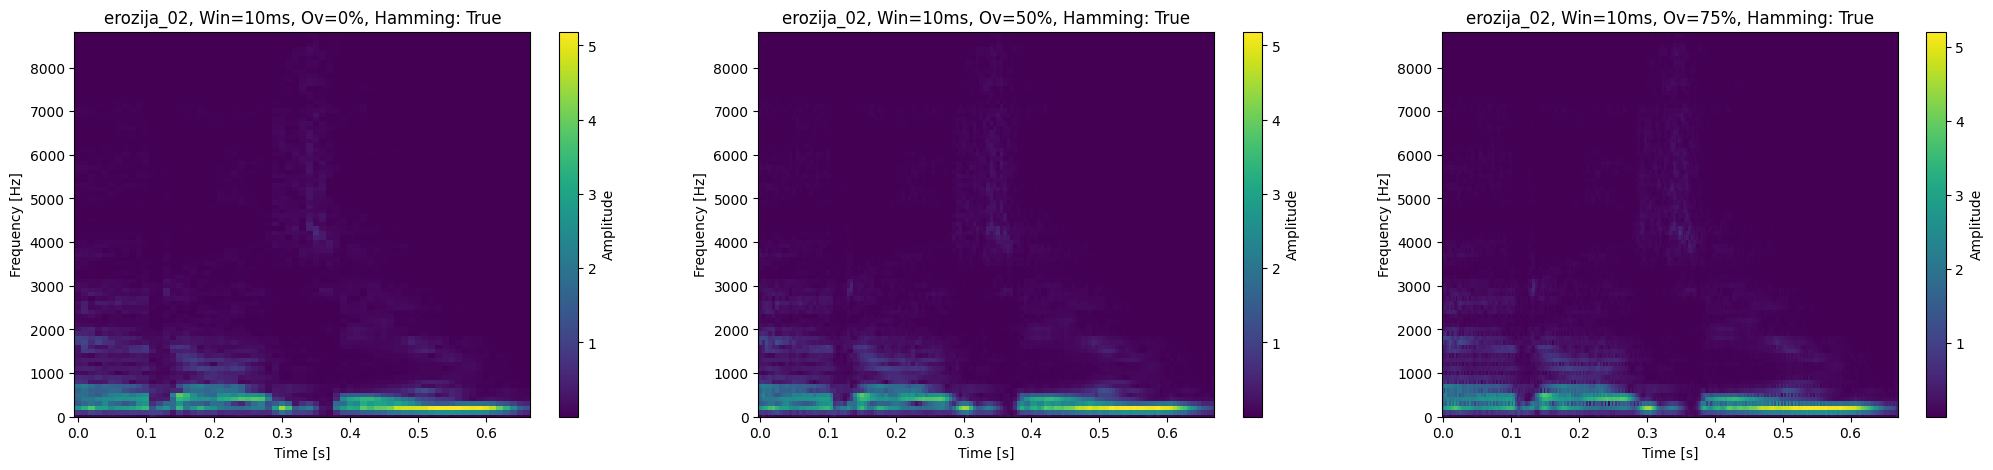

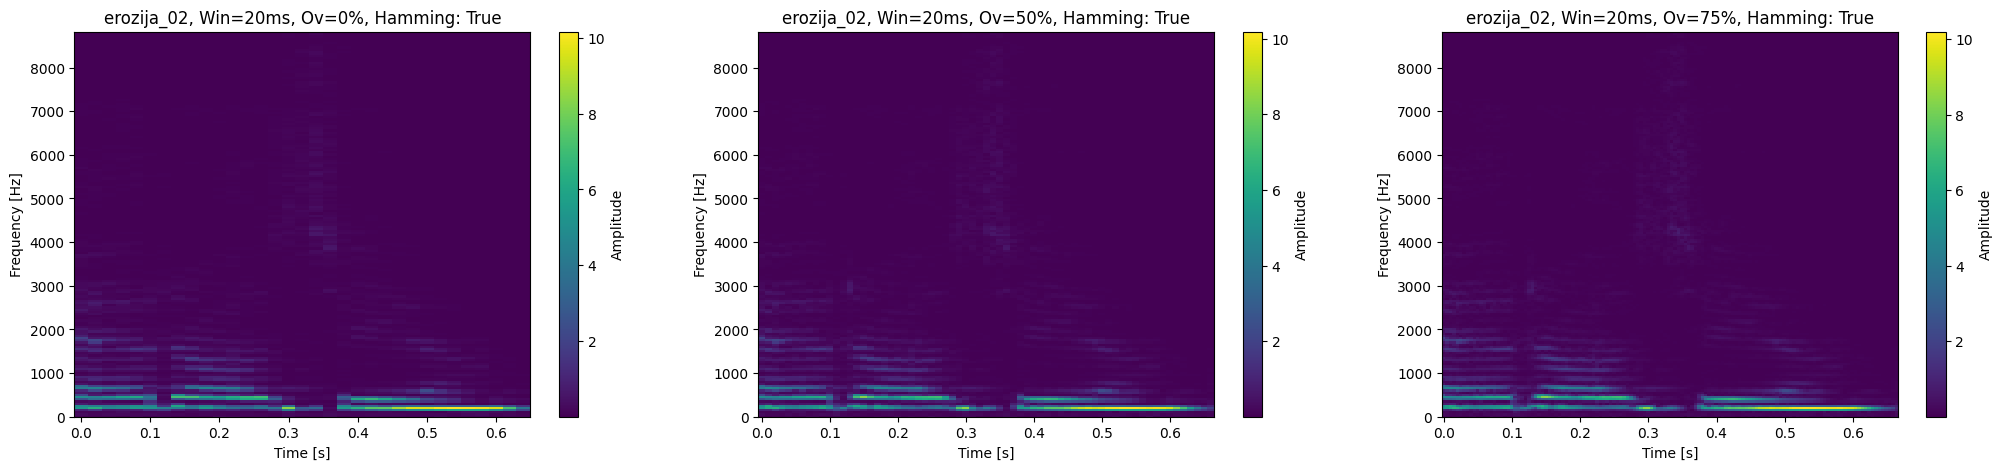

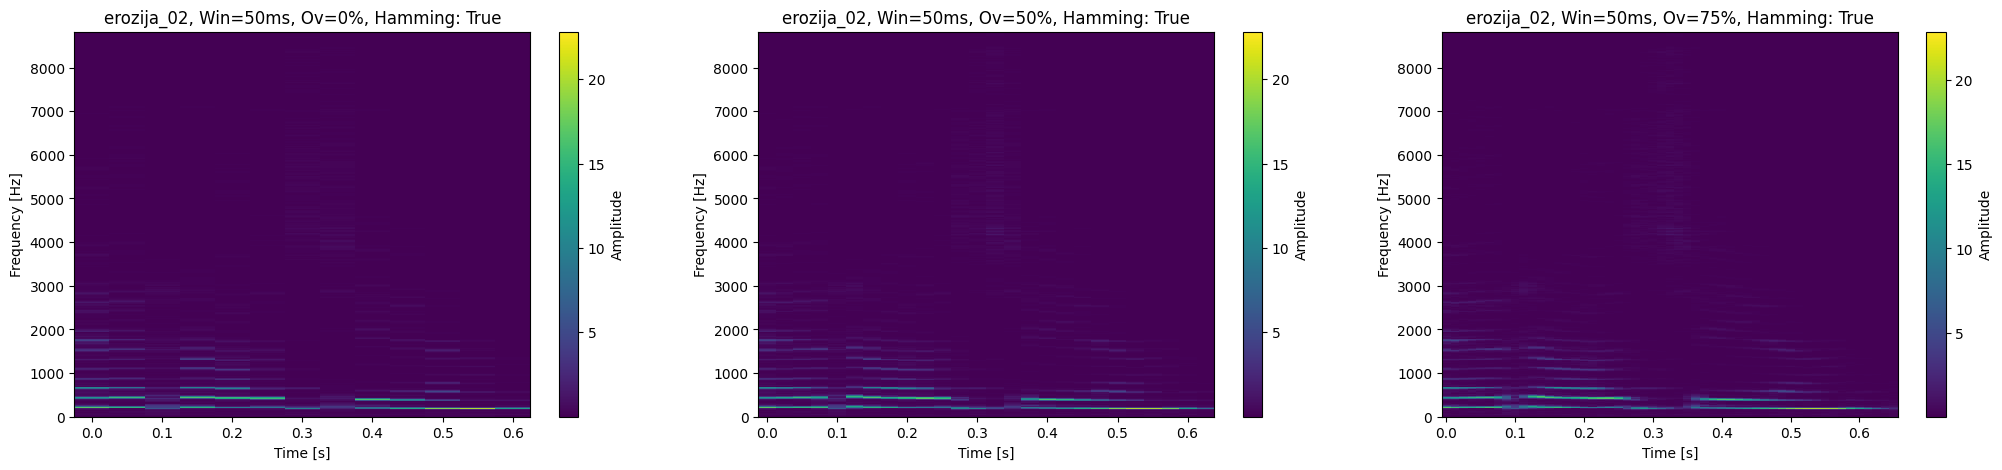

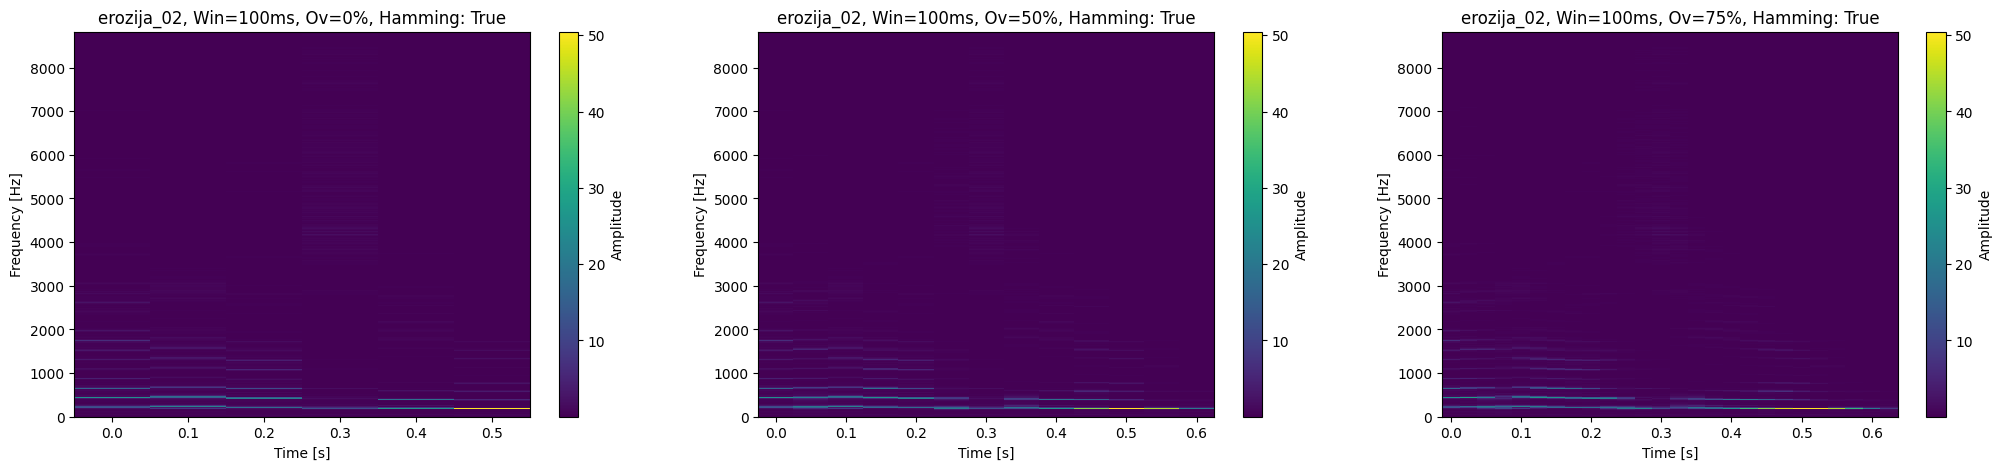

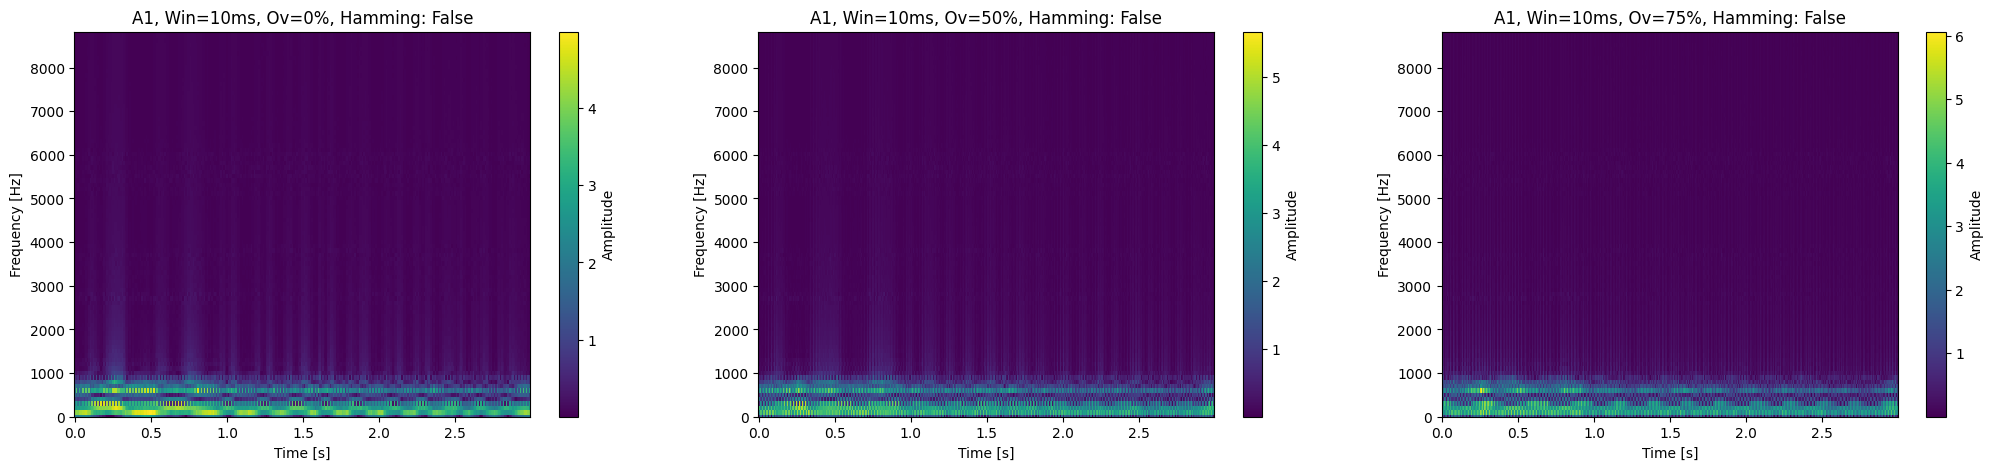

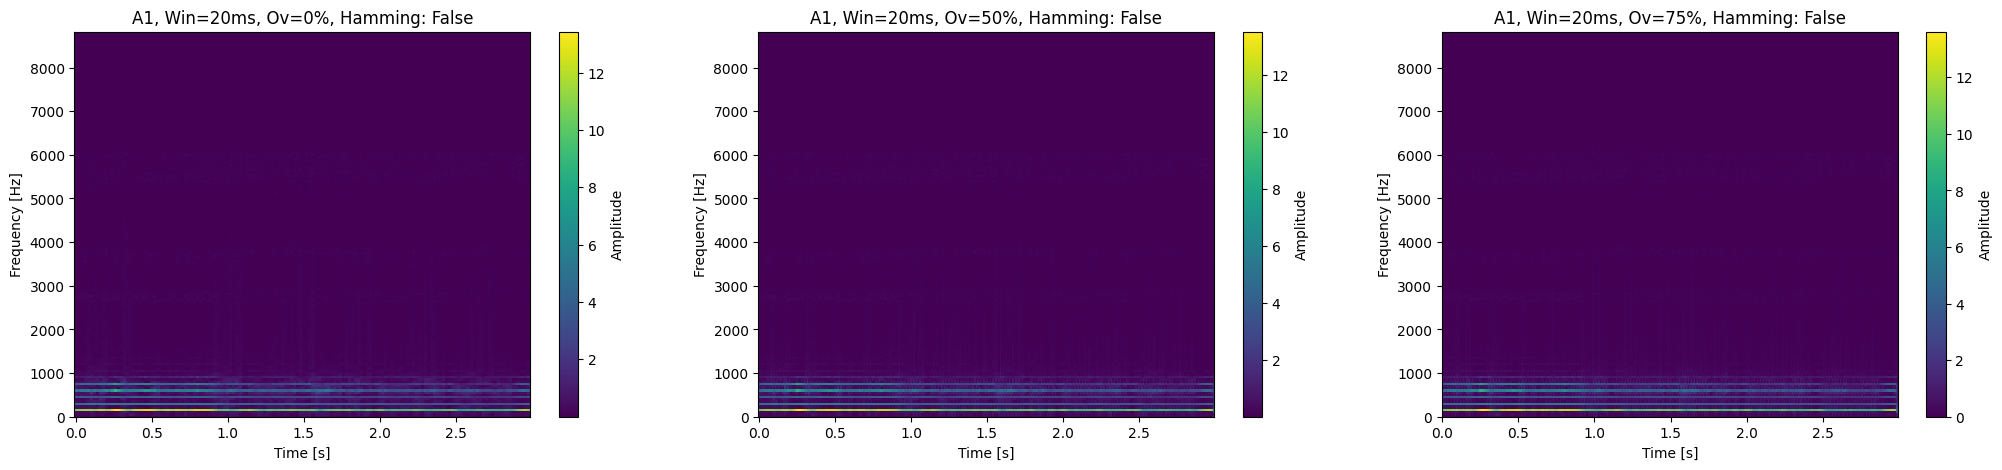

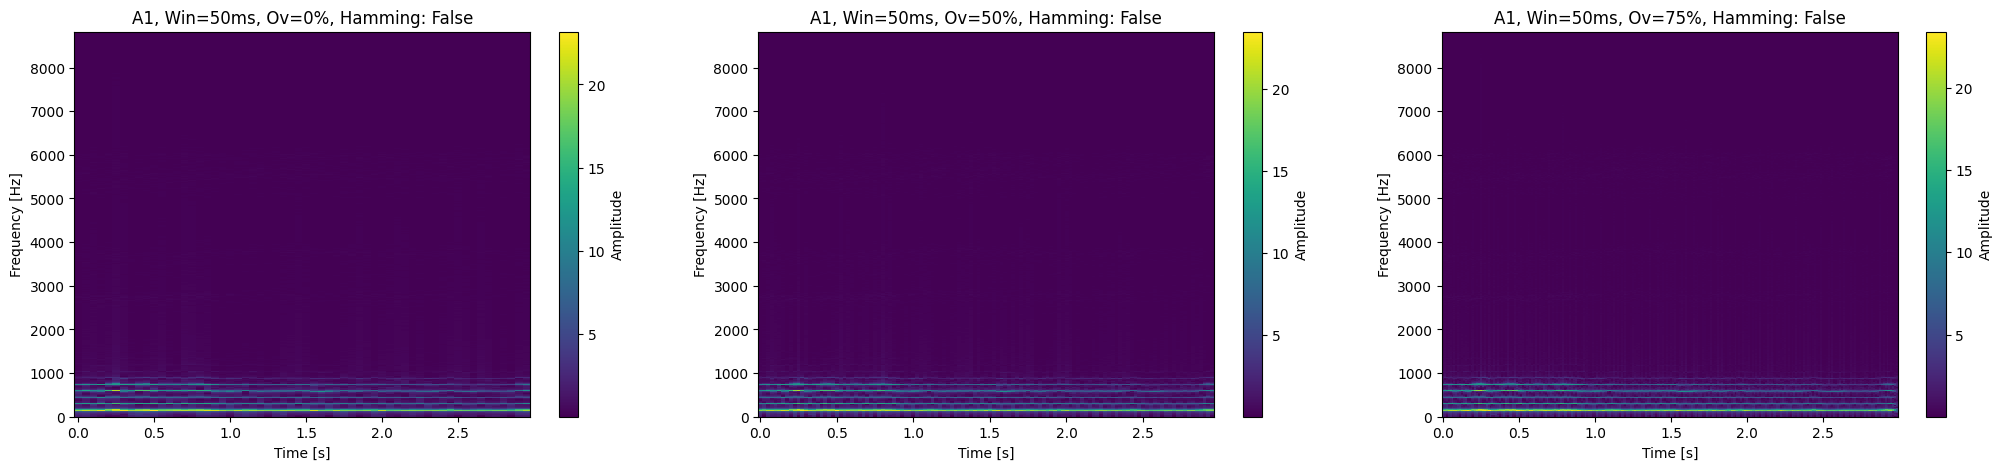

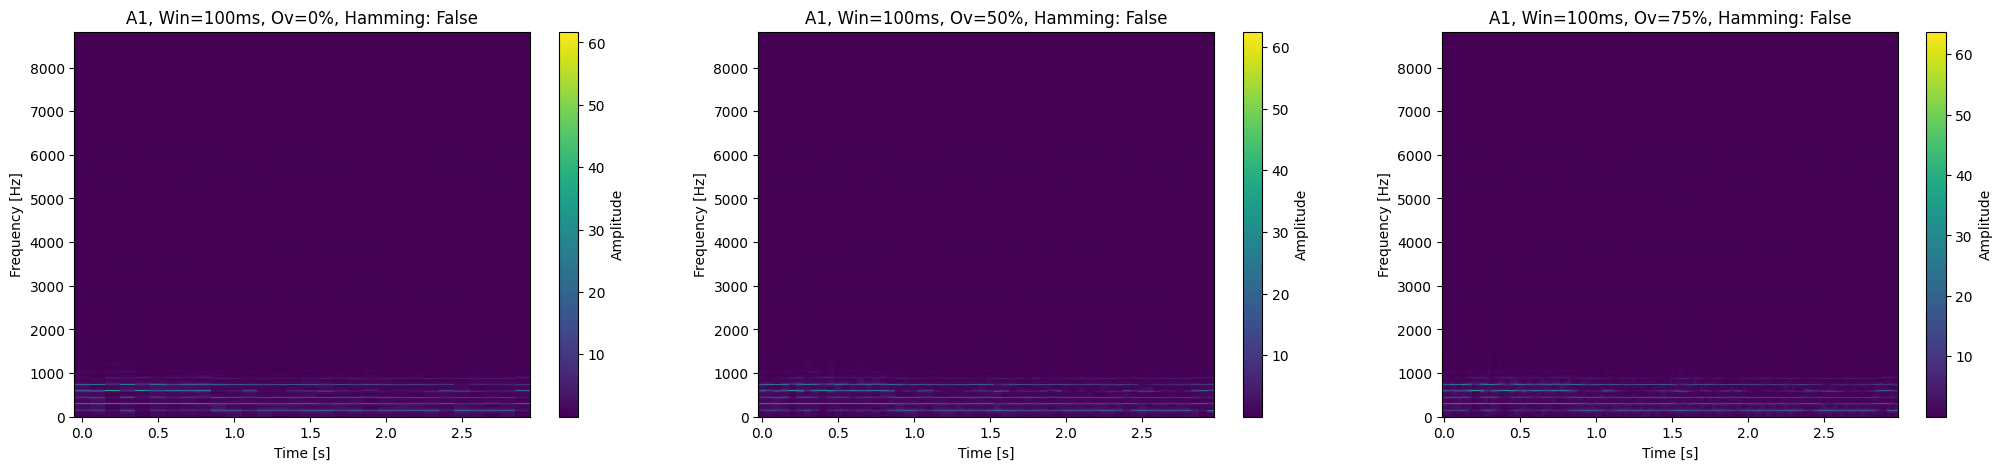

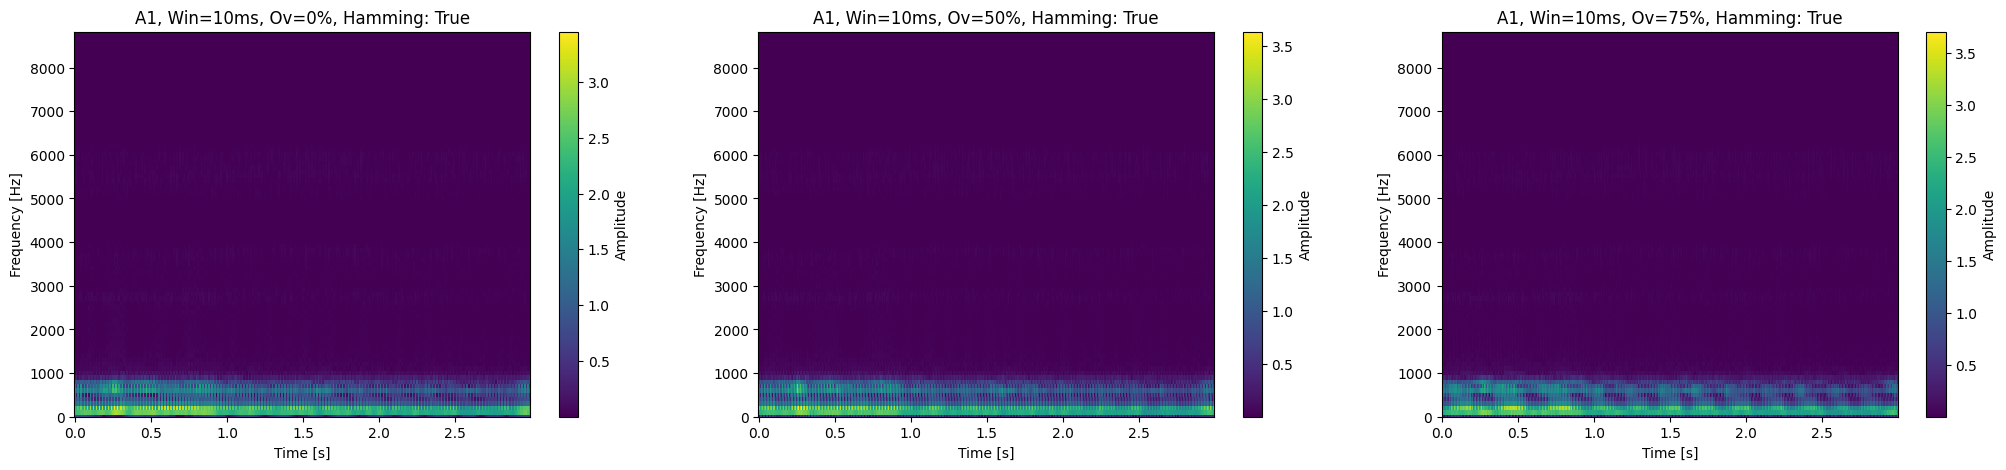

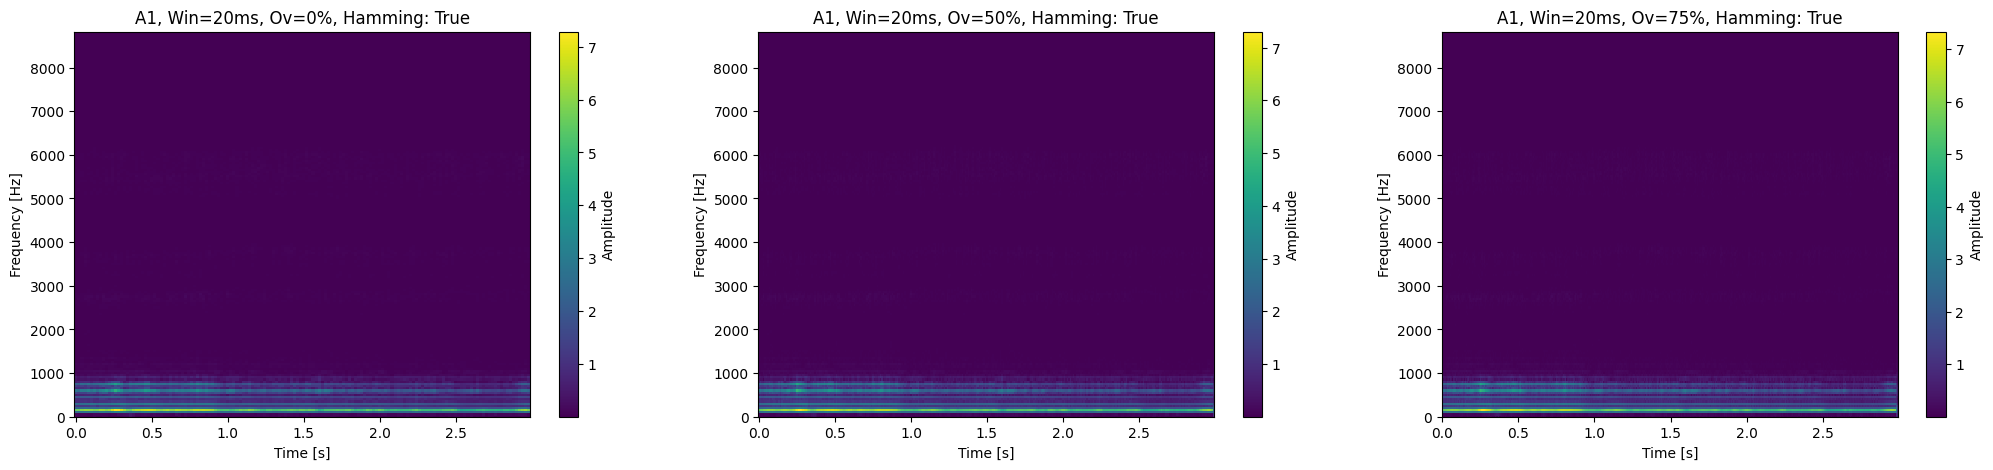

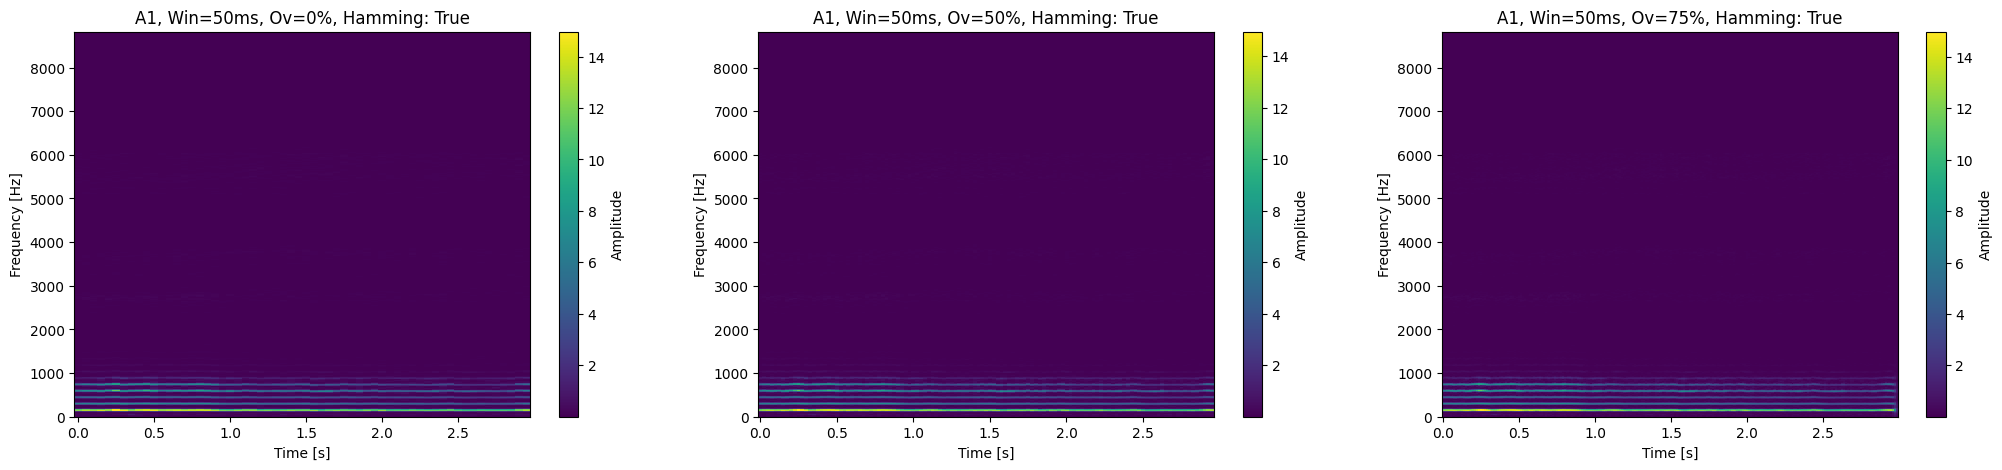

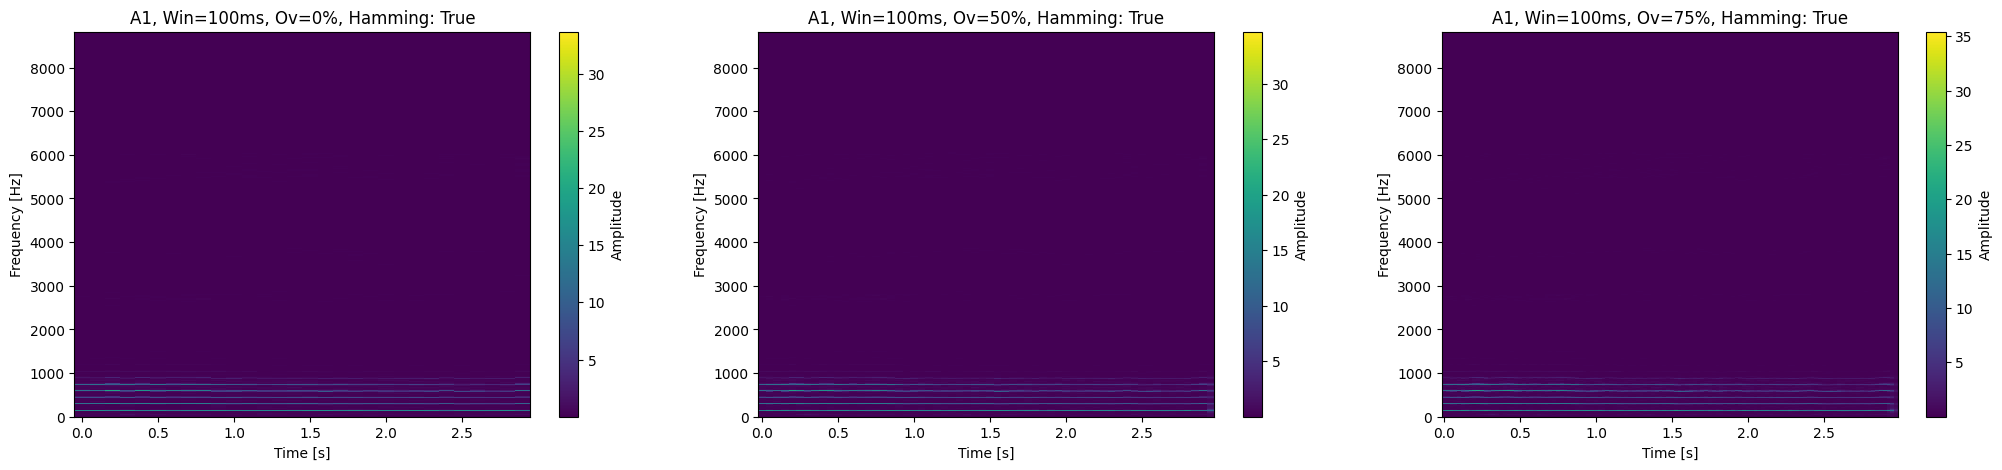

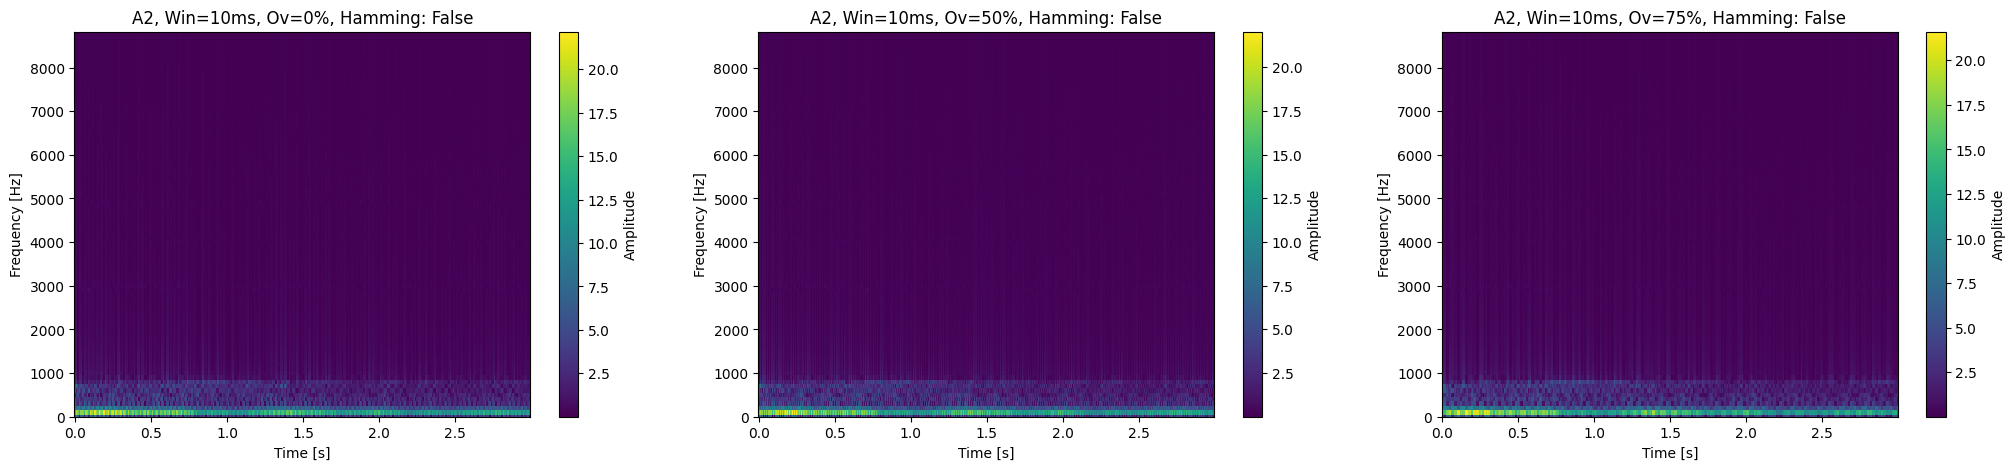

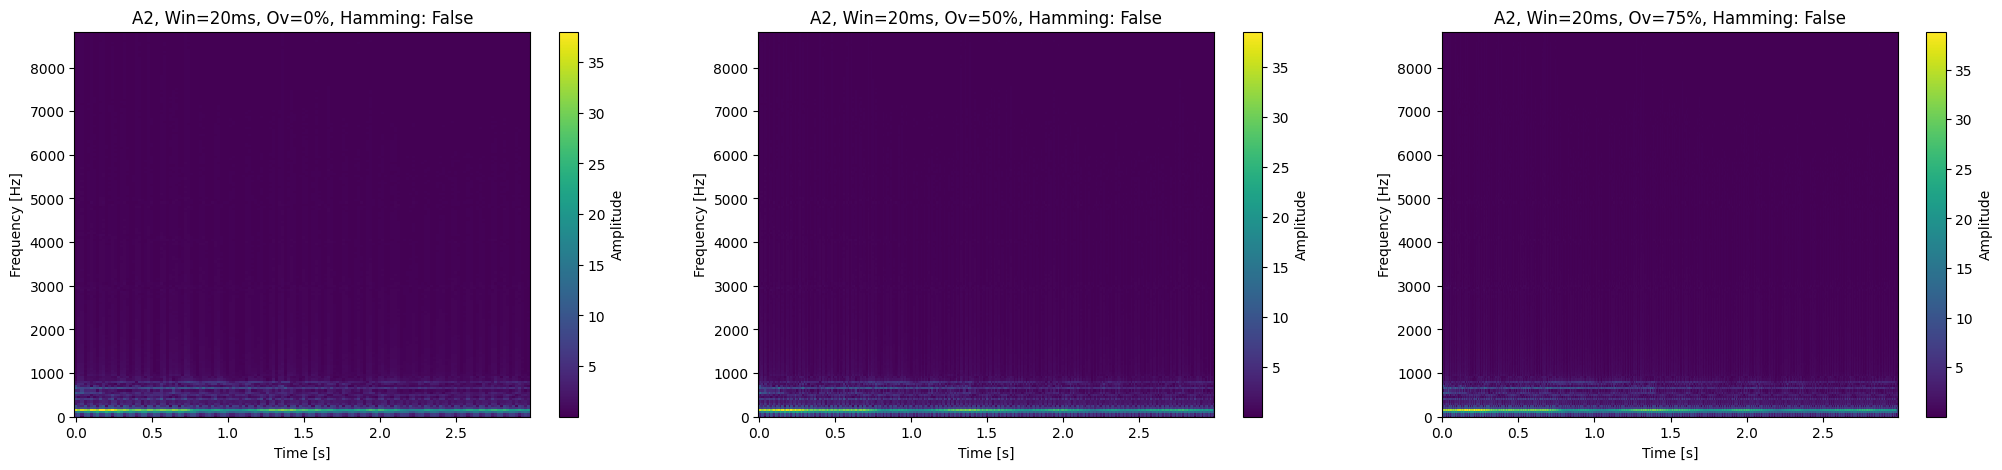

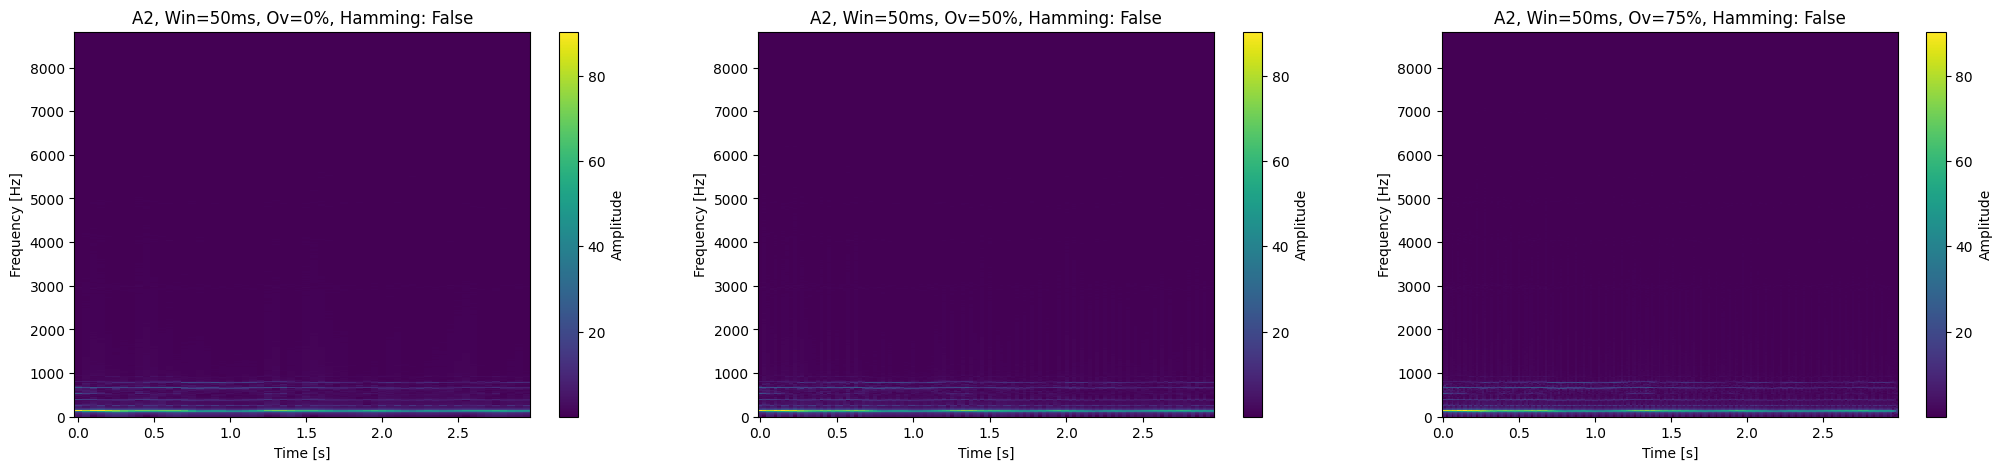

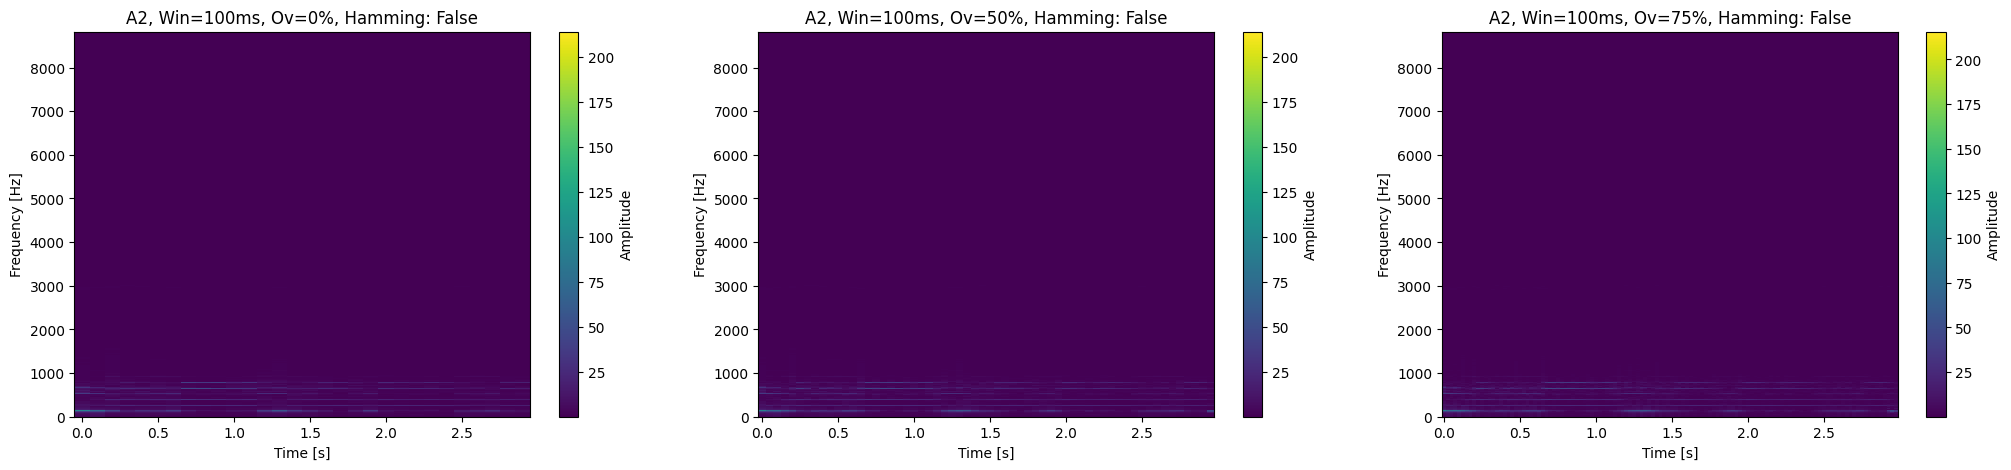

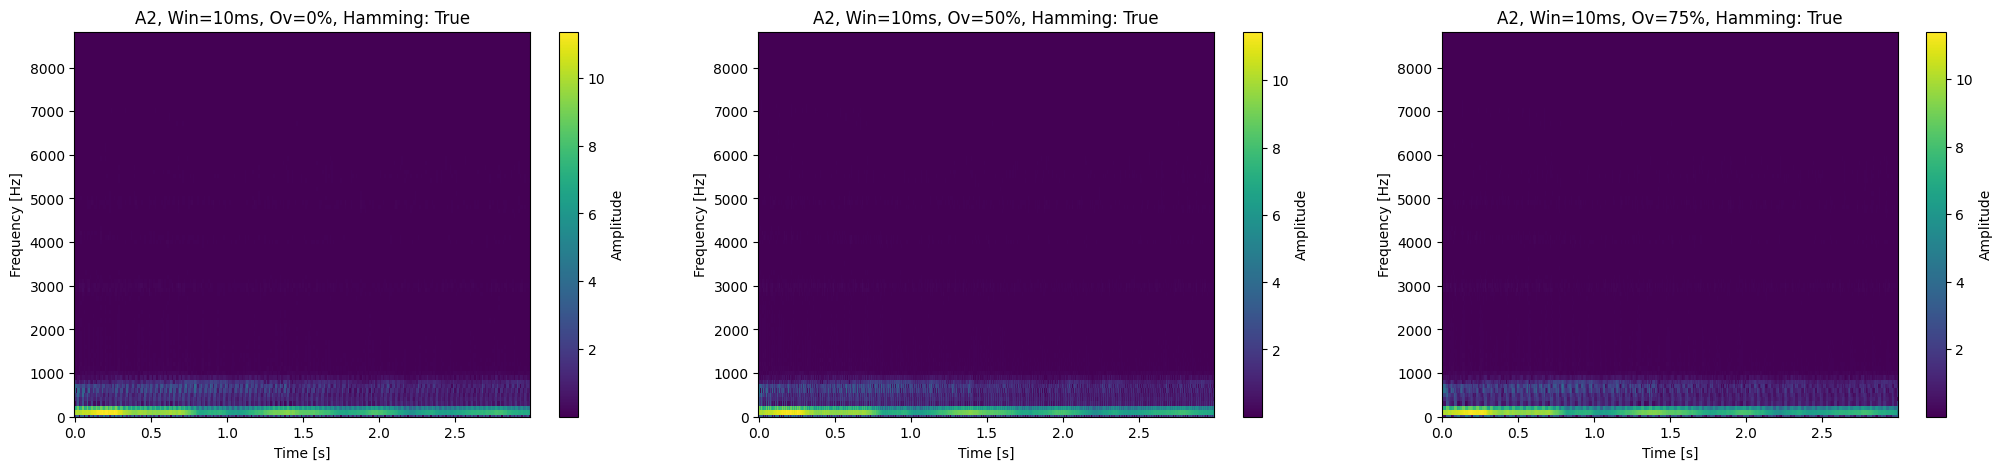

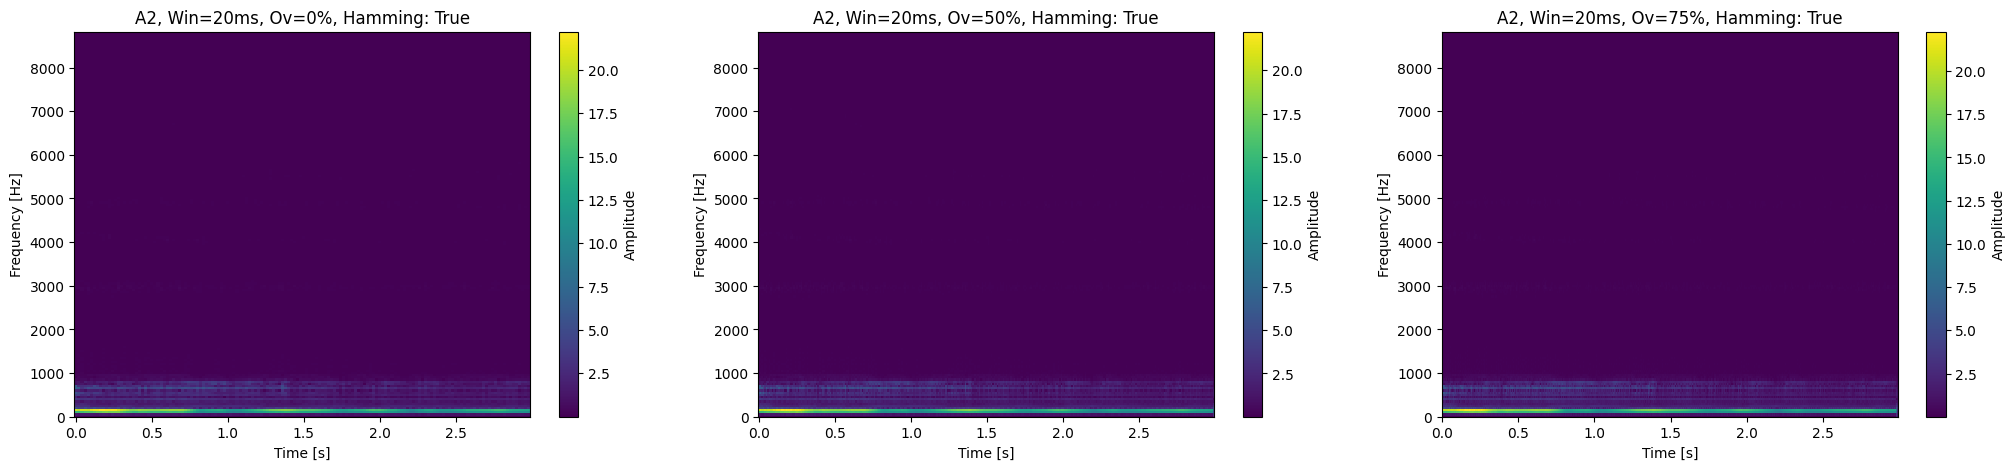

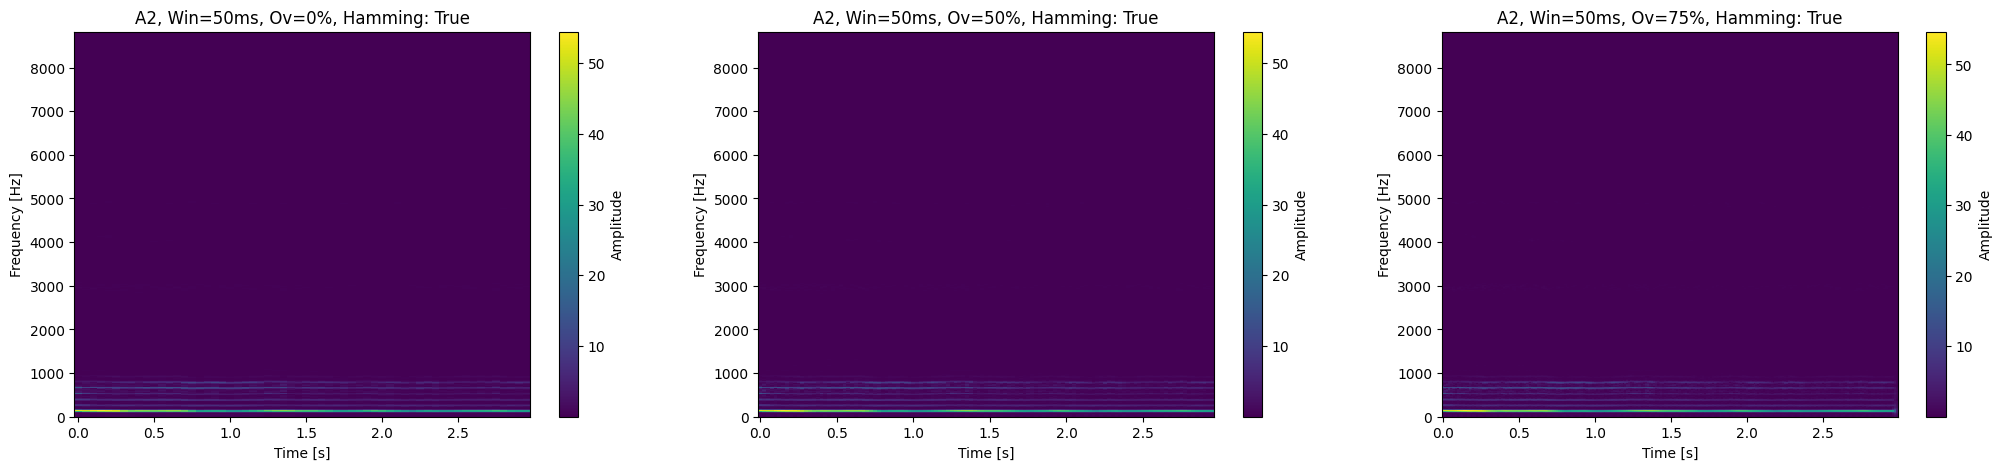

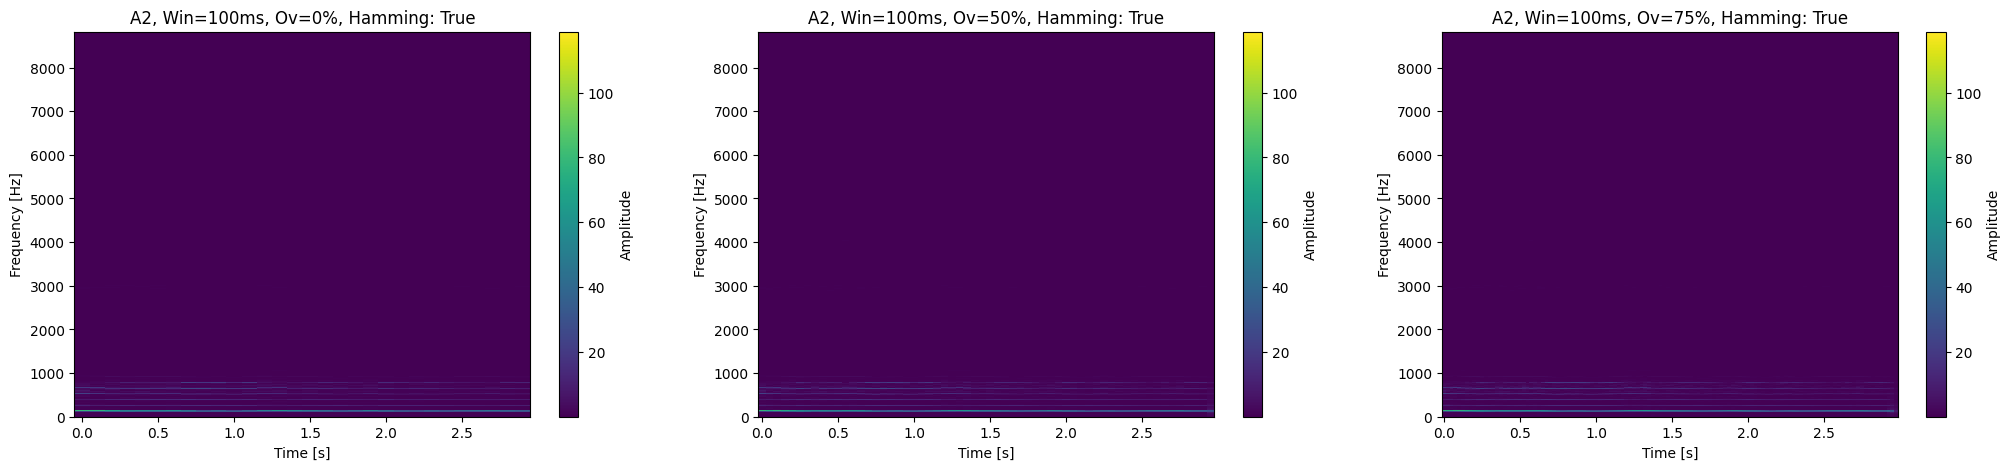

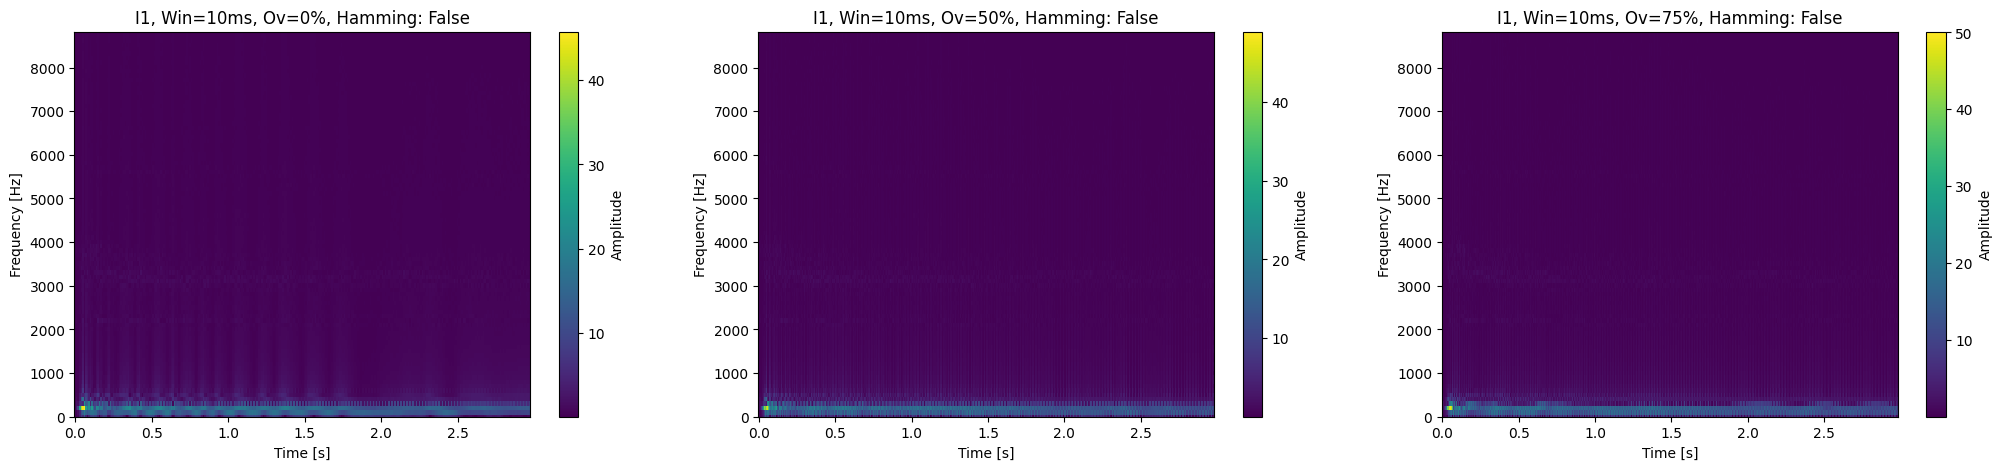

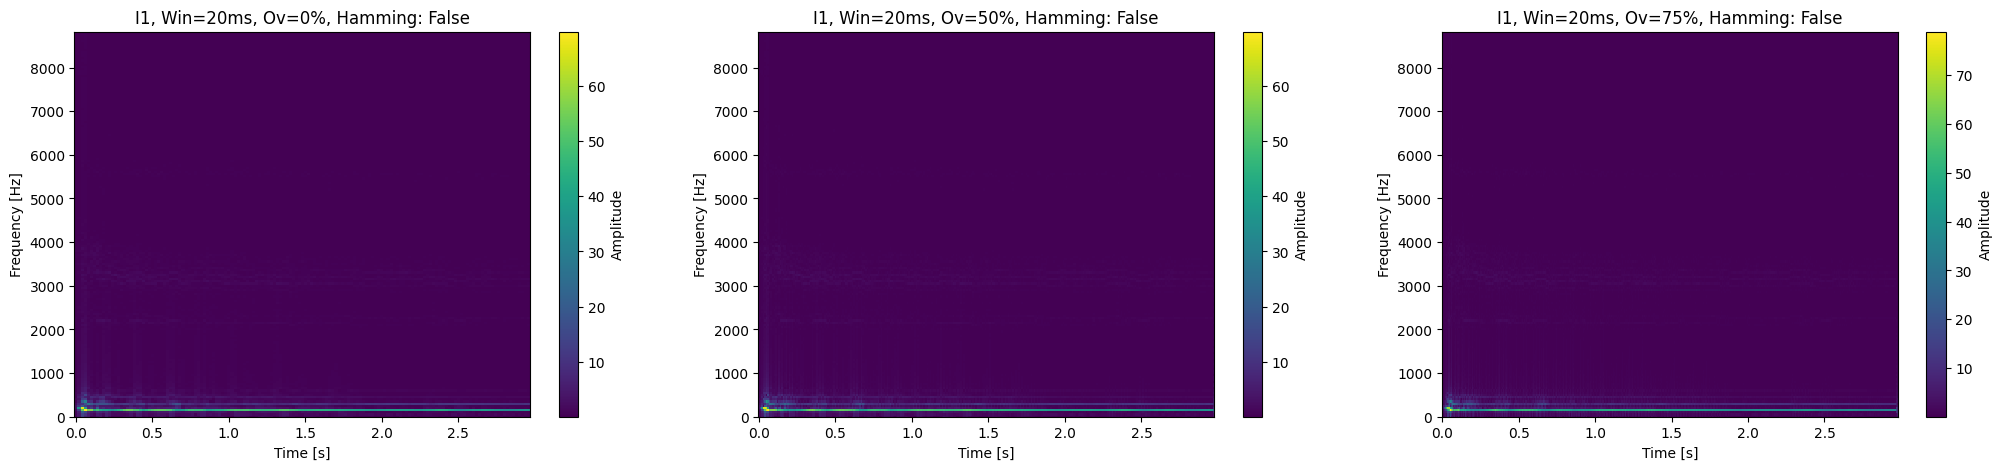

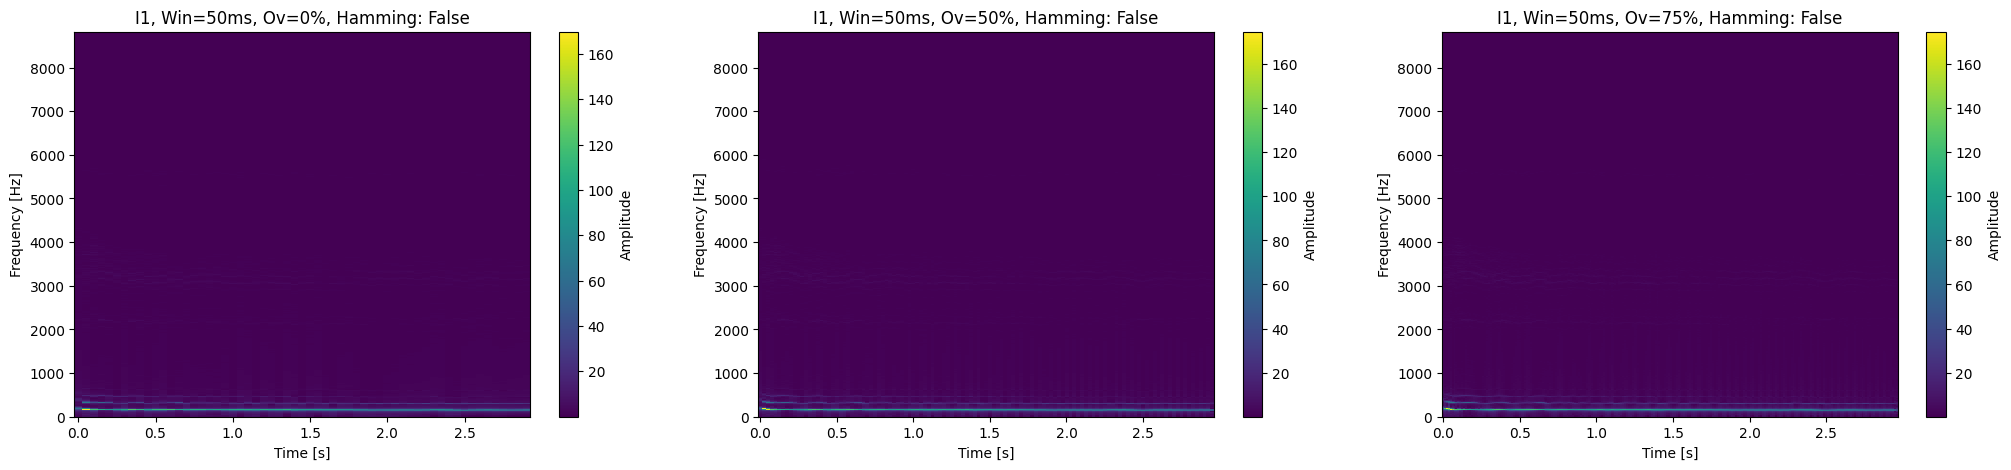

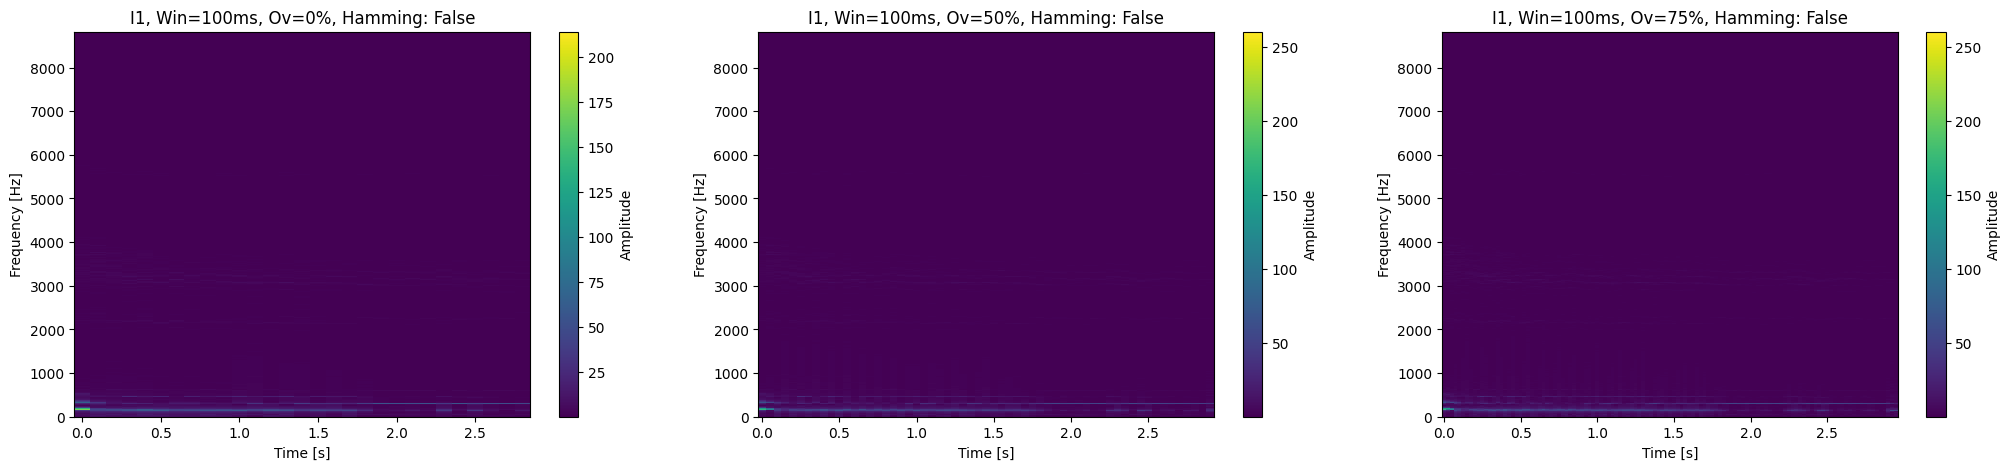

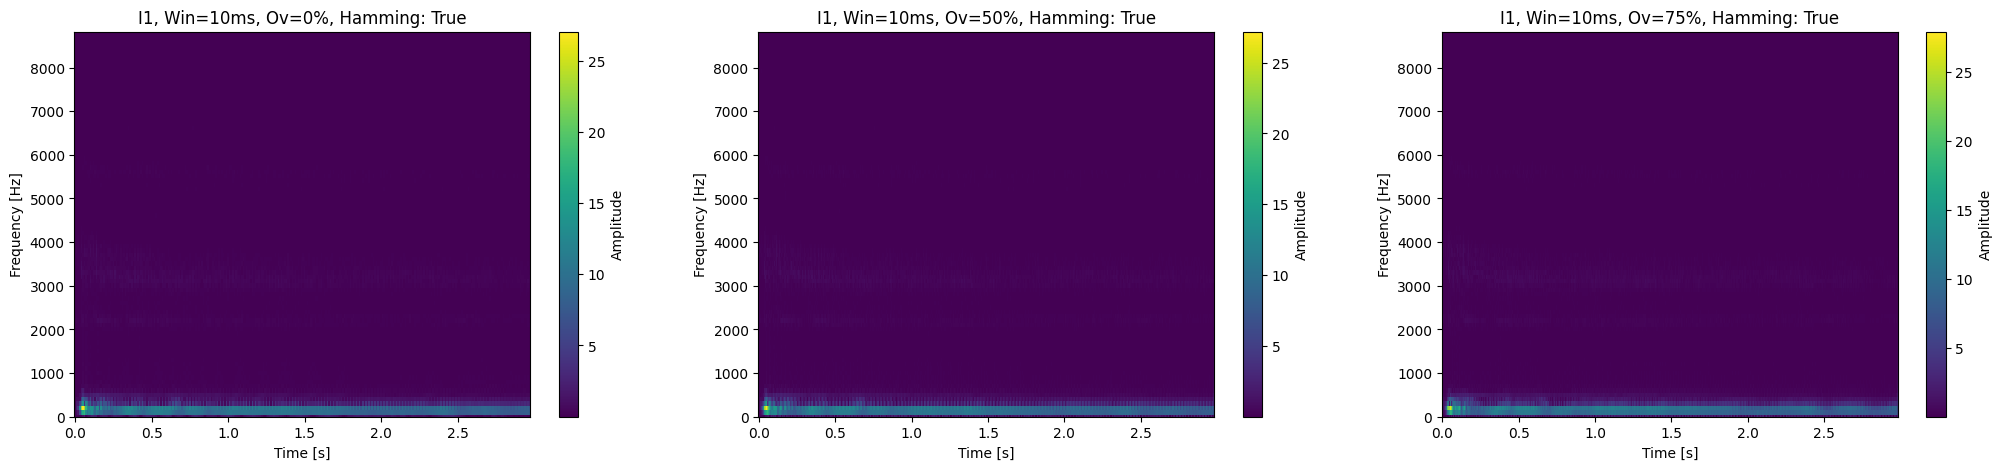

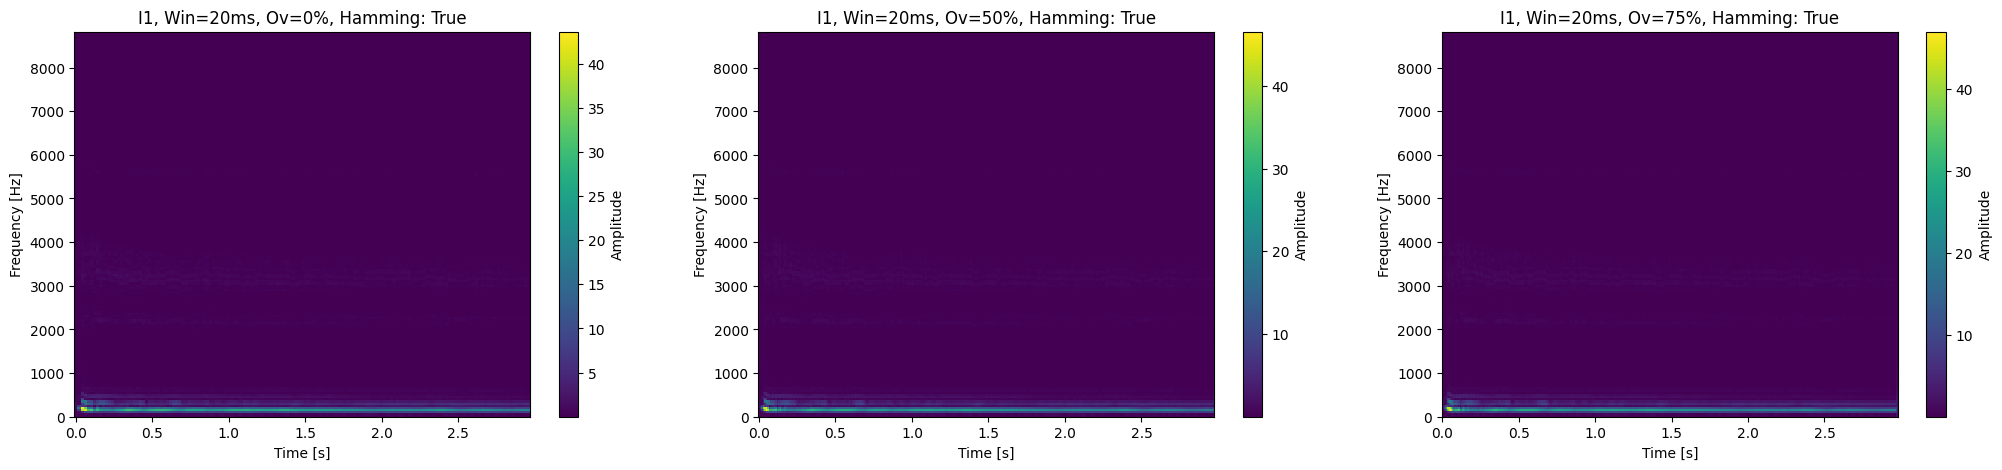

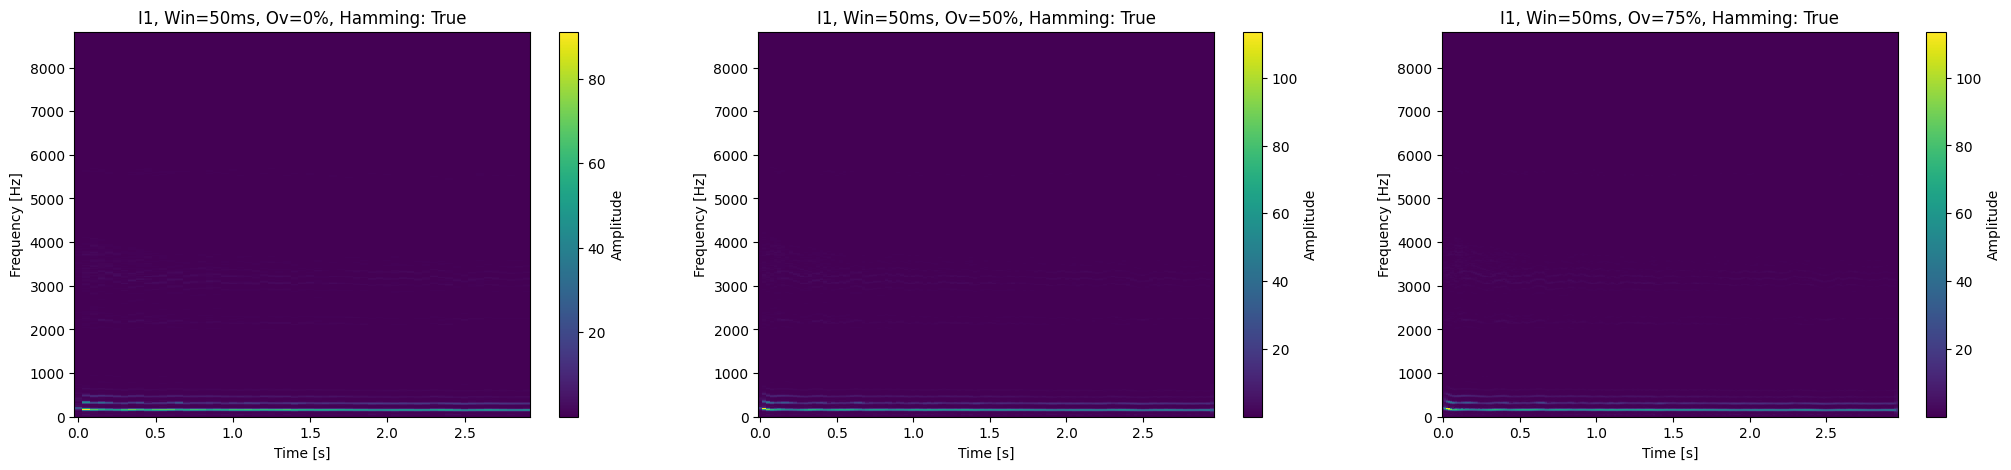

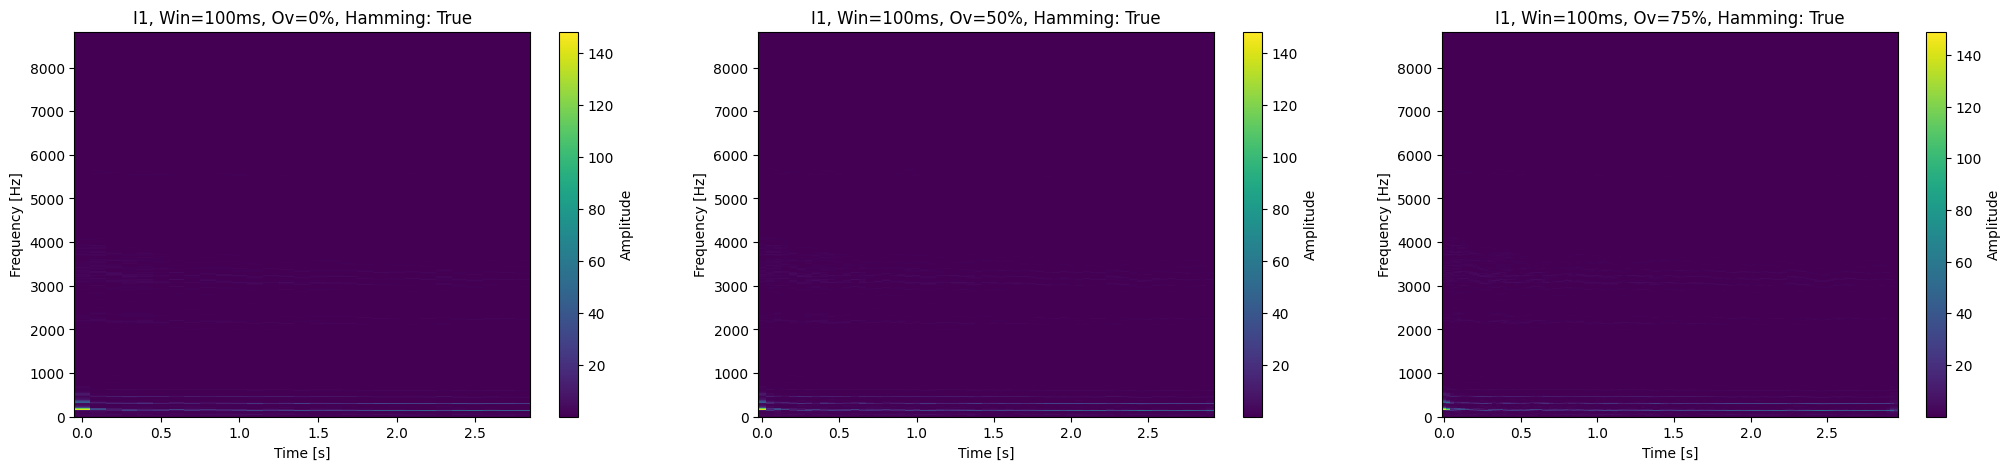

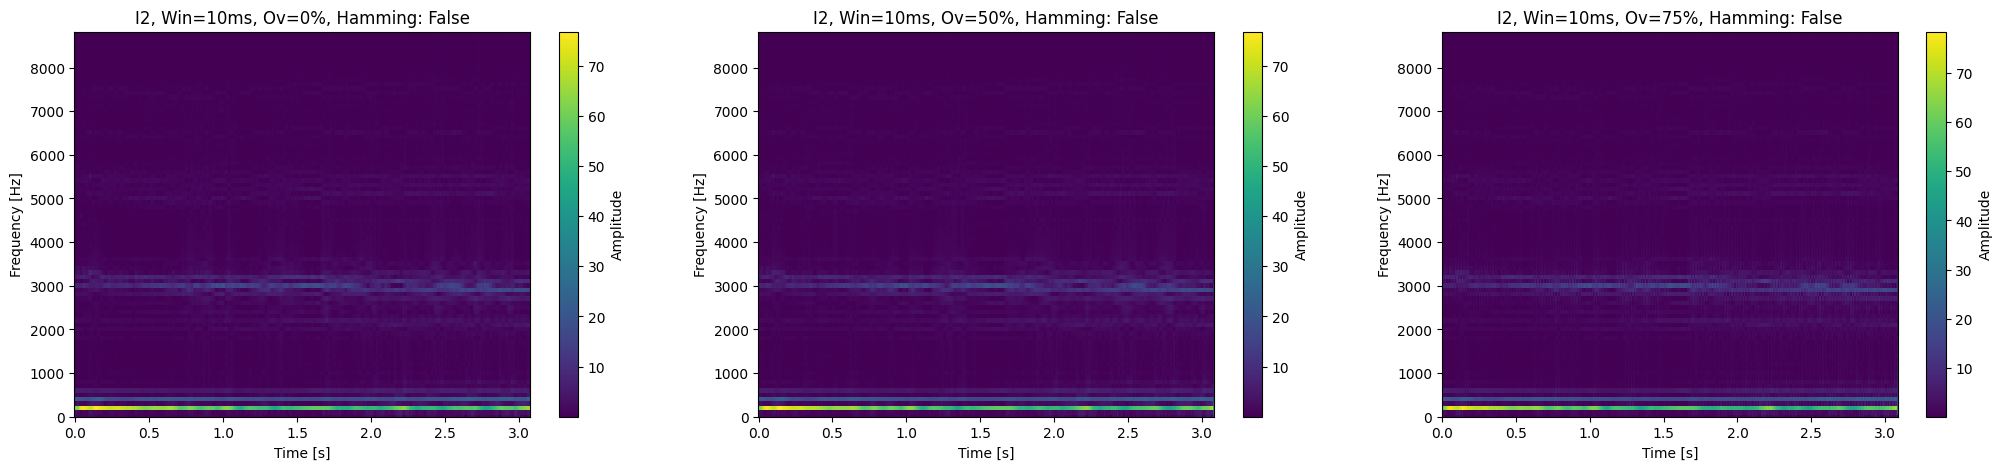

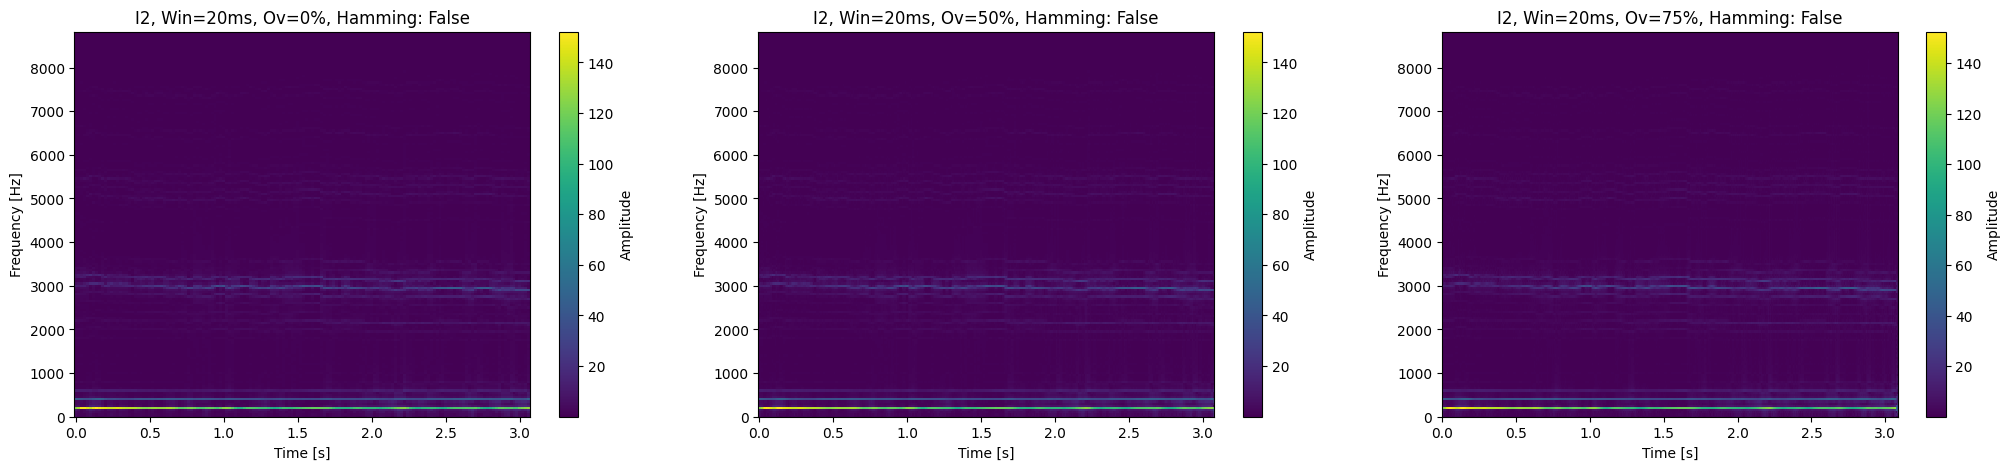

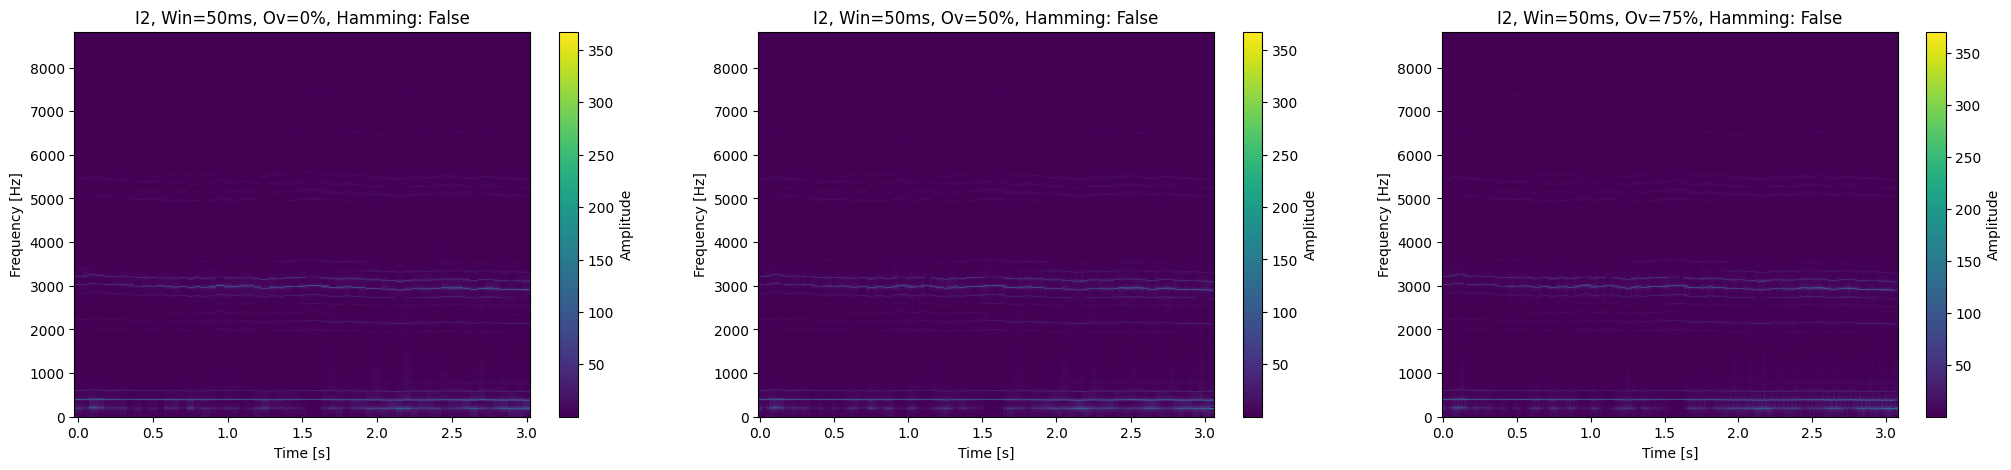

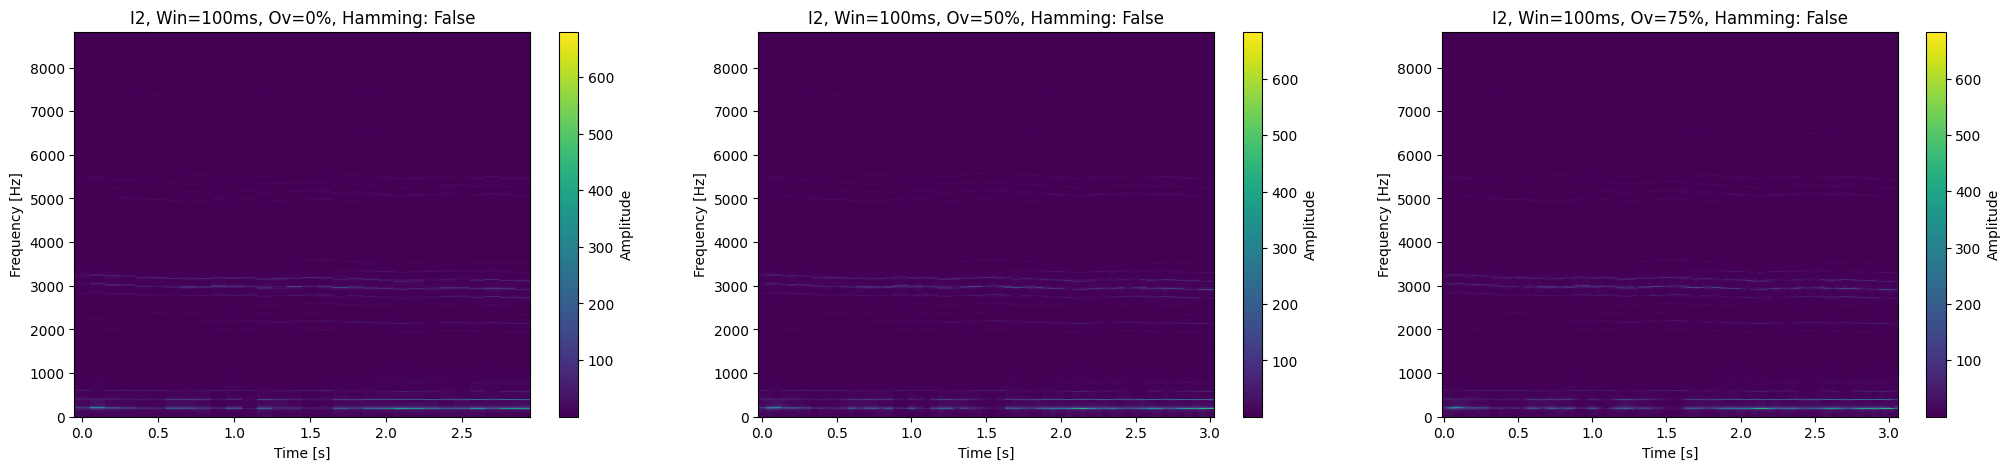

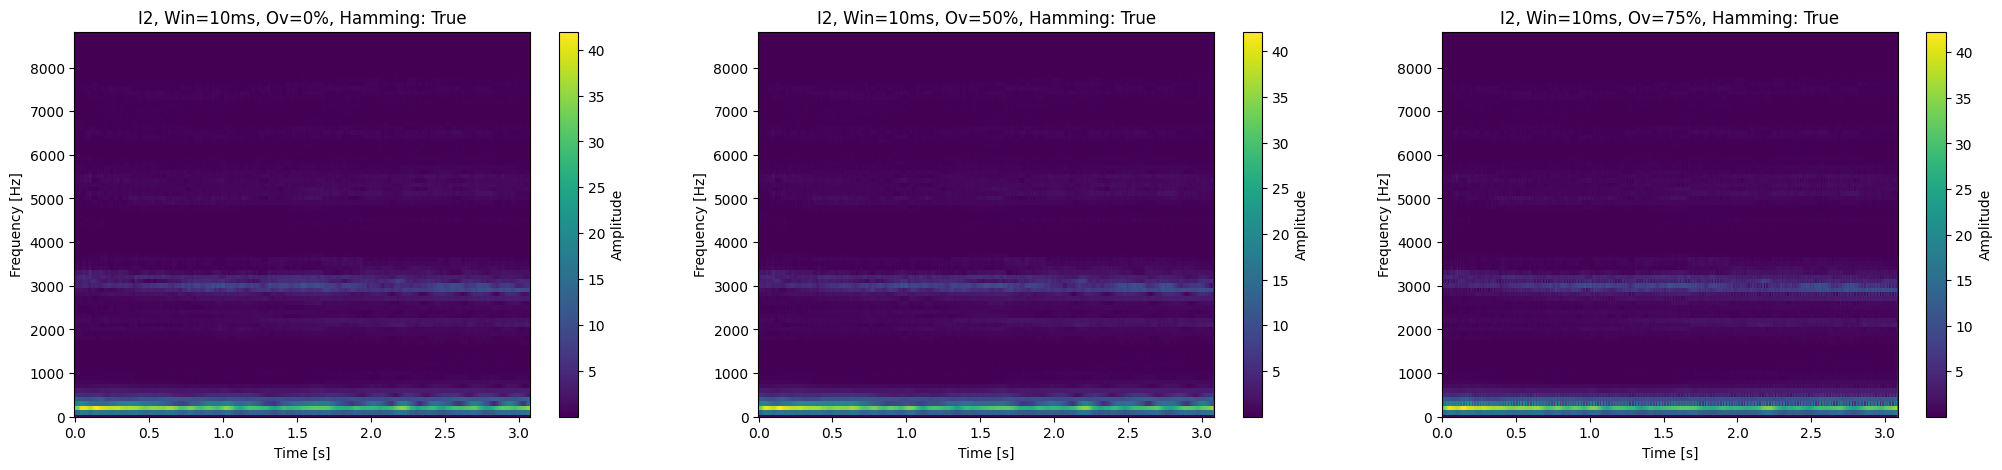

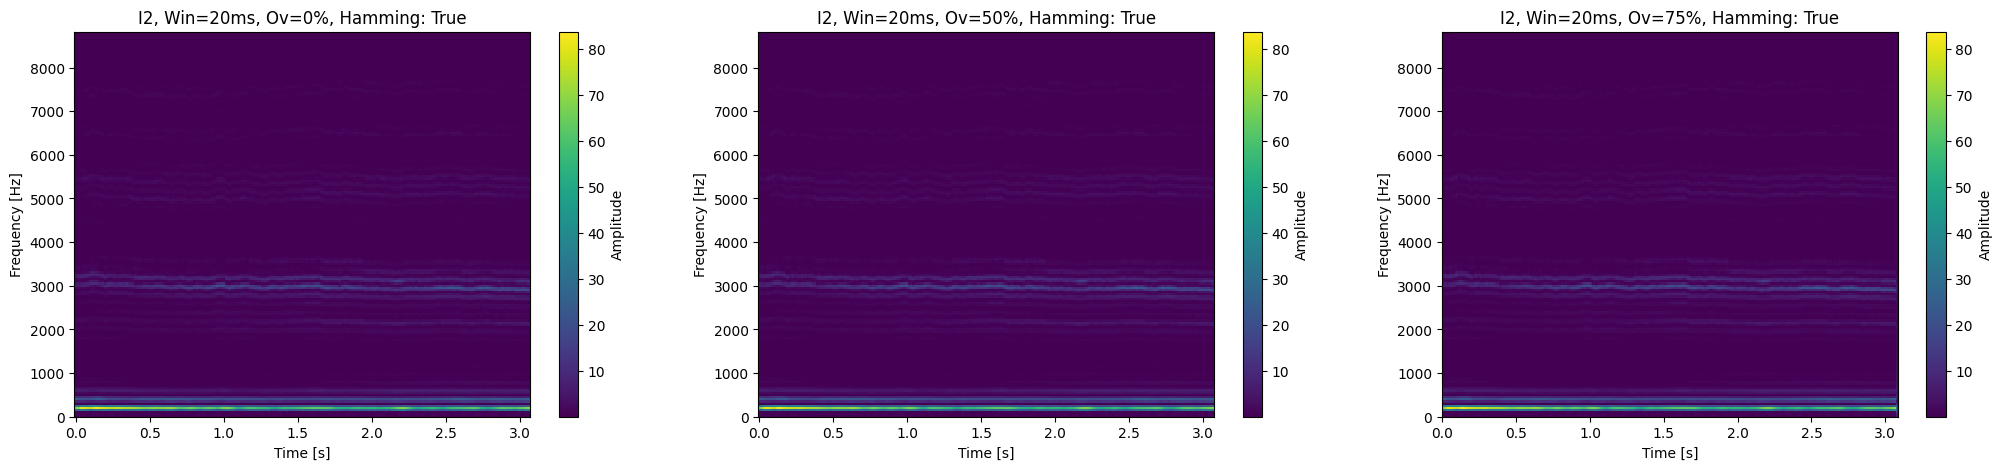

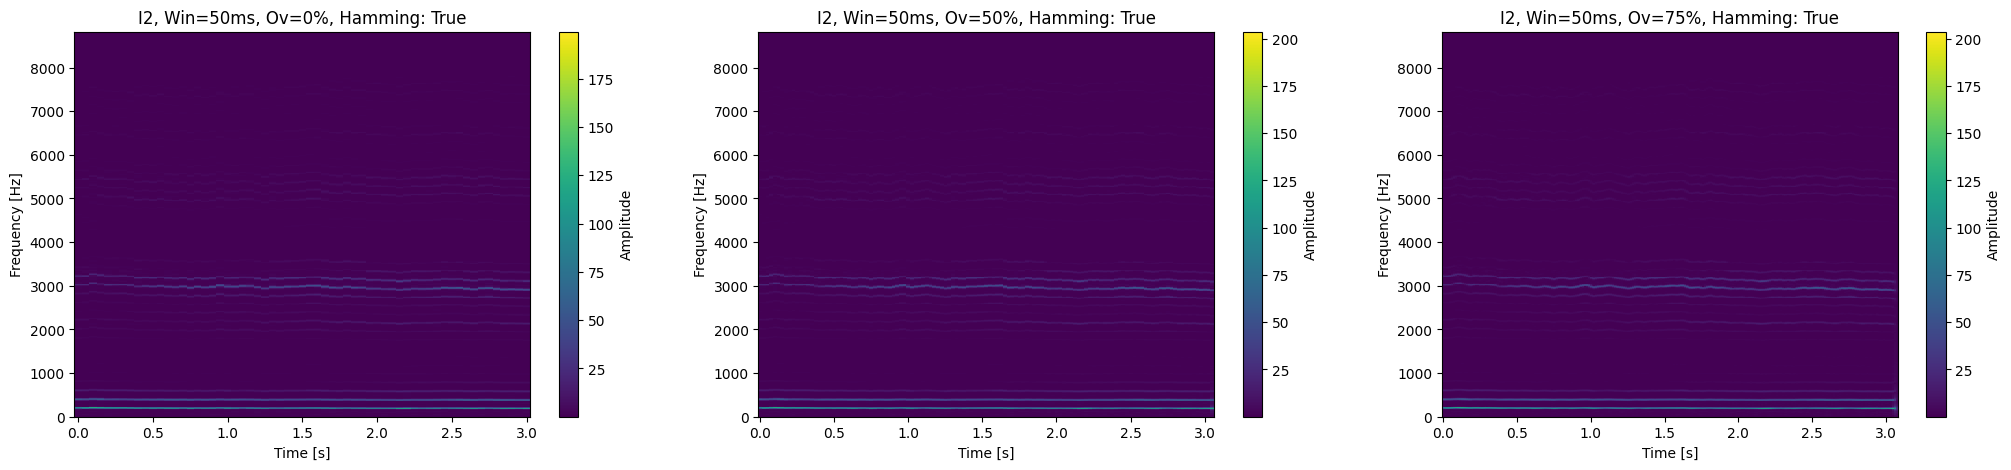

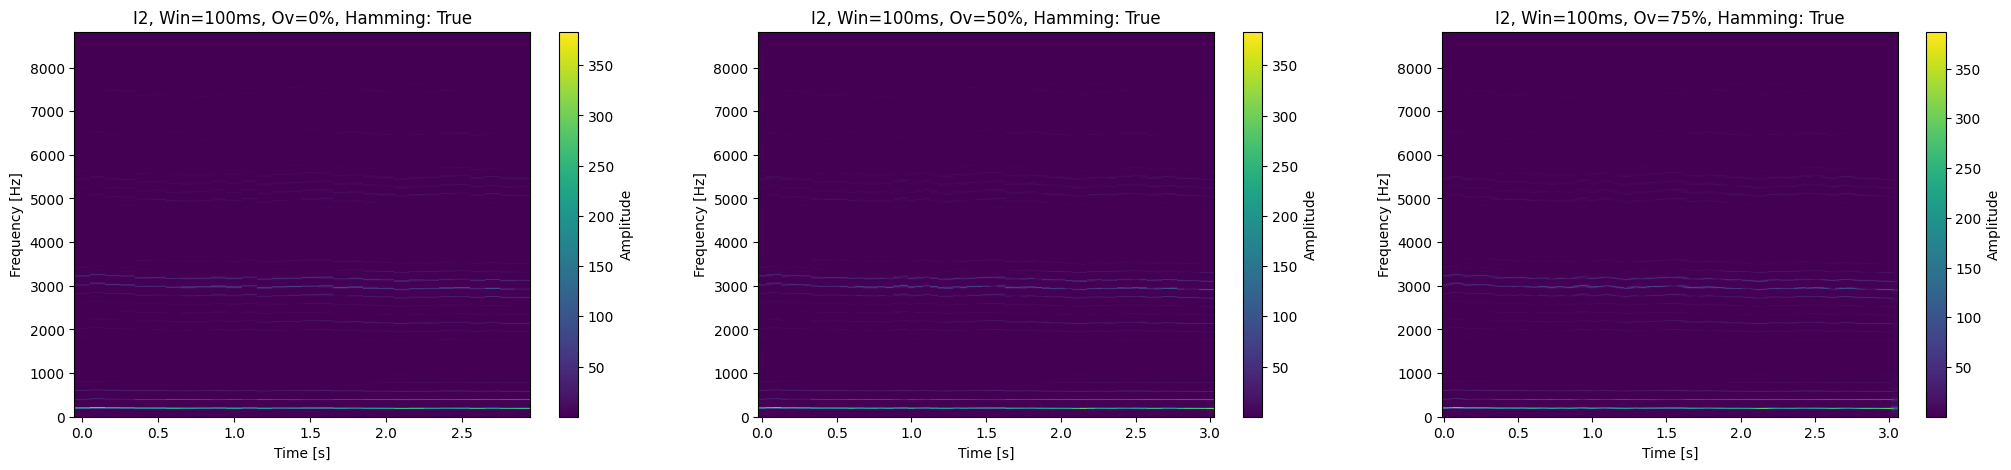

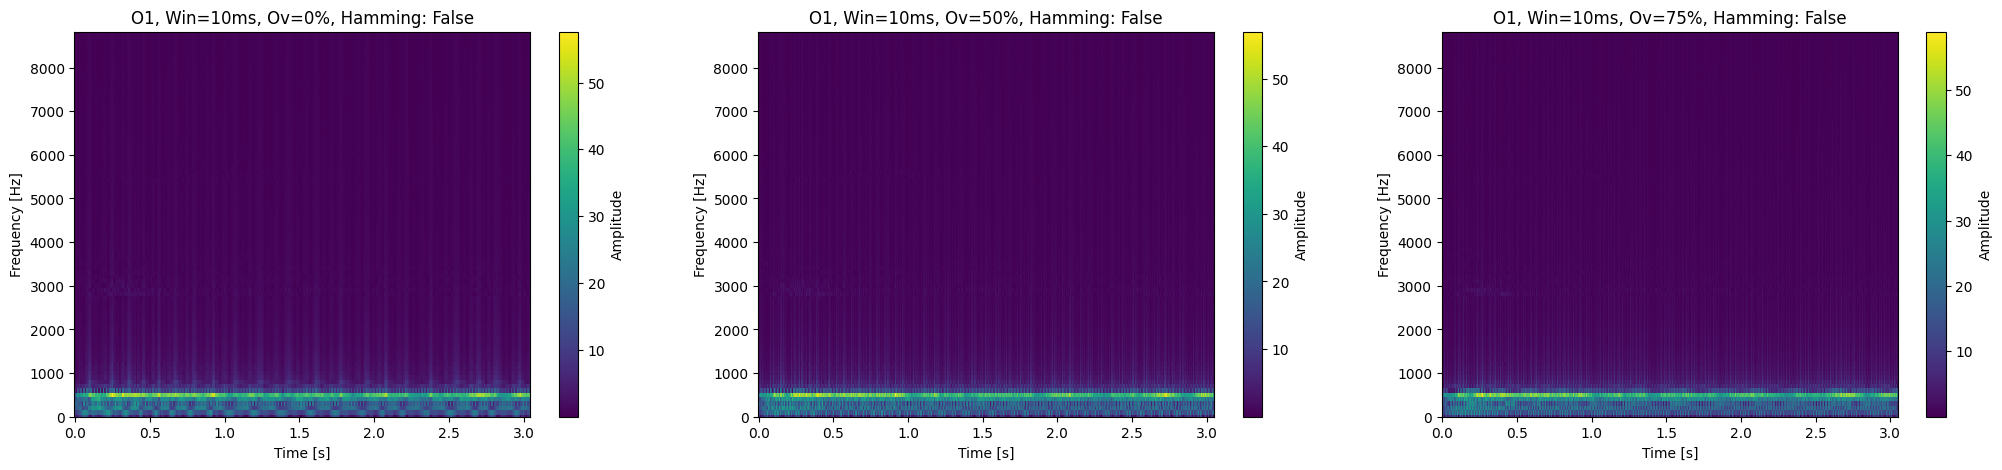

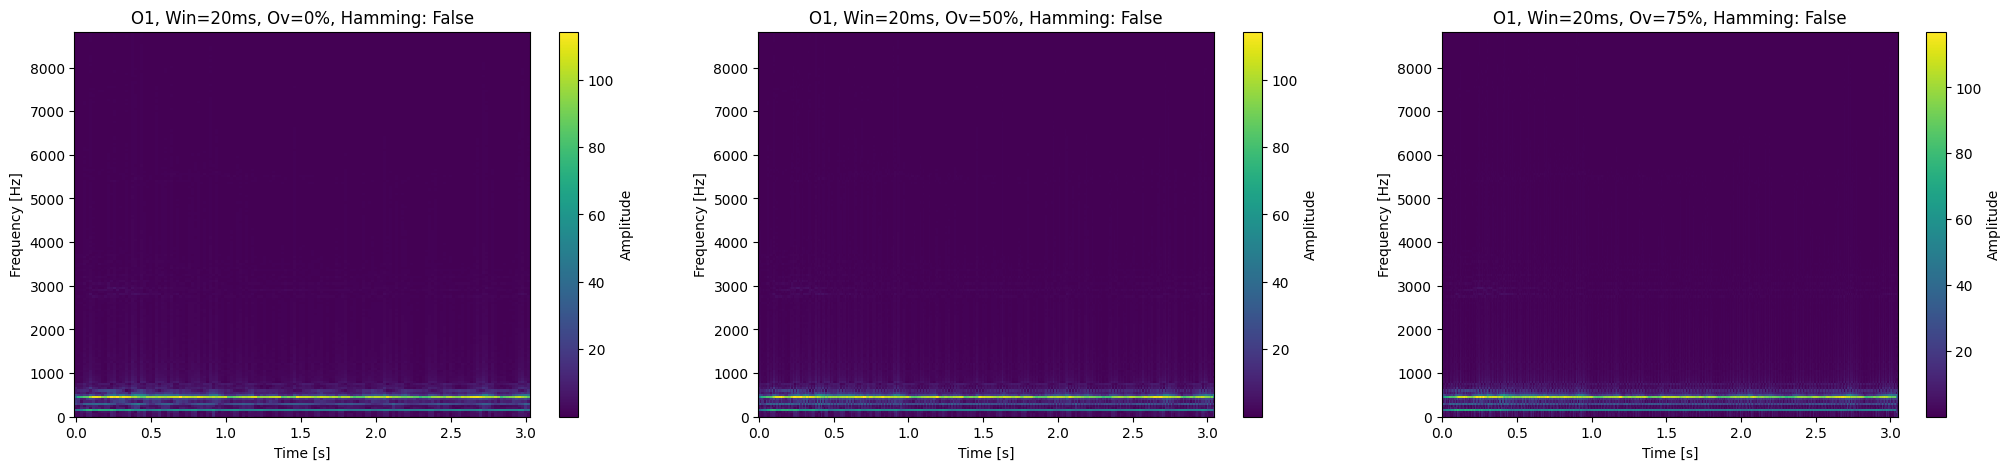

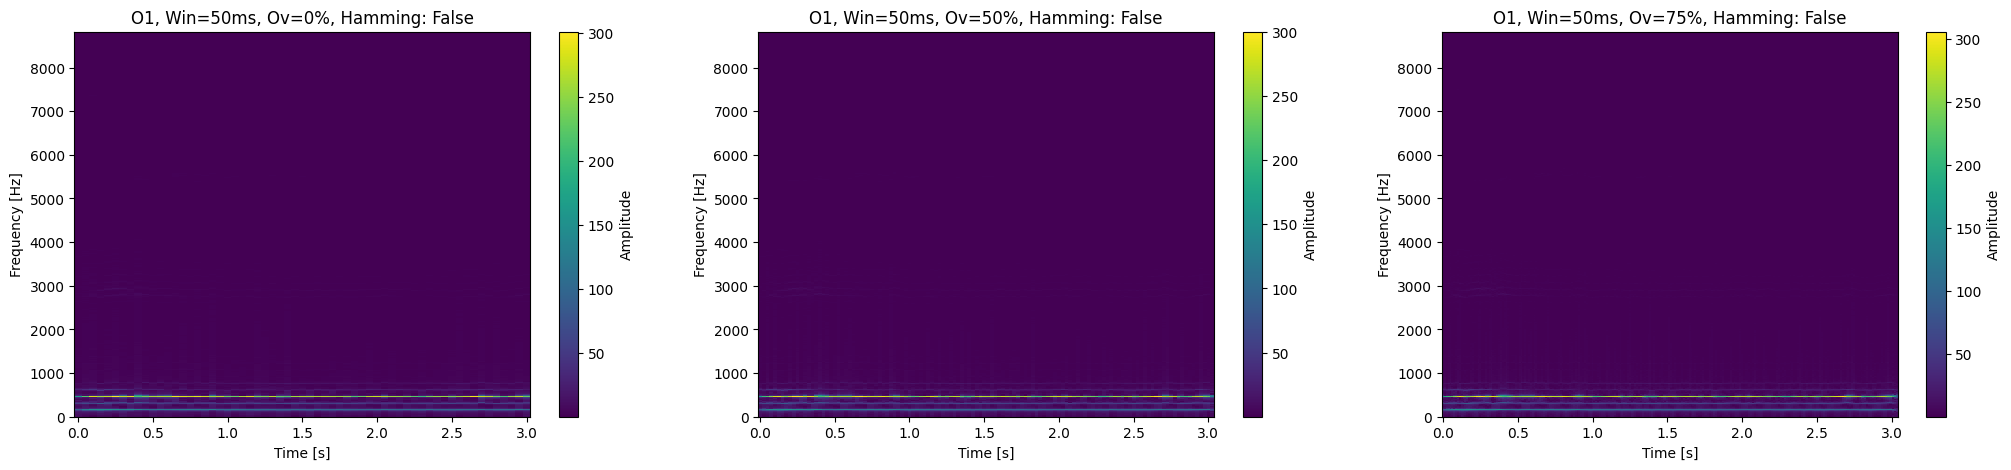

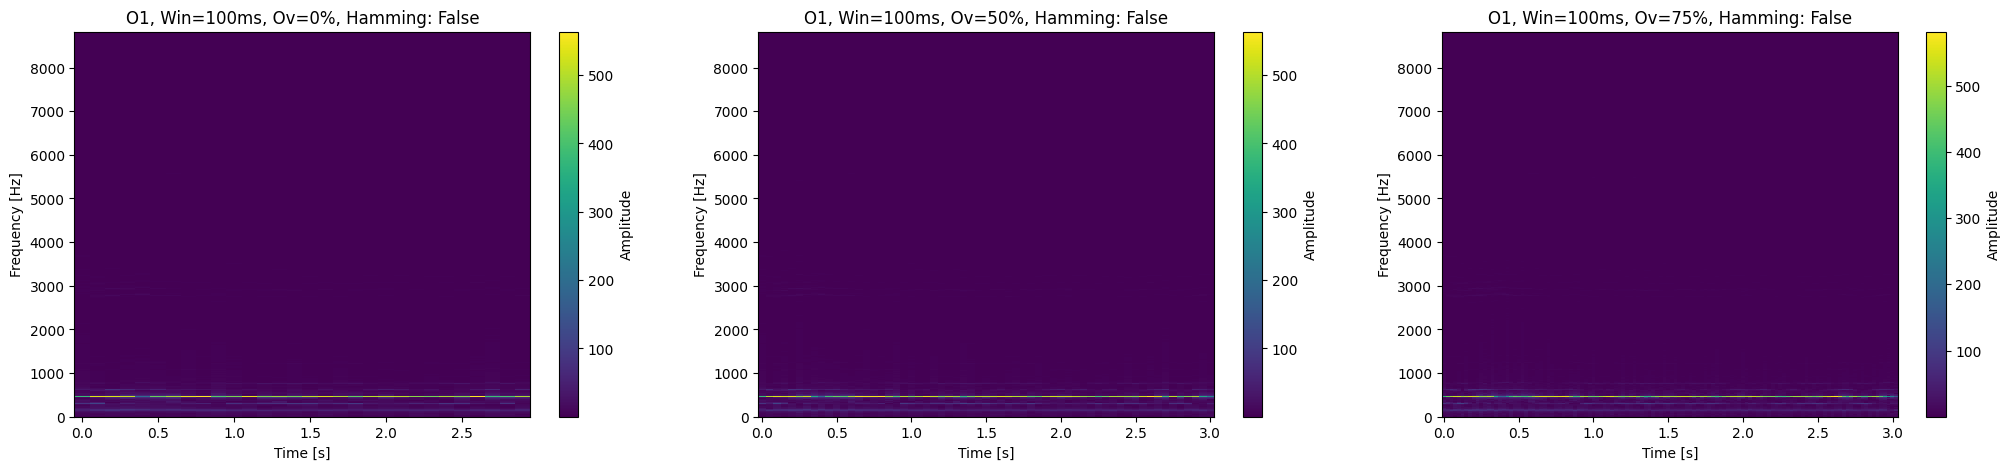

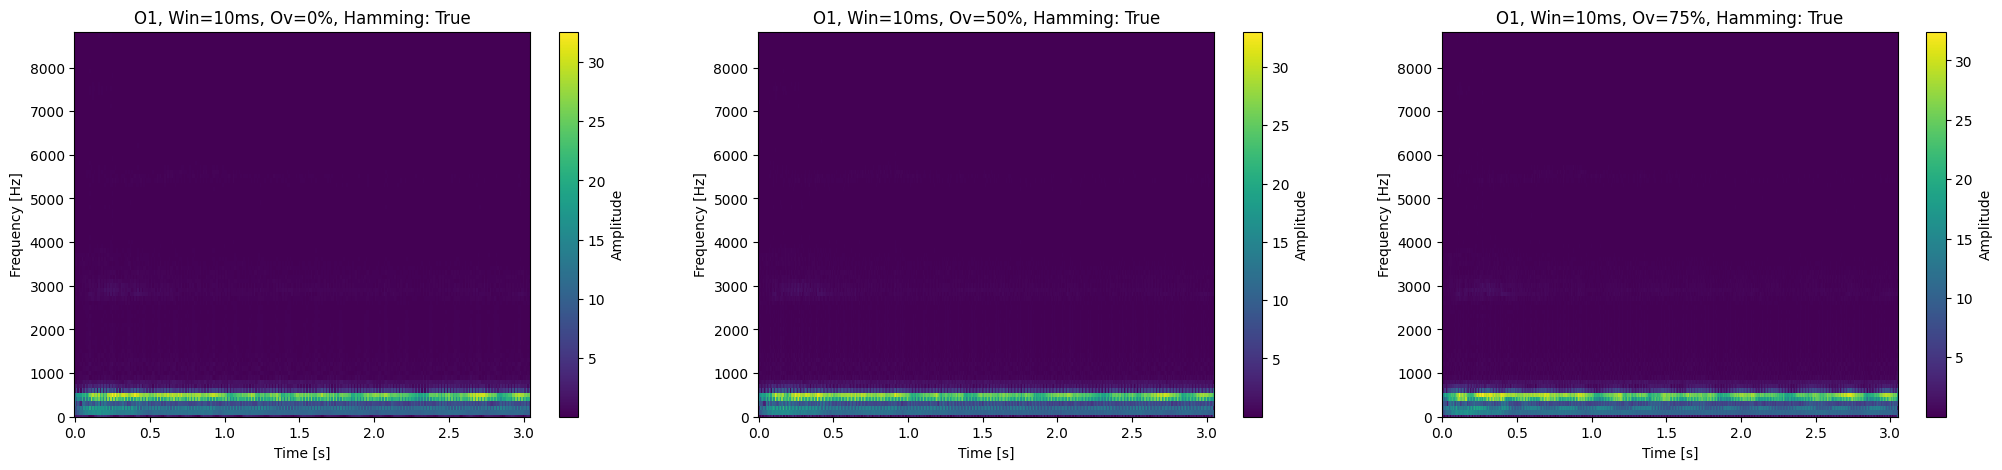

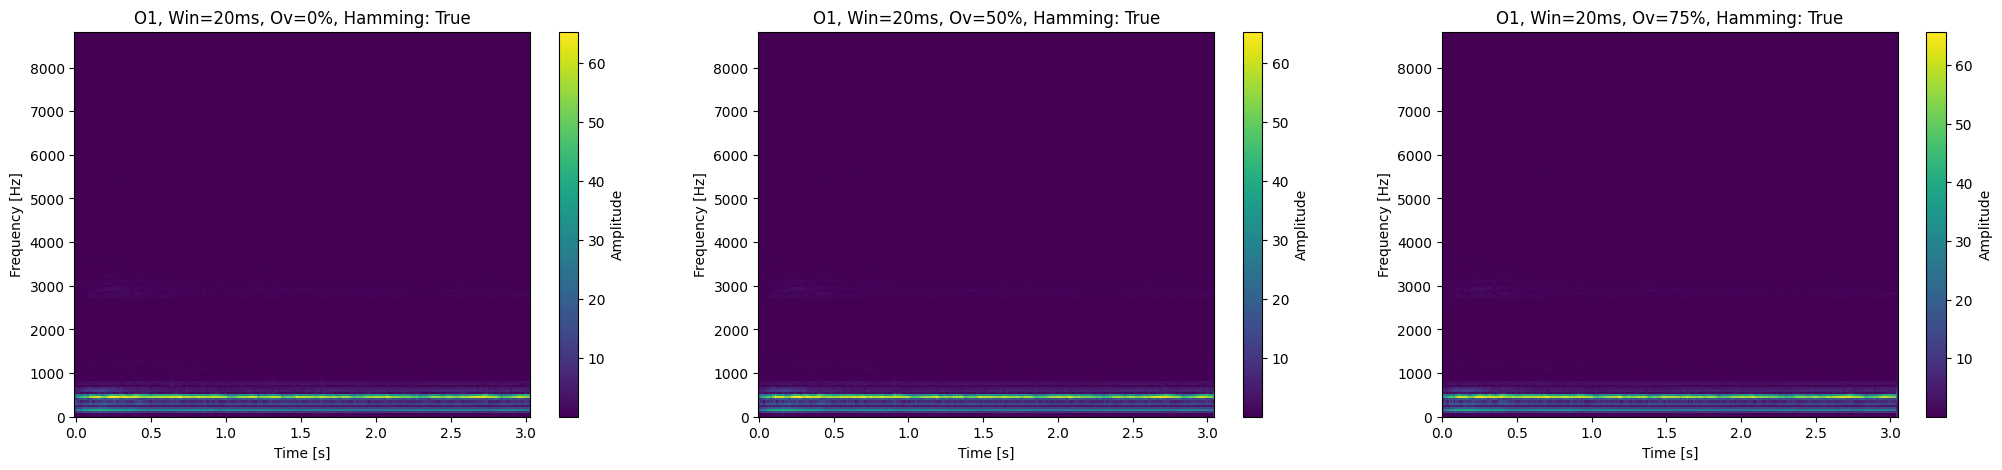

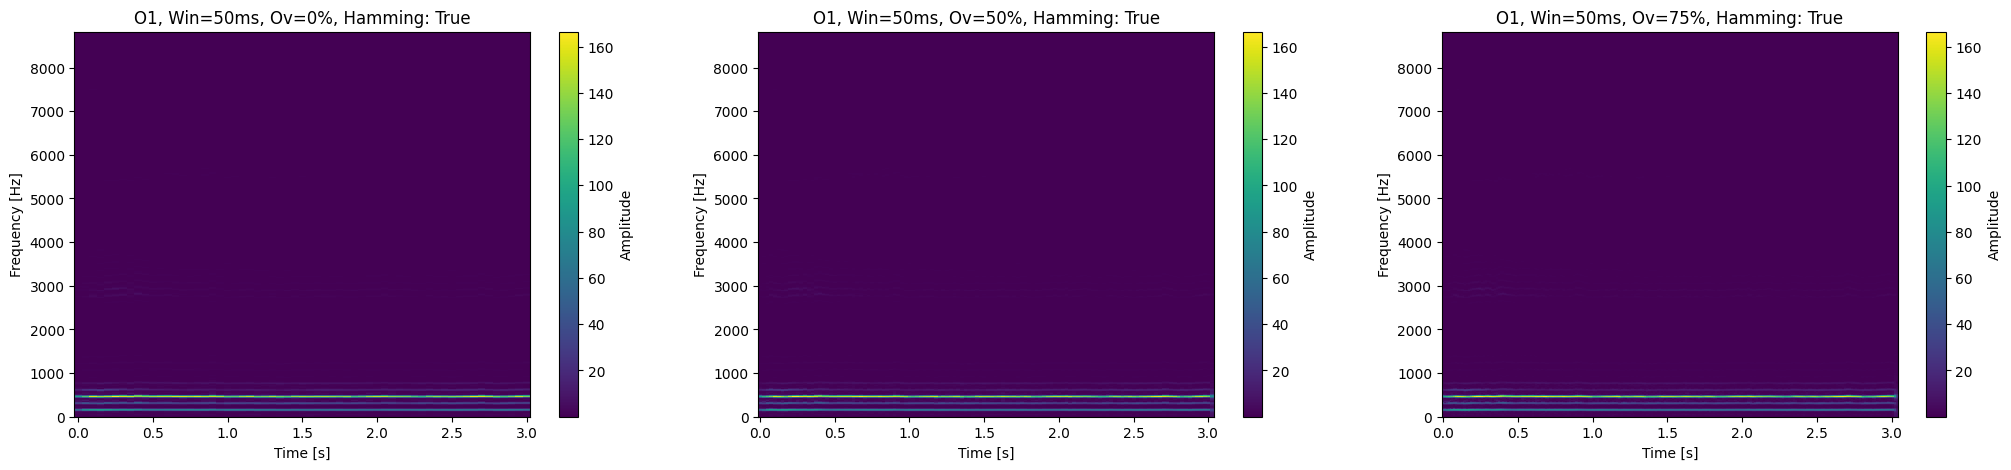

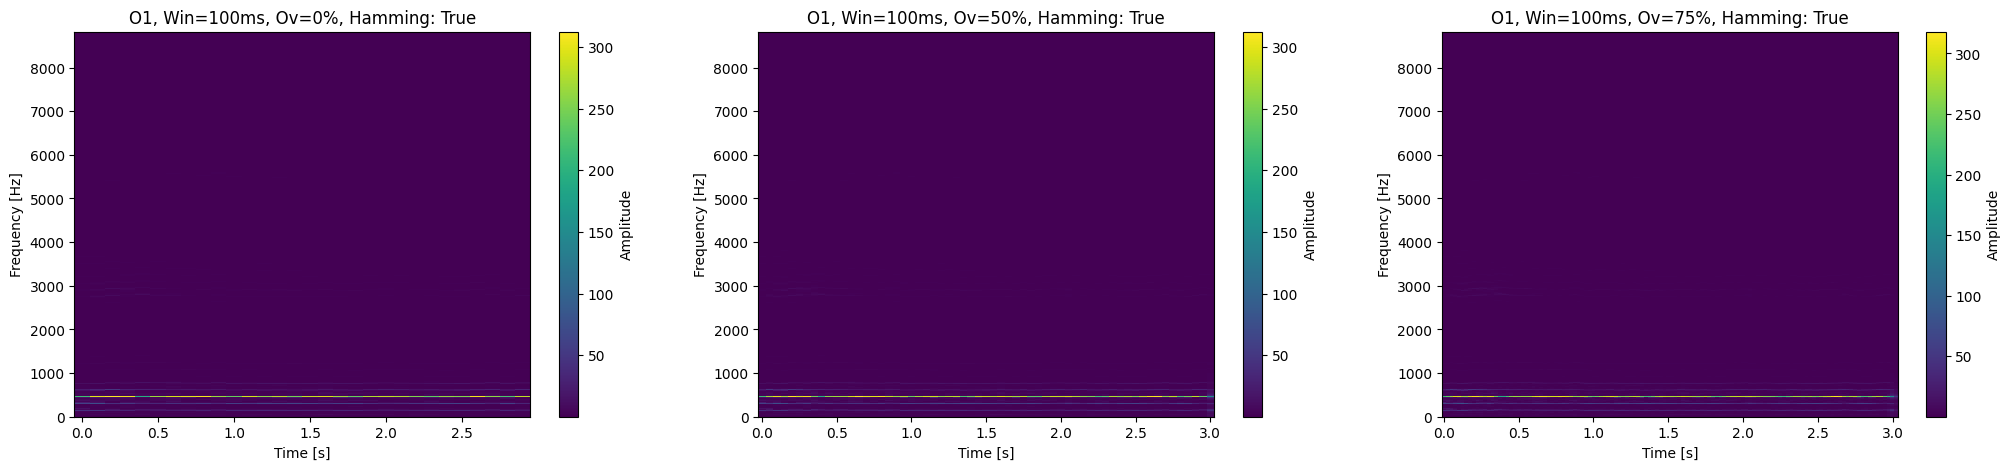

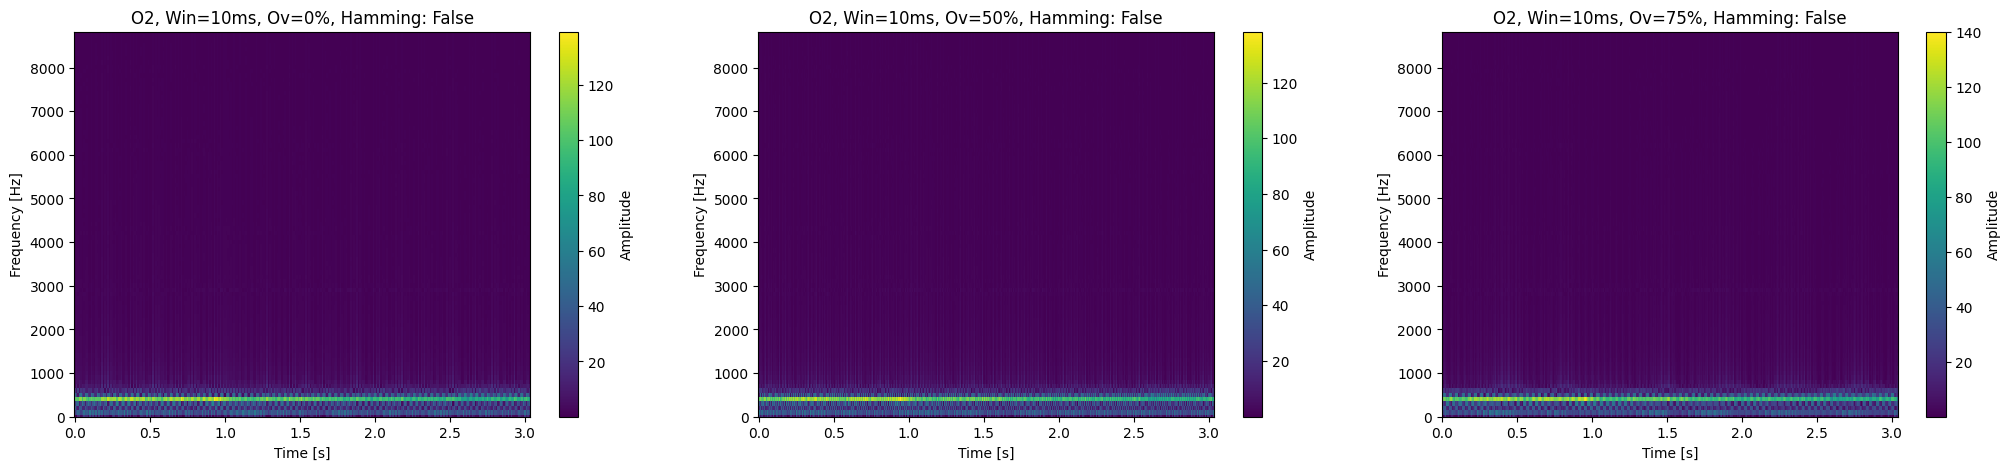

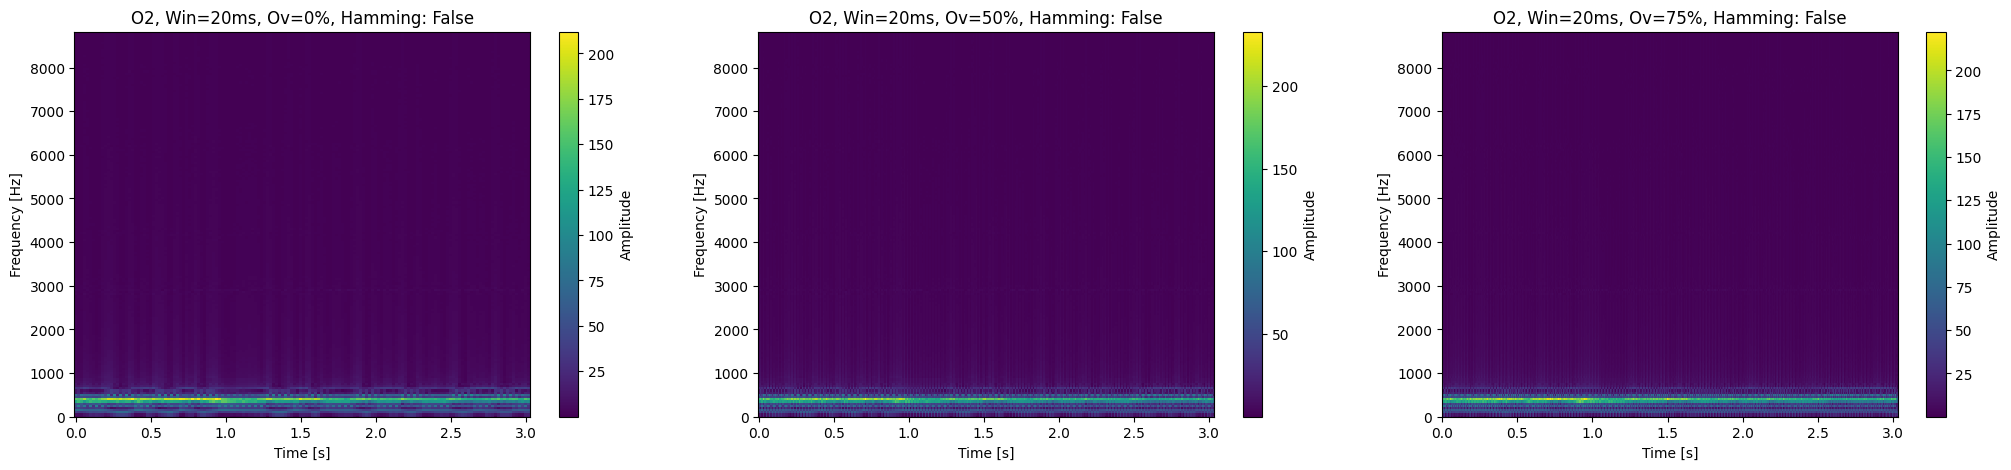

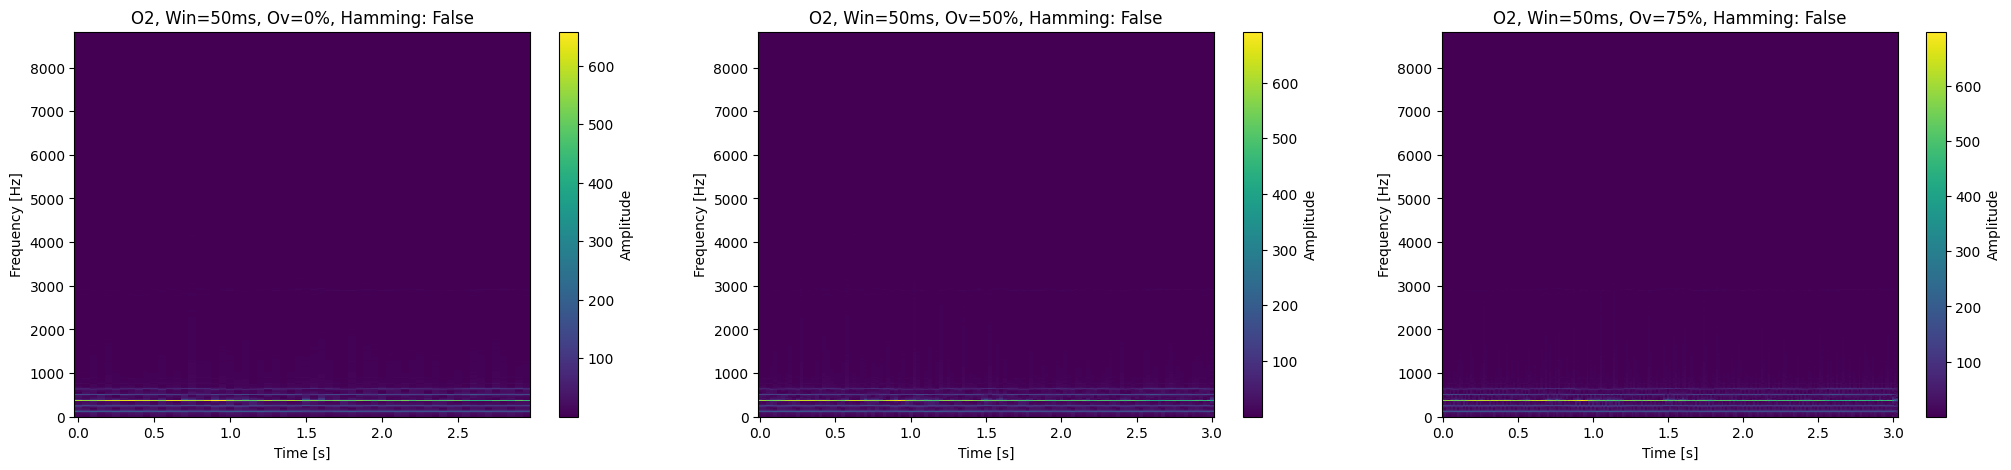

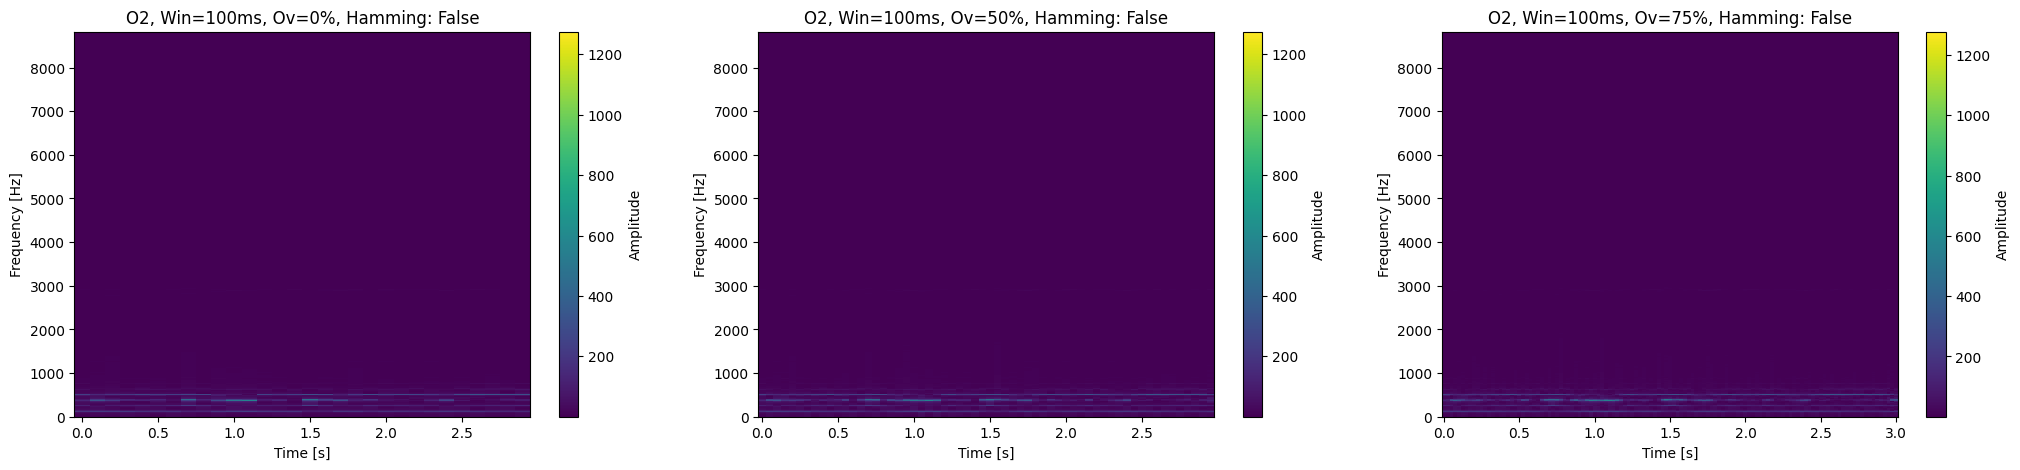

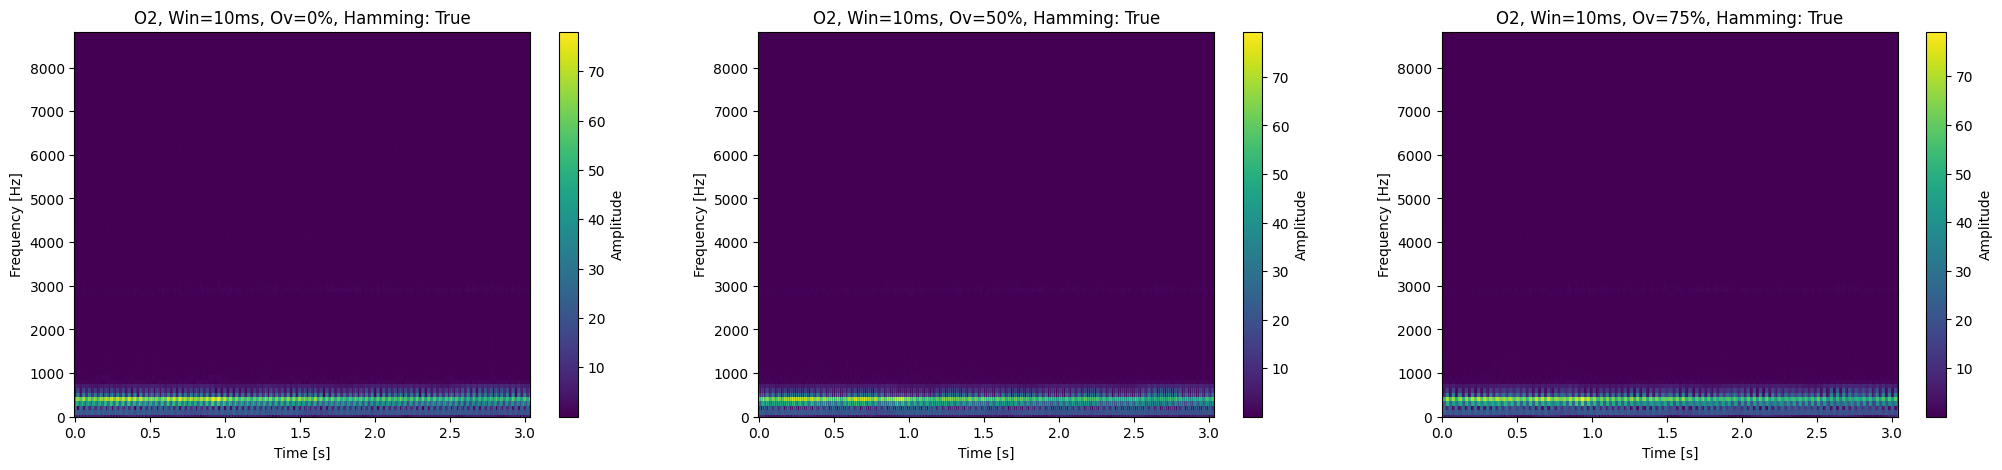

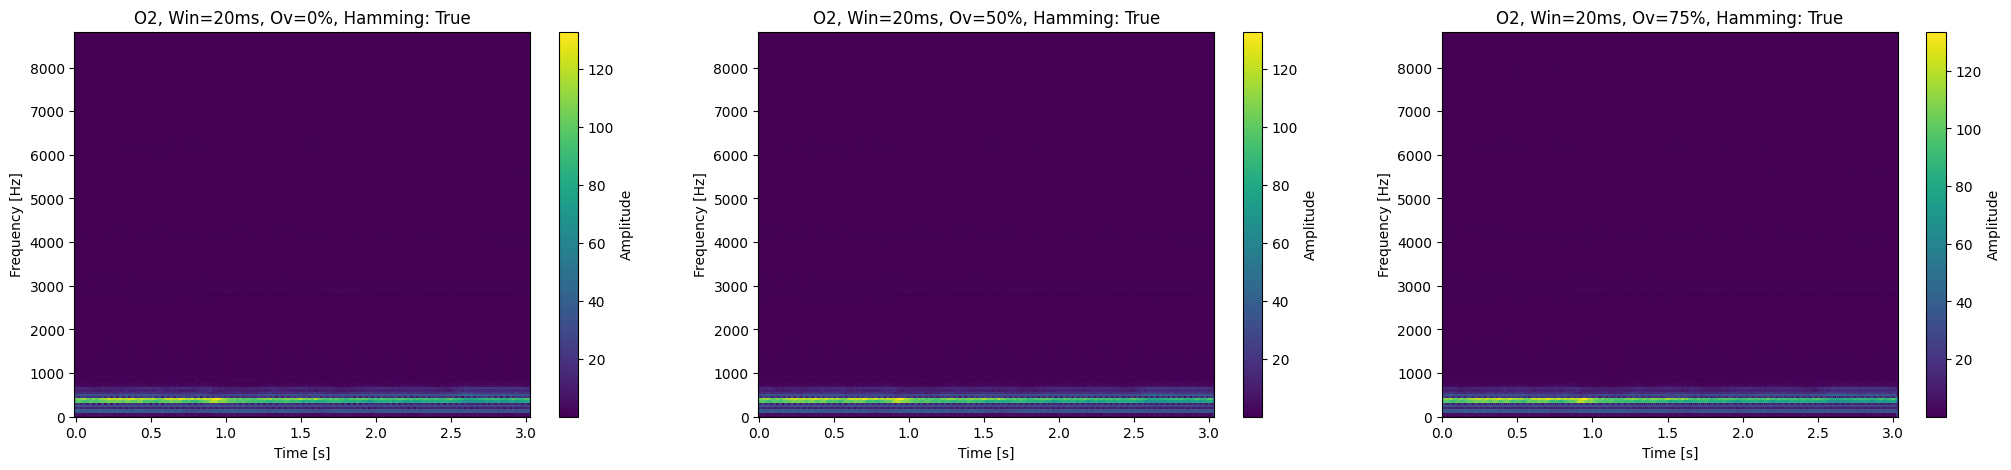

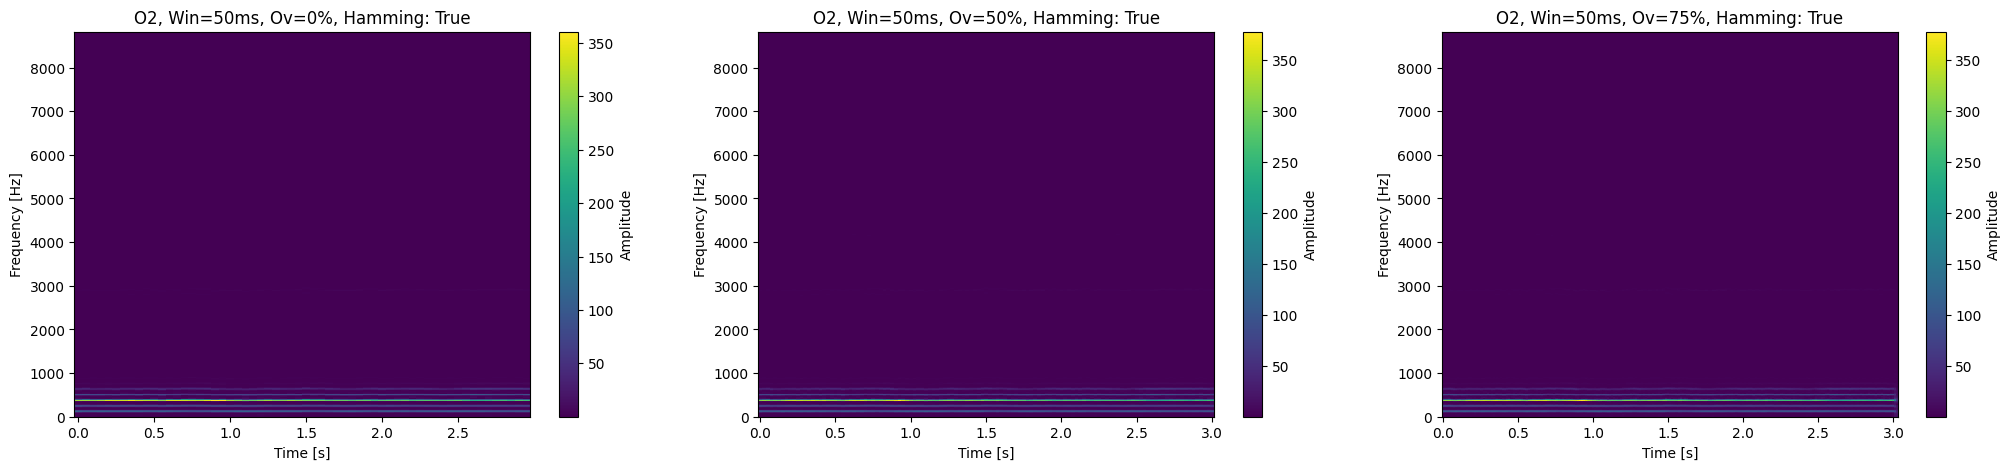

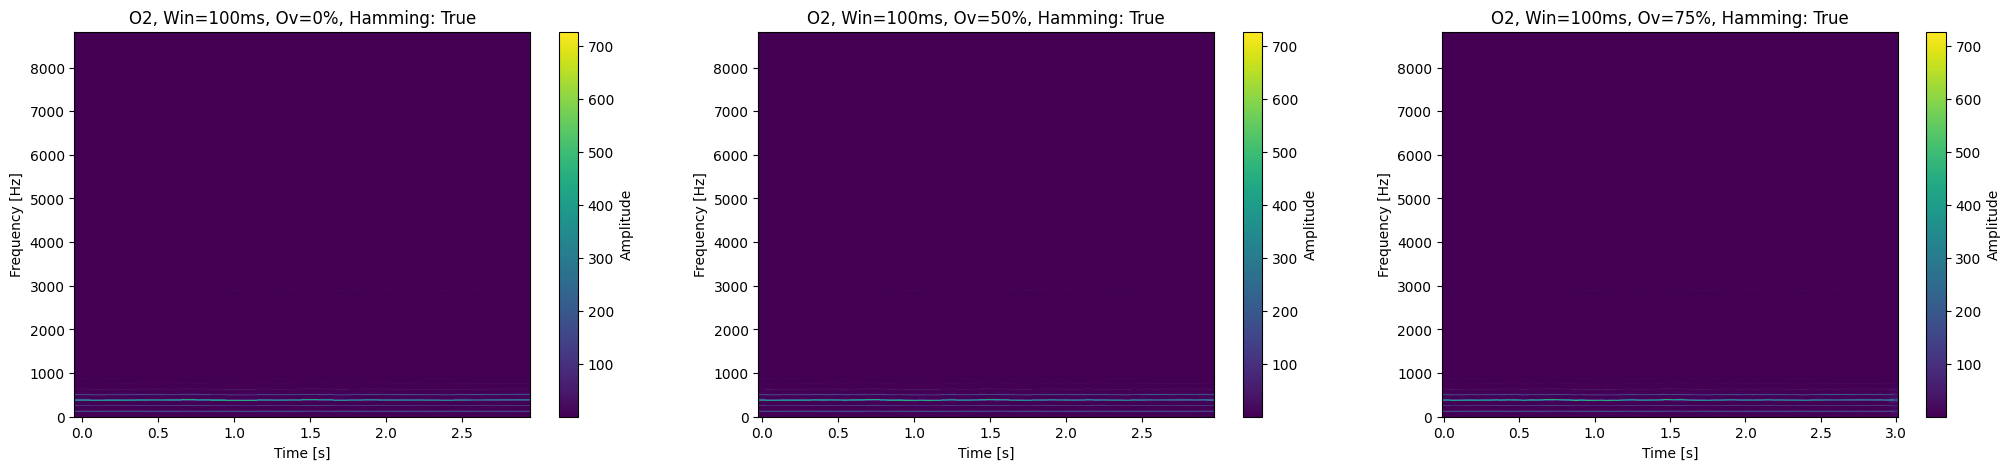

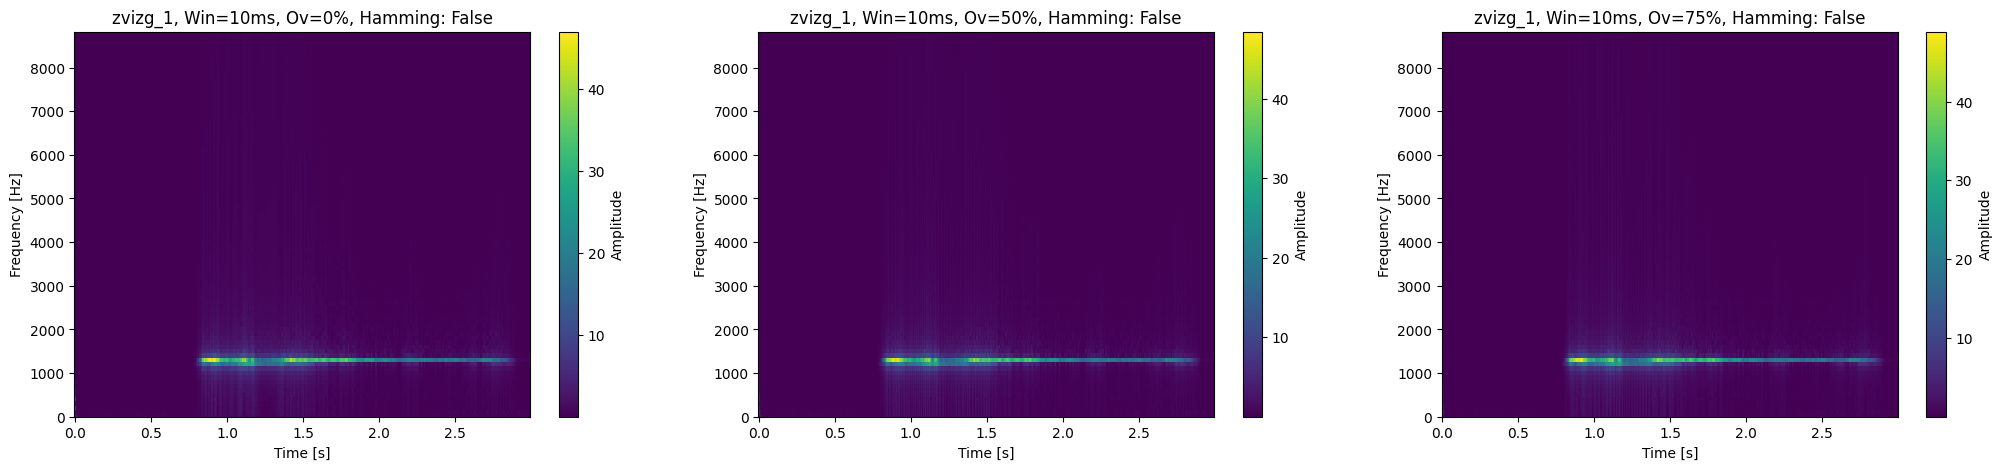

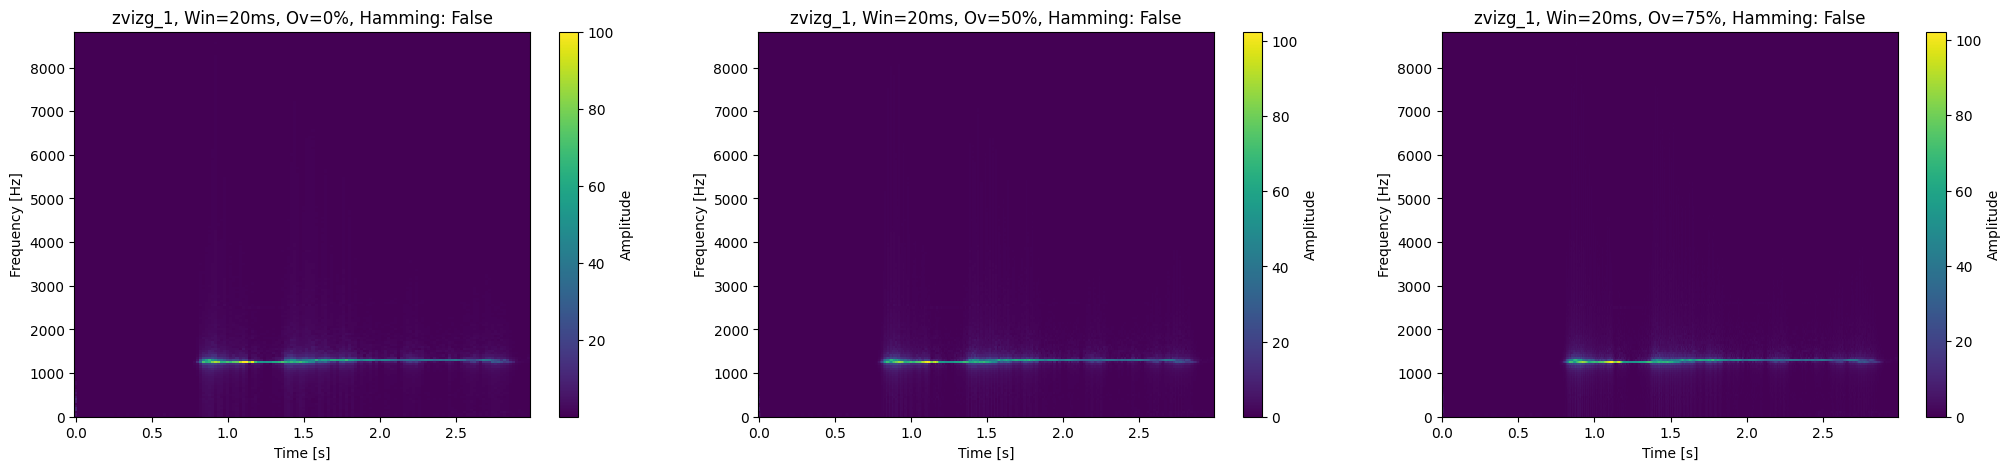

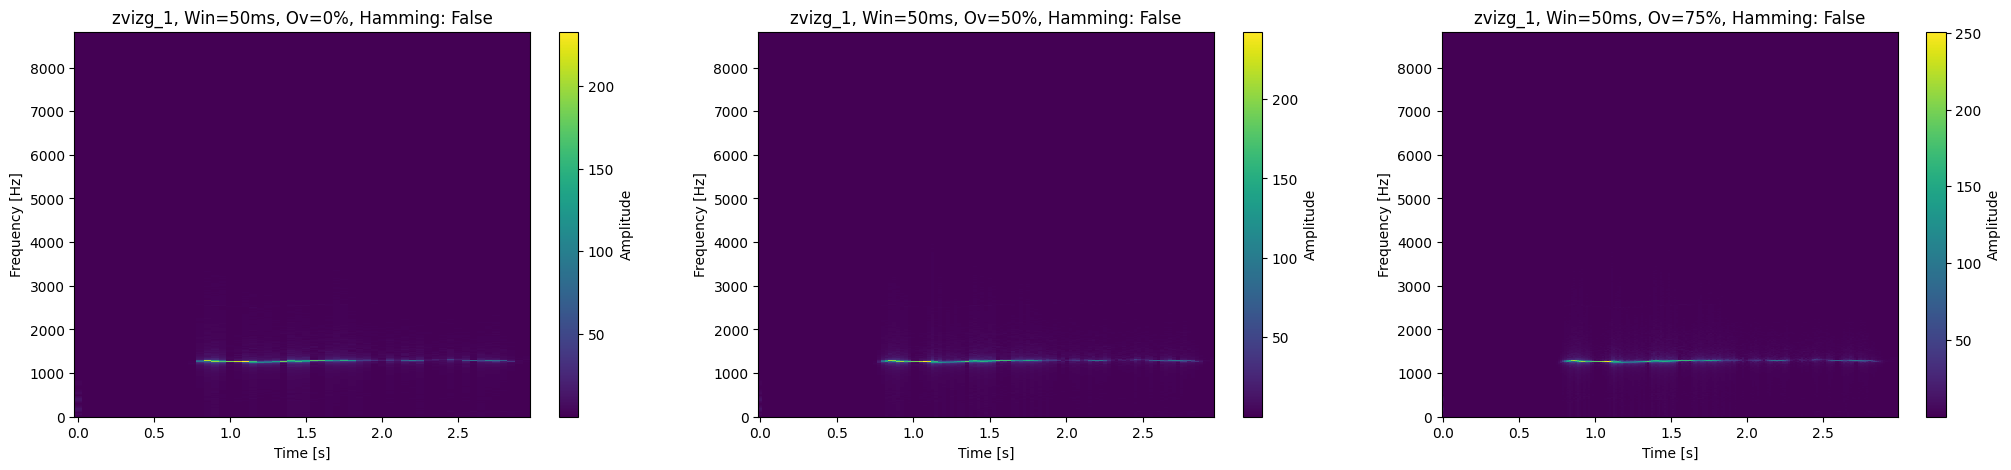

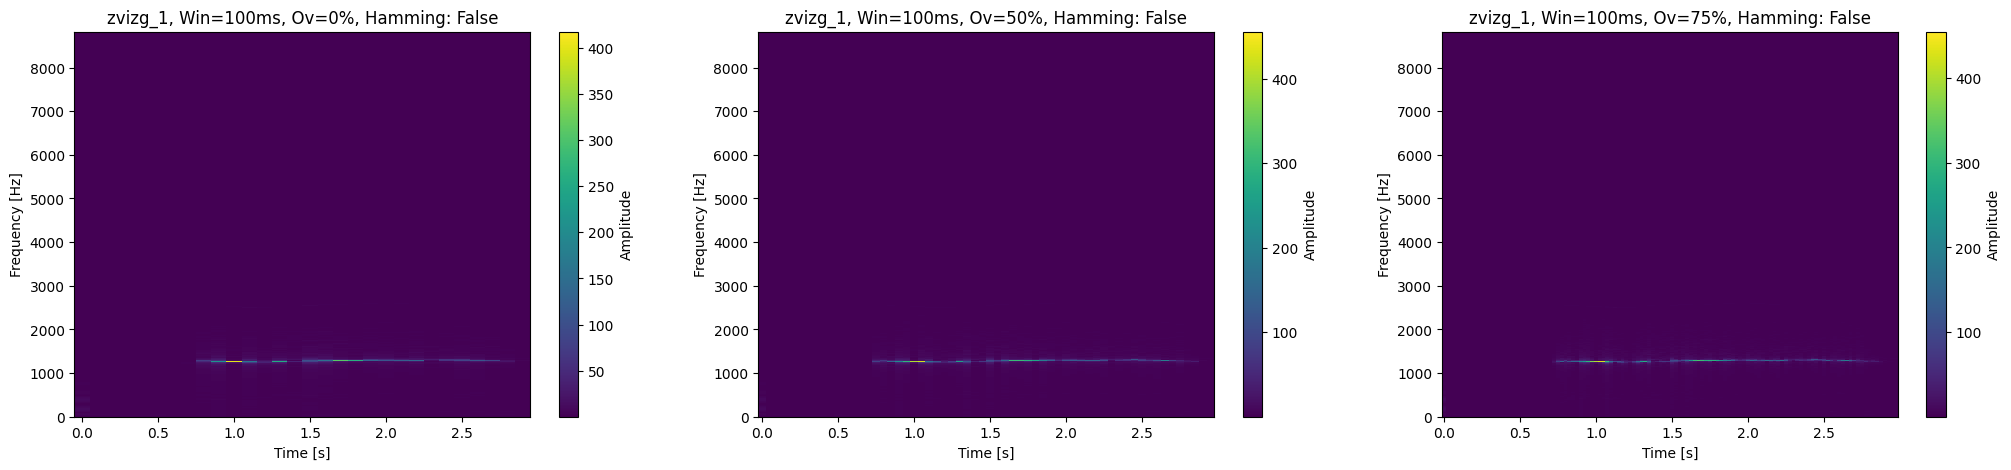

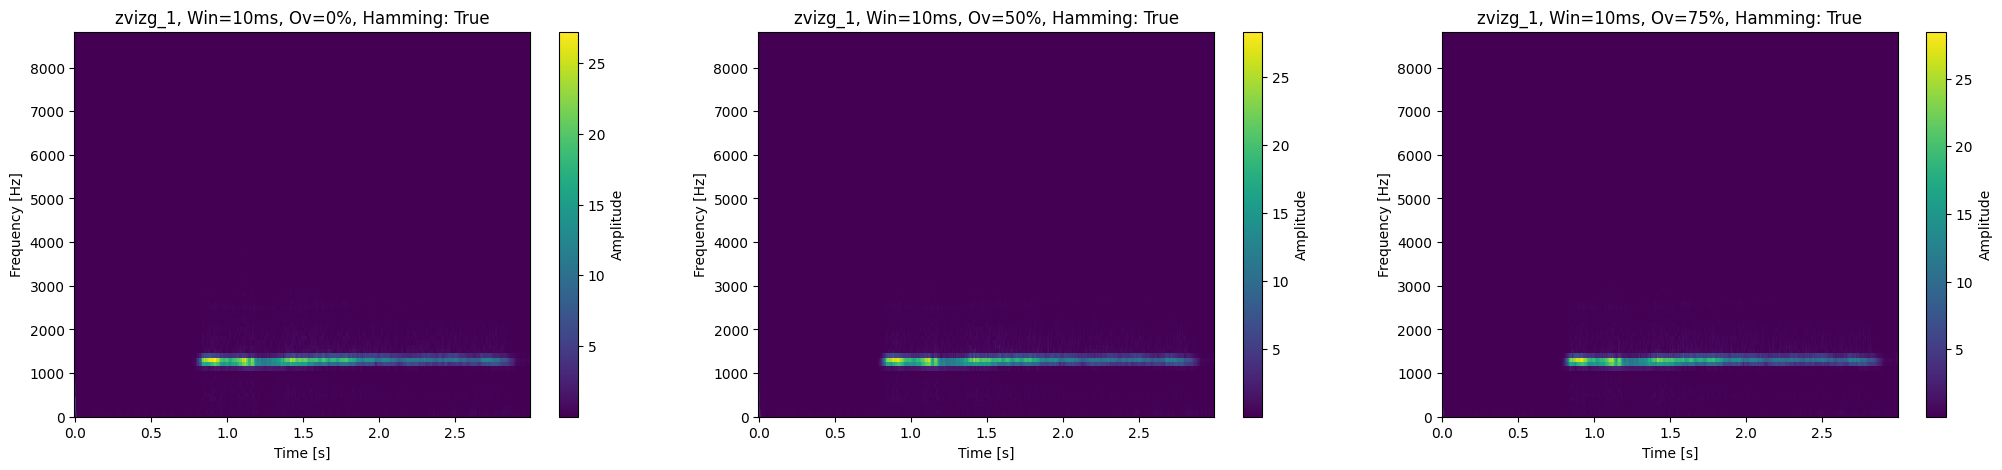

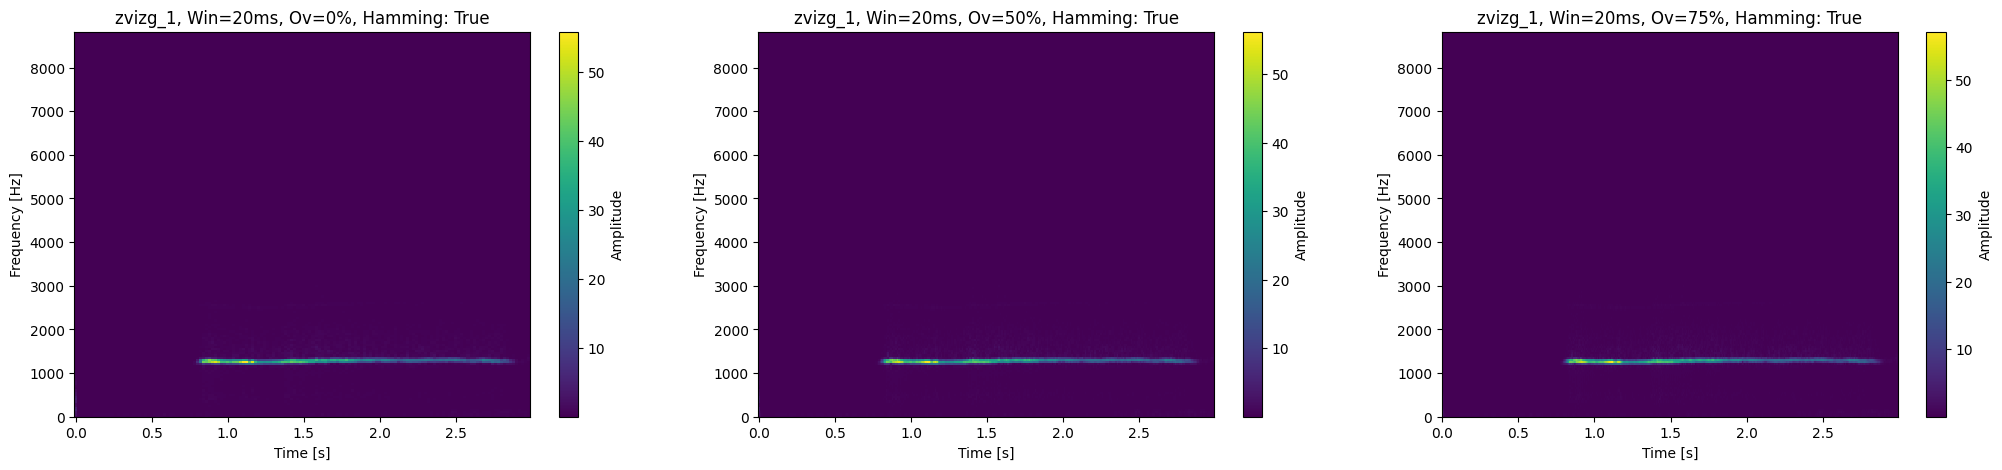

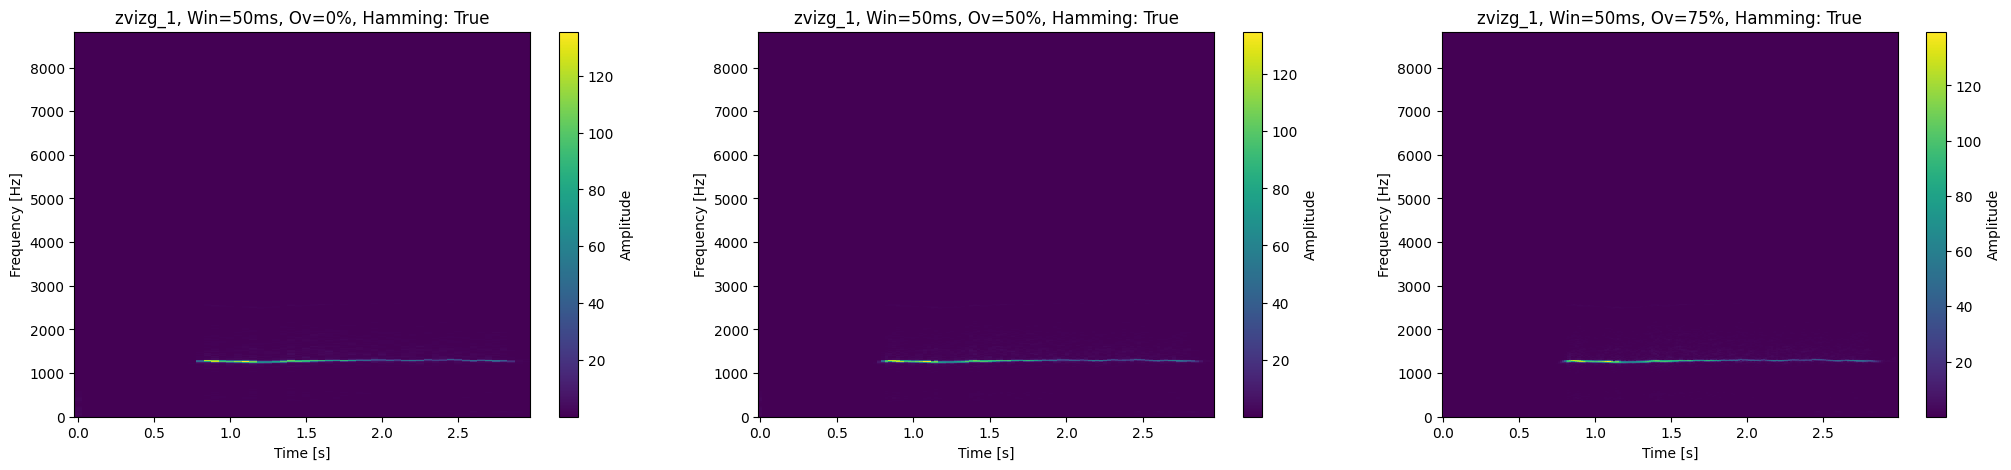

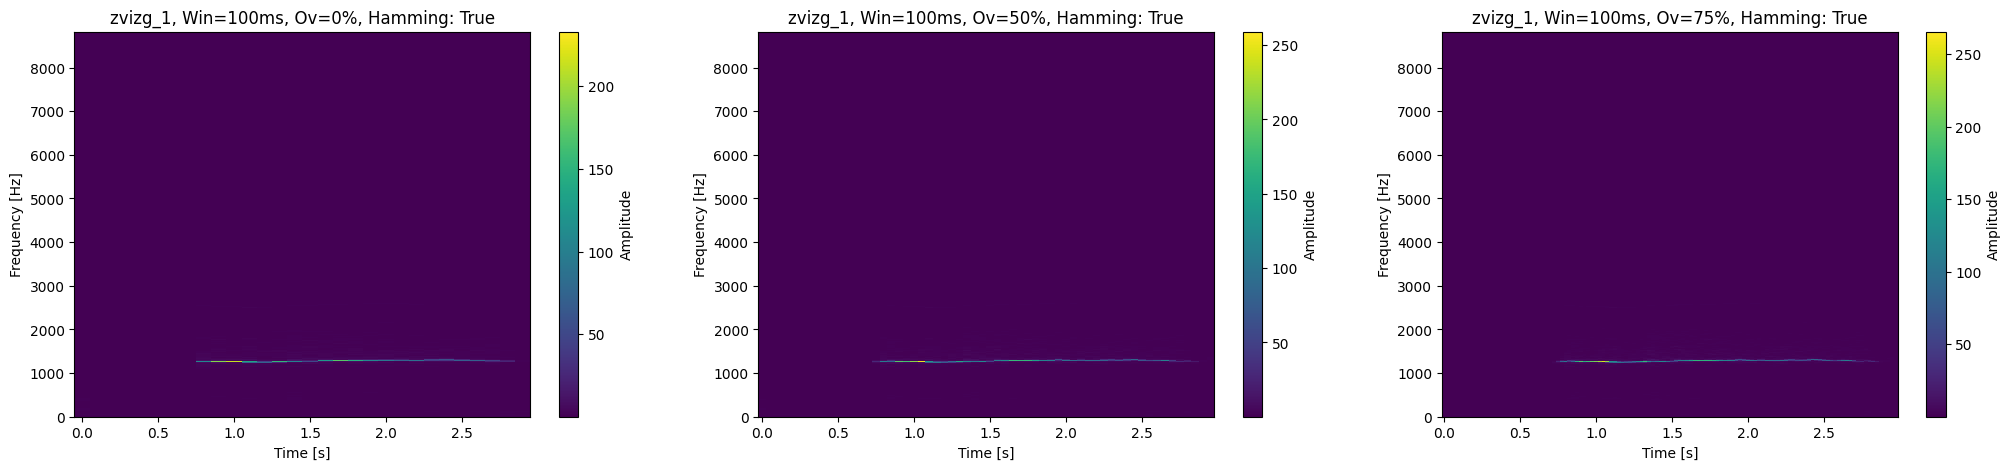

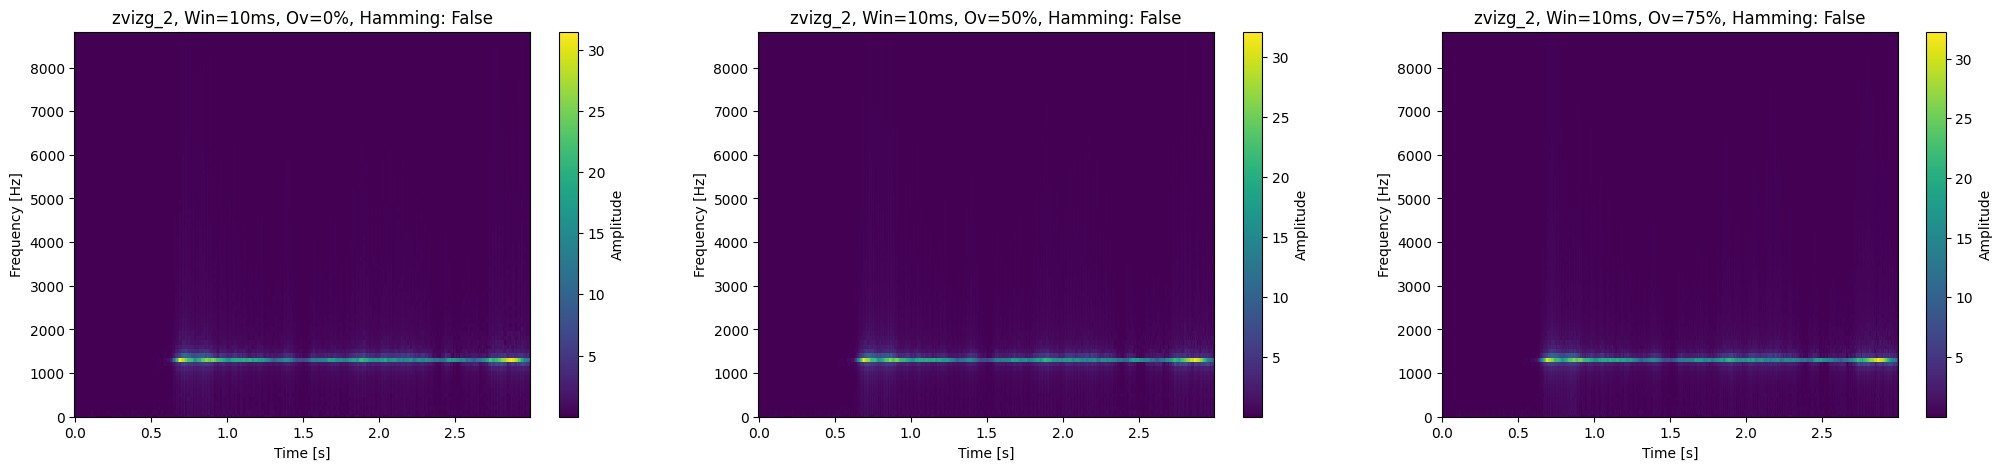

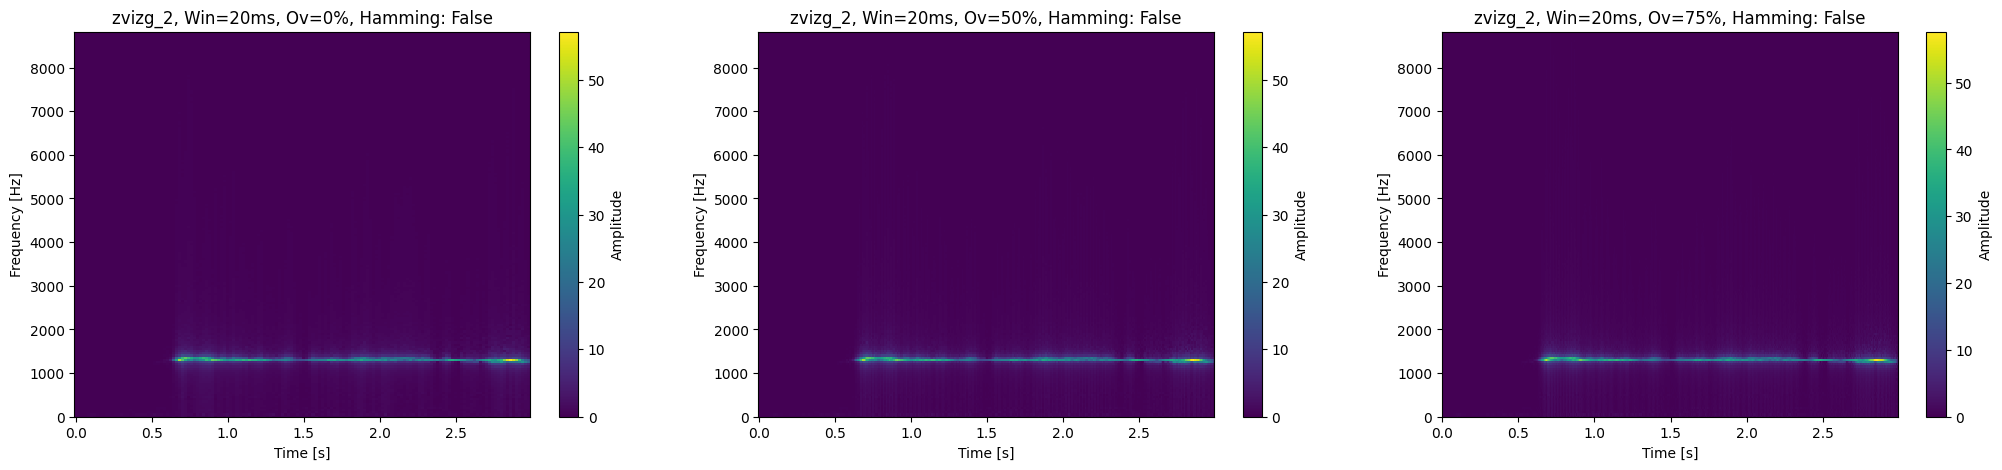

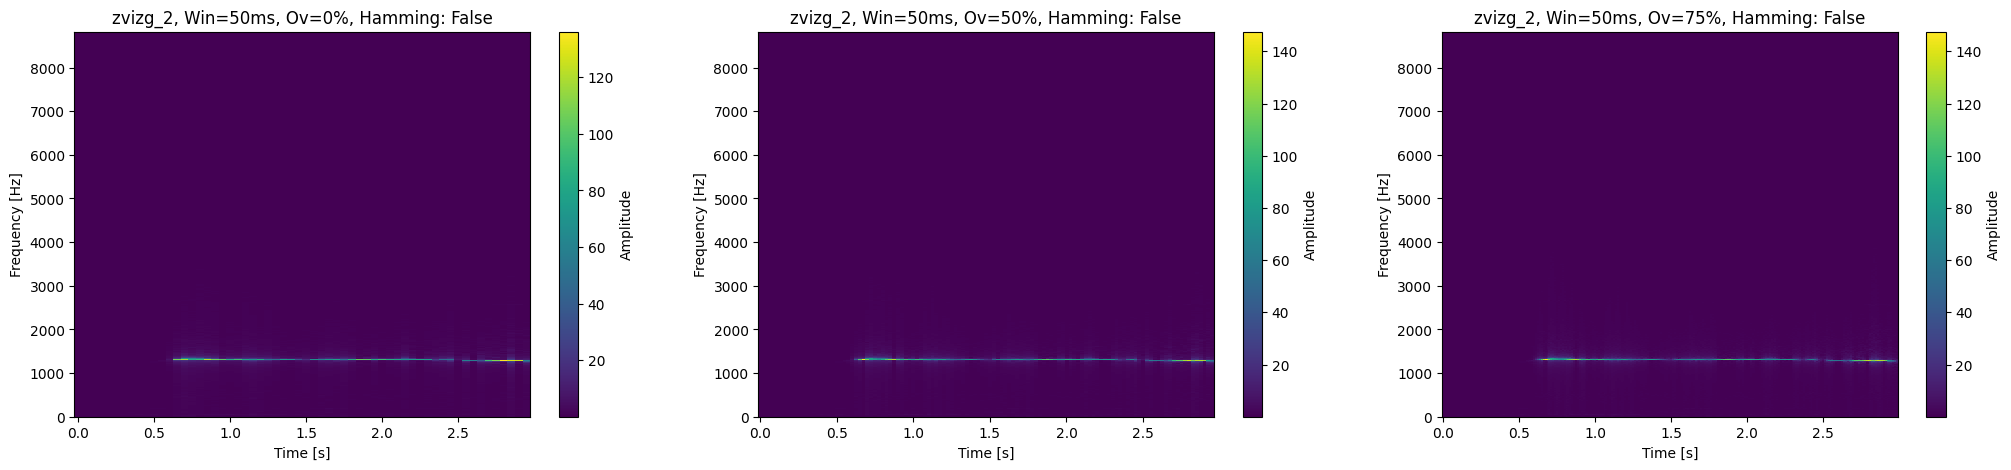

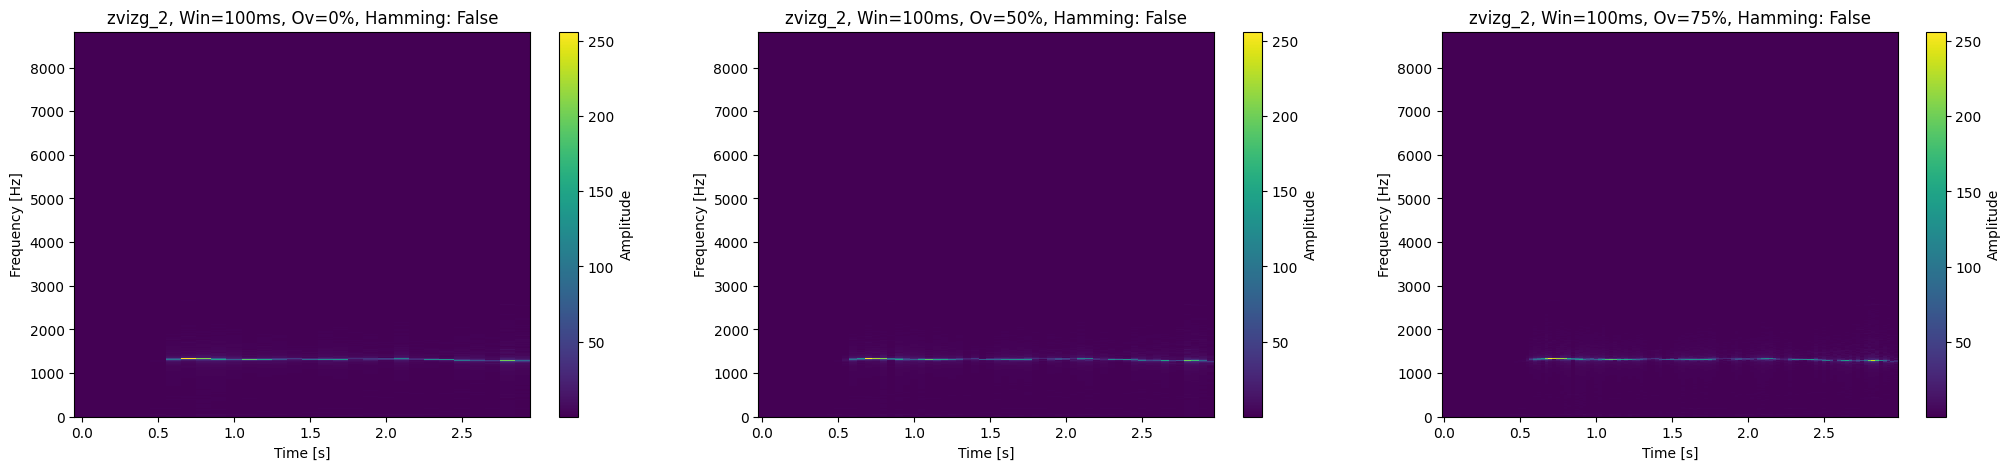

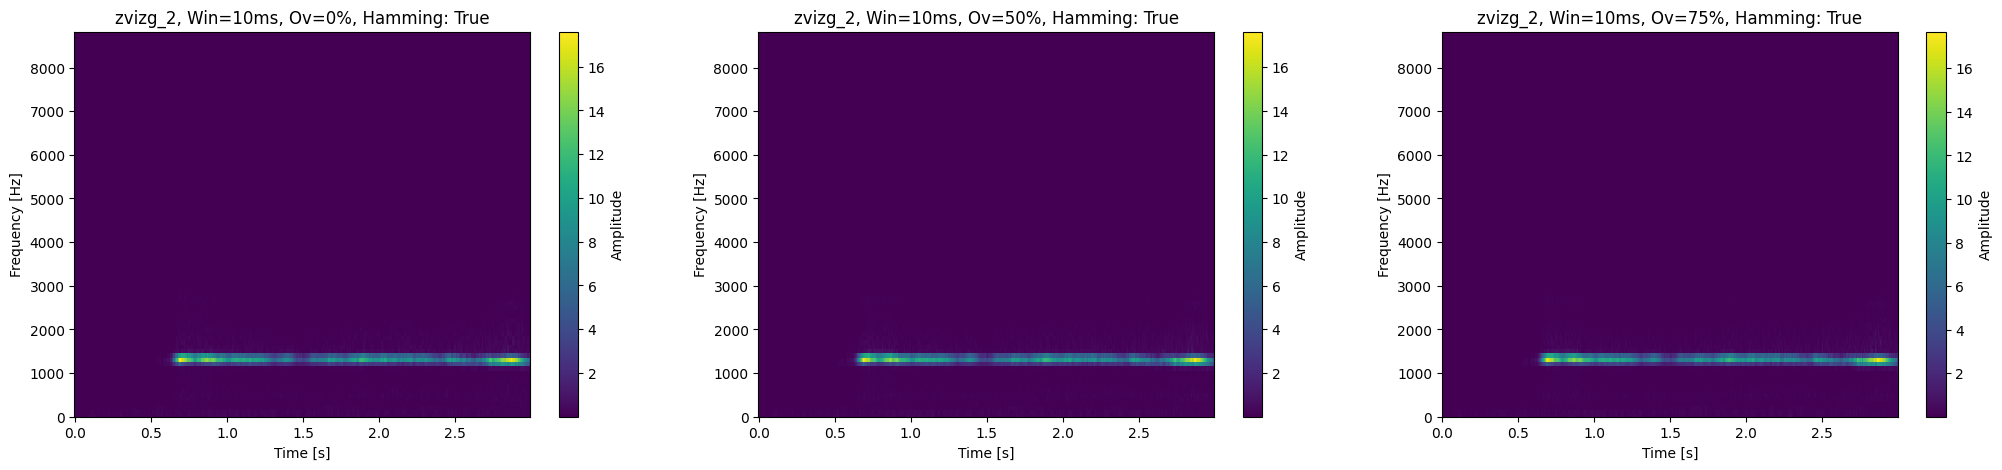

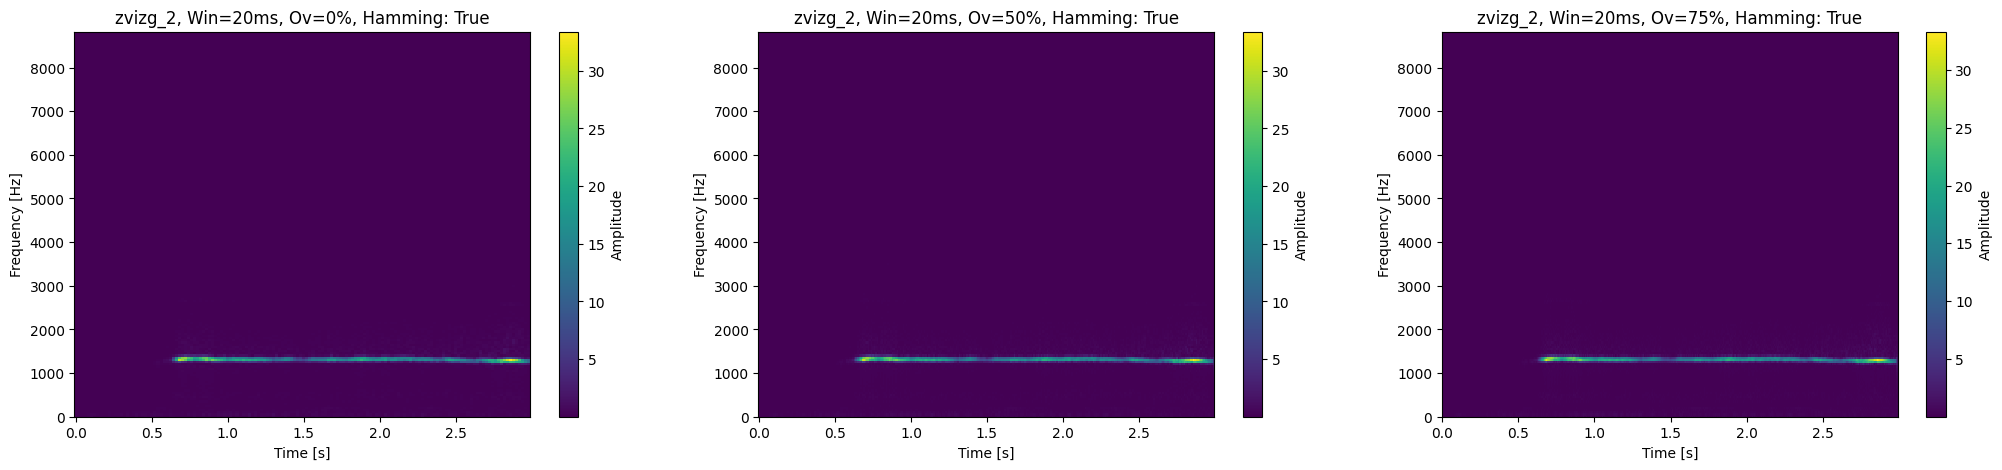

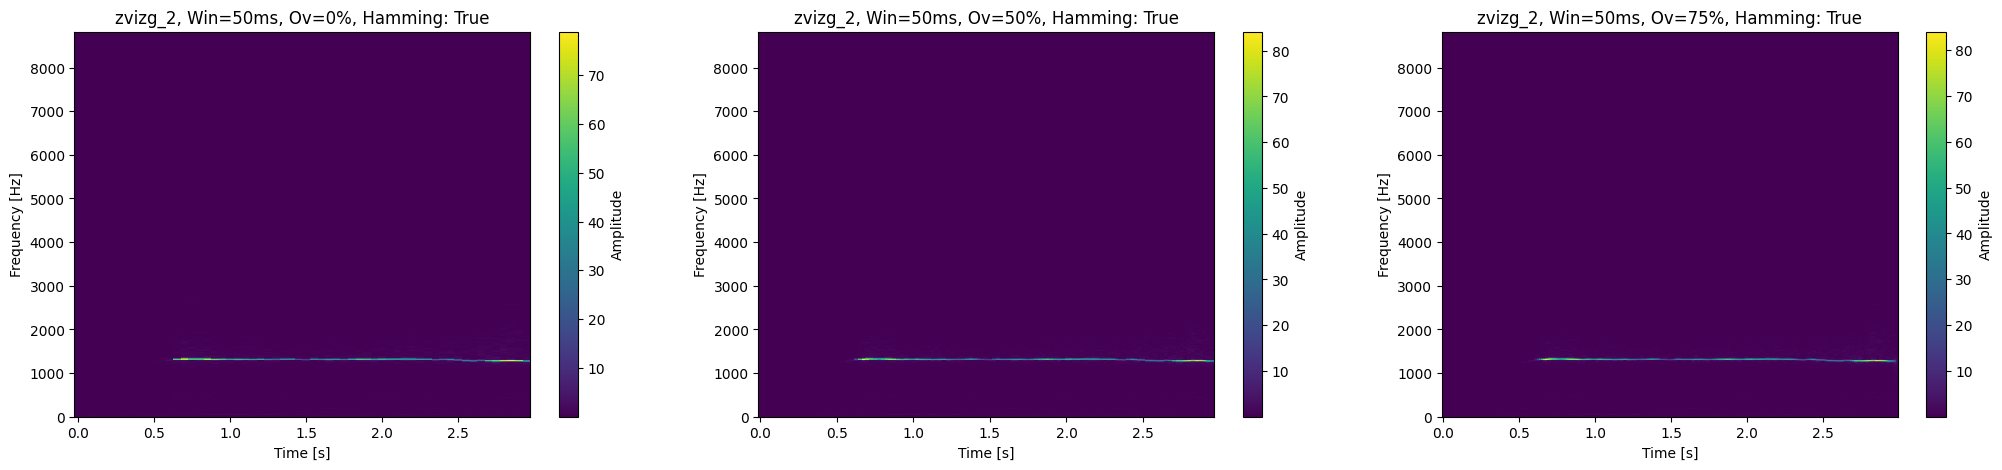

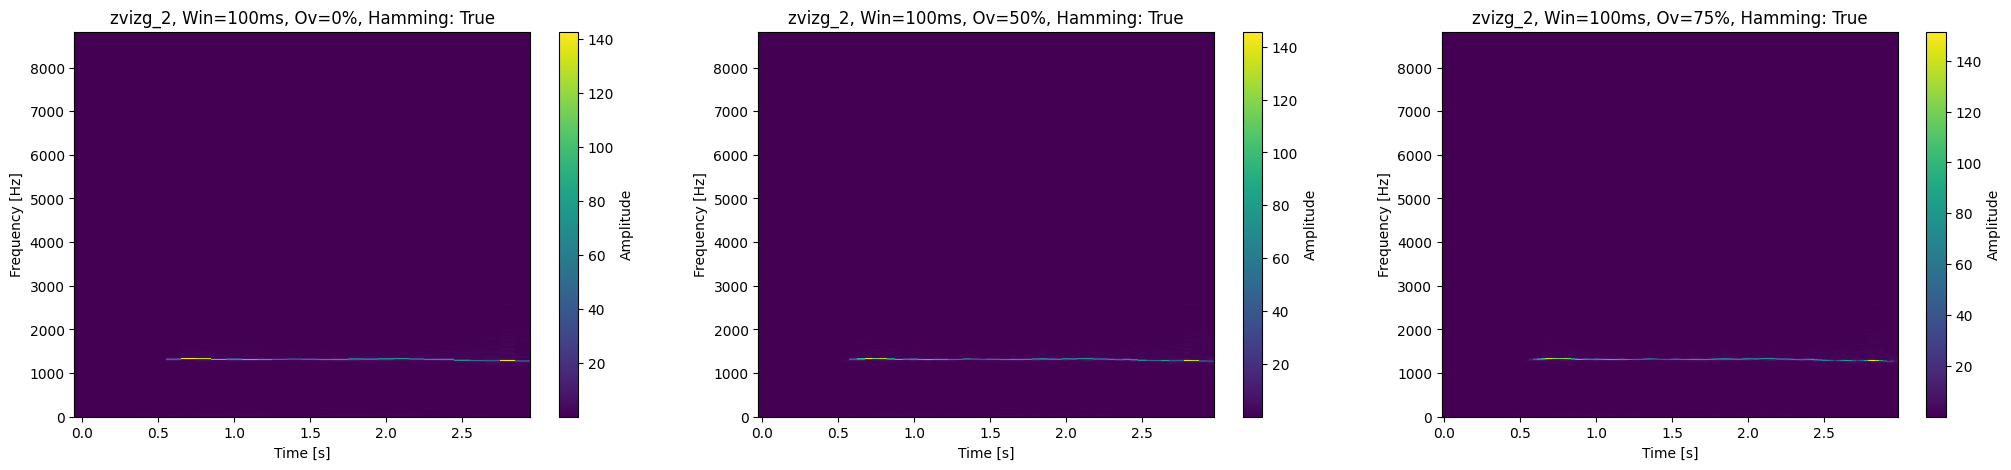

In [14]:
for i, file_name in enumerate(files):
    signal, fs = sf.read(f'data/{file_name}.wav')
    N = len(signal)
    T = N/fs
    t = np.arange(0, T, 1/fs)

for file_name in files:
    signal, fs = sf.read(f'data/{file_name}.wav')

    for use_hamming in [False, True]:
        for window_size_ms in window_size_ms_list:
            plot_idx = 0
            num_plots = len(overlap_percentage_list)
            fig, axes = plt.subplots(1, num_plots, figsize=(25, 5))  # 1 row, N columns
            for overlap_percentage in overlap_percentage_list:
                fr, ti, sp = sdft(signal, fs, window_size_ms, overlap_percentage, use_hamming)

                ax = axes[plot_idx]
                mesh = ax.pcolormesh(ti, fr, np.abs(sp), shading='auto')
                fig.colorbar(mesh, ax=ax, label='Amplitude')
                ax.set_title(f'{file_name}, Win={window_size_ms}ms, Ov={overlap_percentage}%, Hamming: {use_hamming}')
                ax.set_xlabel('Time [s]')
                ax.set_ylim(0, fs // 5)
                ax.set_ylabel('Frequency [Hz]')

                plot_idx += 1
        plt.show()

## Odvisnost neracionalnosti od hitrosti izgovarjave
### Hitri govor
Krajša okna (10-20ms) bolje zajamejo hitre spremembe, zadostuje že manjše prekrivanje (0-50%)

### Počasen govor
Daljša okna (50-100ms) bolje razrešijo frekvenče komponente, večje prekrivanje da lepša prekrivanja (75%)

## Vpliv dolžine oken na zaznavo harmoniko
Dolžina okna	Prednosti	Slabosti	Primer uporabe
10 ms	Odlična časovna ločljivost	Slaba frekvenčna ločljivost	Razločevanje eksplozivov (/p/, /t/)
20 ms	Kompromis	Kompromis	Večina soglasnikov
50 ms	Dobra frekvenčna ločljivost	Zamegljeni hitri prehodi	Samoglasniki, zveneči soglasniki
100 ms	Odlična frekvenčna ločljivost	Zelo slaba časovna ločljivost	Analiza tonov in intonacije

## Razlikovanje slovenskih samoglasnikov
Kl